___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
#Importing Necessary Packages
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
from sklearn.metrics import roc_auc_score

In [2]:
#Read the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
df=dataset.copy()
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
#Printing the dataset "First 5 rows"
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


it seems like we dont have null values

In [5]:
# Droping unnecessary features and check the DF:
print(f"The  DataFrame BEFORE dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)
print(f"The  DataFrame AFTER dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")

The  DataFrame BEFORE dropping unnecessary features: rows are 10000 and columns are 14
The  DataFrame AFTER dropping unnecessary features: rows are 10000 and columns are 11


as you can see from above:
there are features that not usefull in the predection process so it is better to remove it 

In [6]:
# Check for null values
df.isna().sum().sum()

0

In [7]:
# Check for duplicated rows
df.duplicated().sum()

0

In [8]:
# Describe the dataset statistically 
df.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

In [9]:
# Check which feature is an "String"
cat = df.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

Text(0.5, 1.0, 'Features Distribution')

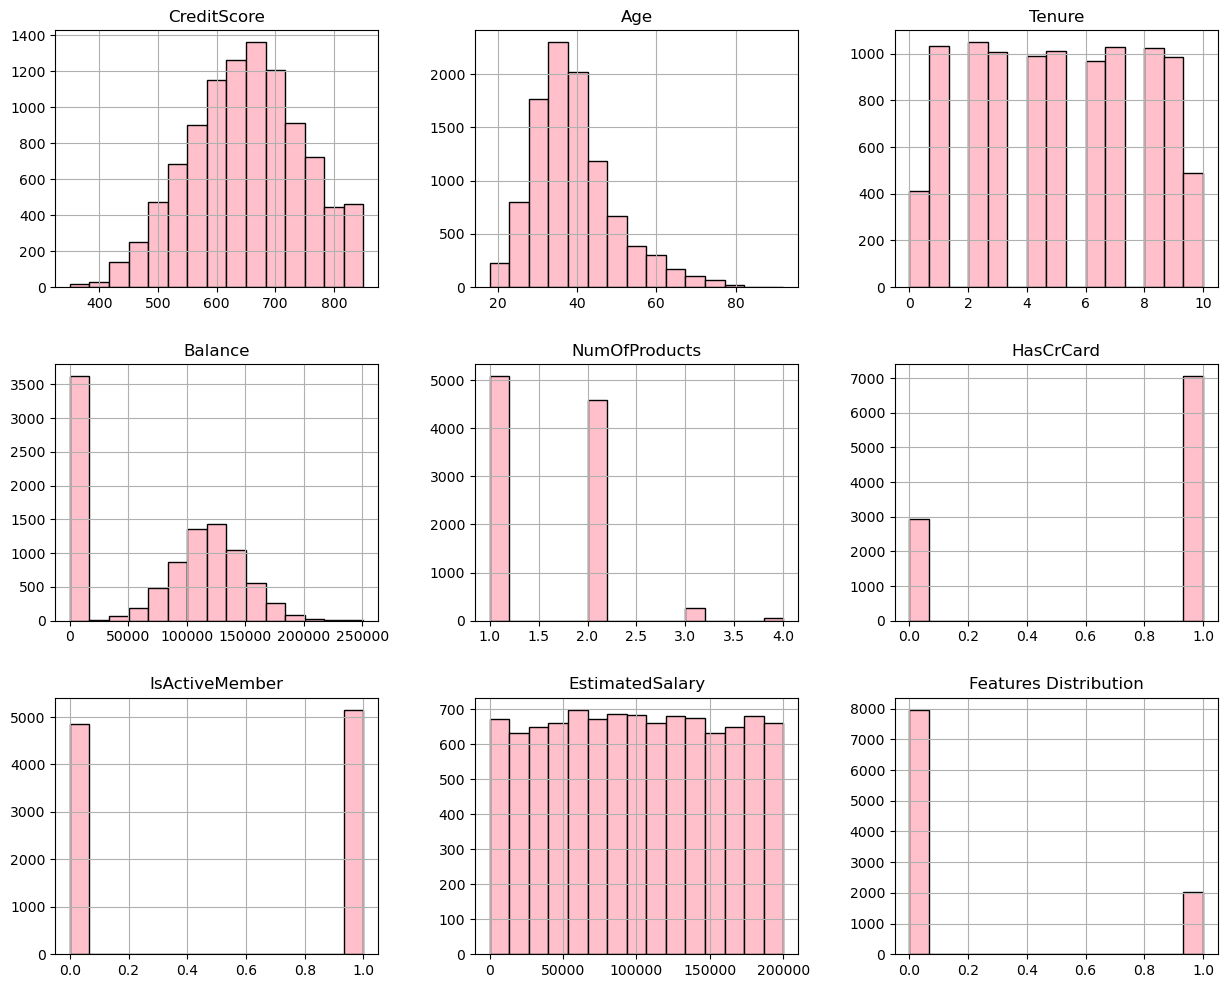

In [10]:
# This code creates a histogram to visualize the distribution of data
df.hist(figsize=(15, 12), bins=15, color='pink', edgecolor='black')
plt.title("Features Distribution")

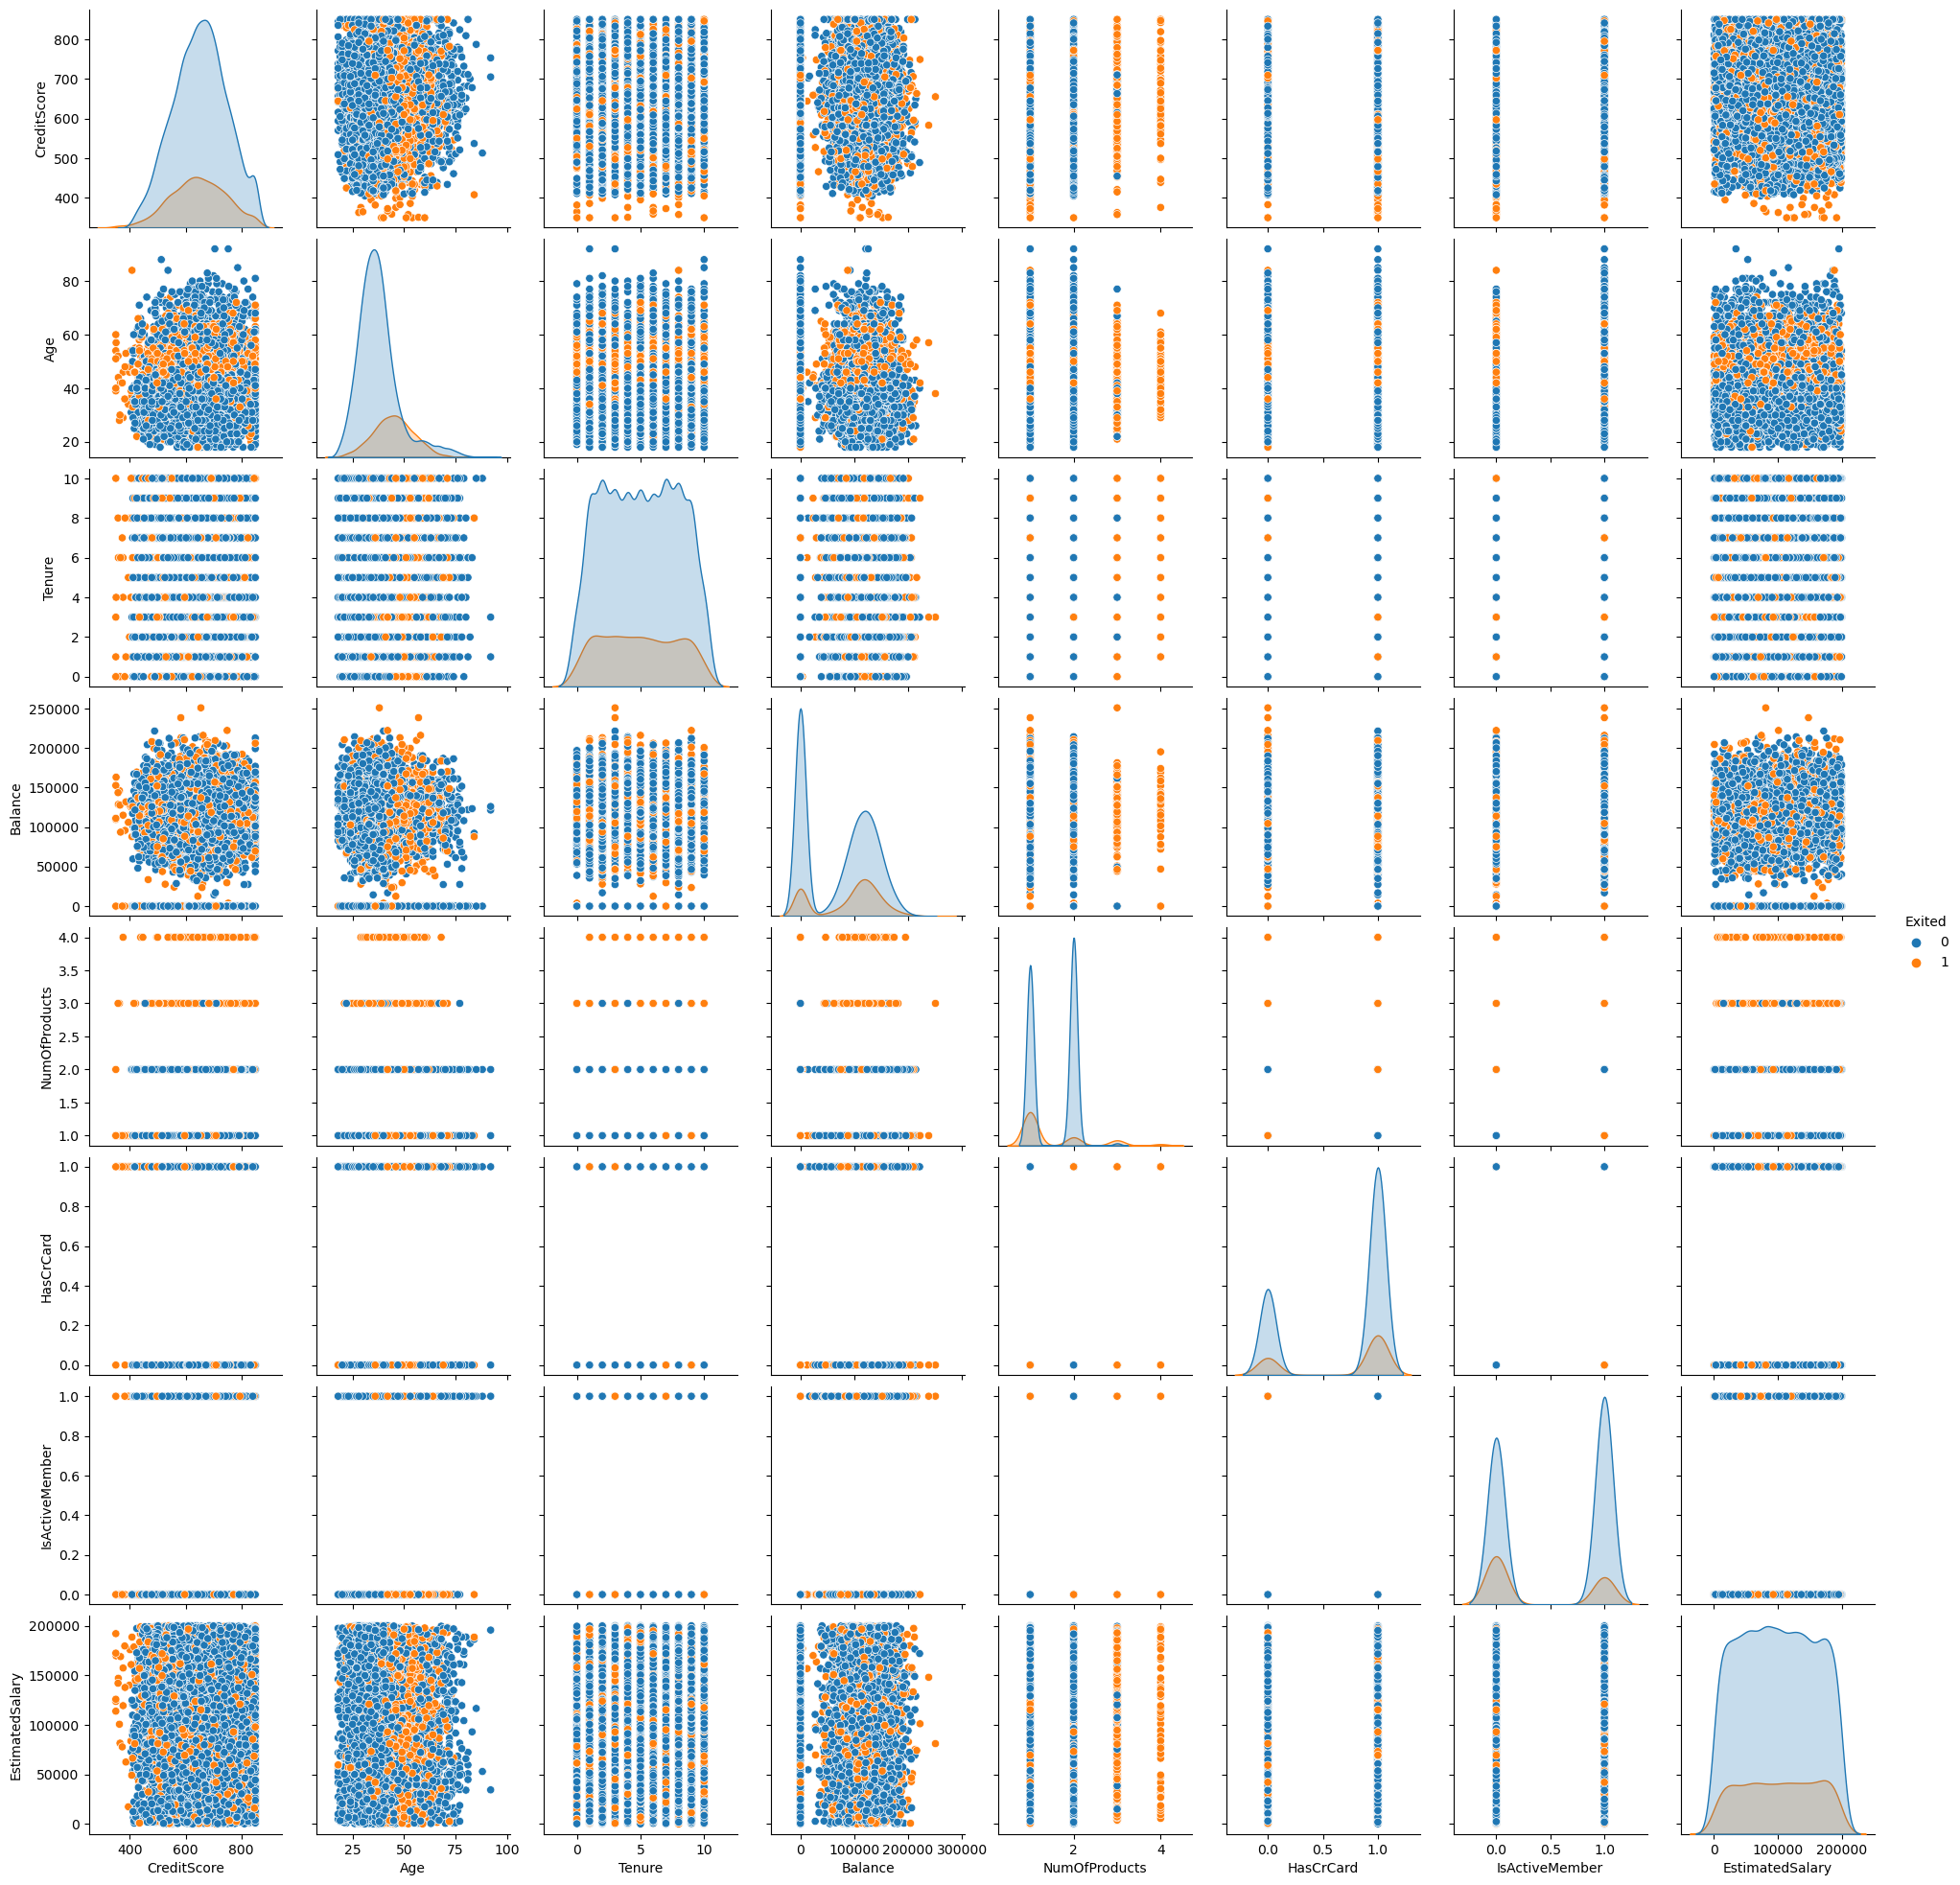

In [11]:
# Create a pairplot to visualize pairwise relationships in the DataFrame.
# The 'hue' parameter is set to 'Exited', which will color the data points based on the 'Exited' column.
sns.pairplot(df, hue = 'Exited')

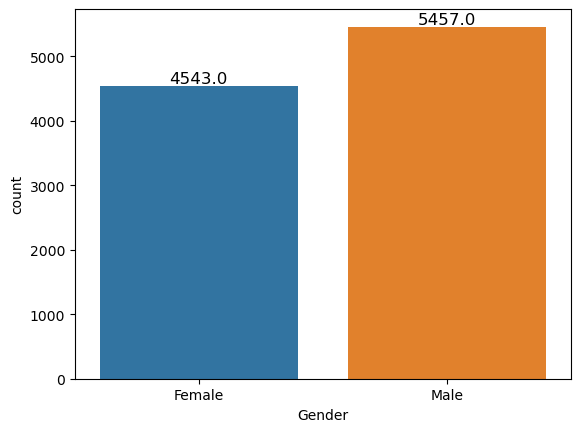

In [12]:
# Ploting Gender as a count plot to see their distribution 
ax = sns.countplot(x=df["Gender"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

In [13]:
# Count target class
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

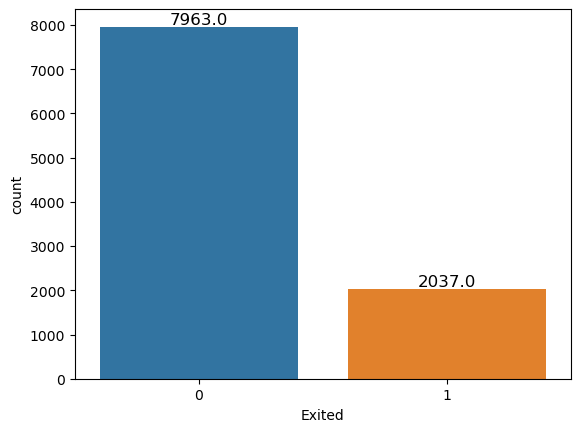

In [14]:
# plotting the target class to see their distribution 
ax = sns.countplot(x=df["Exited"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

as you can see from the graph the target class is not balanced which actully affects the predection process

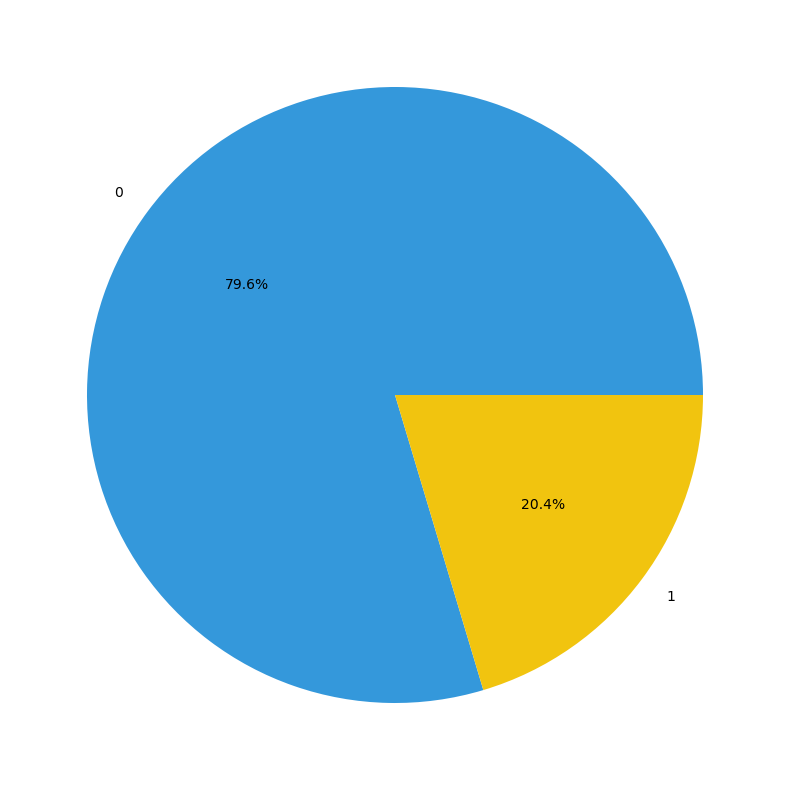

In [15]:
#creates a pie chart to visualize the distribution of the "Exited" column in the DataFrame 'df'
custom_colors = ['#3498DB', '#F1C40F']  # Replace these colors 
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=custom_colors)
plt.ylabel("")
plt.show()

When I was working on the project, I tried with and without balancing the dataset using smote

The balancing give me better Recall and Accuracy but my focus was on the recall

you will see down the process

In [16]:
# Calculate the correlation matrix 
df.corr()

C:\Users\sh-oo\AppData\Local\Temp\ipykernel_14408\3845769469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

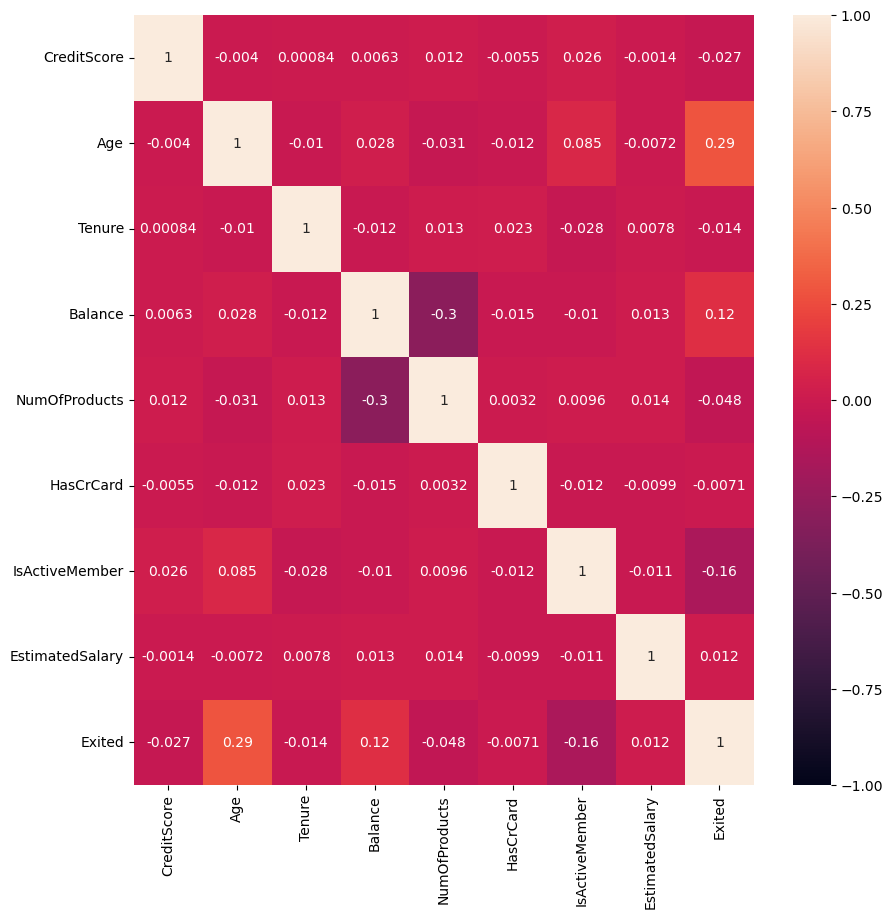

In [17]:
# Generates a heatmap that provides a visual representation 
# of the correlation between numerical features in the 'df' DataFrame.
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1 )
plt.show()

C:\Users\sh-oo\AppData\Local\Temp\ipykernel_14408\4217032522.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Exited"].sort_values().drop("Exited").plot(kind="bar")


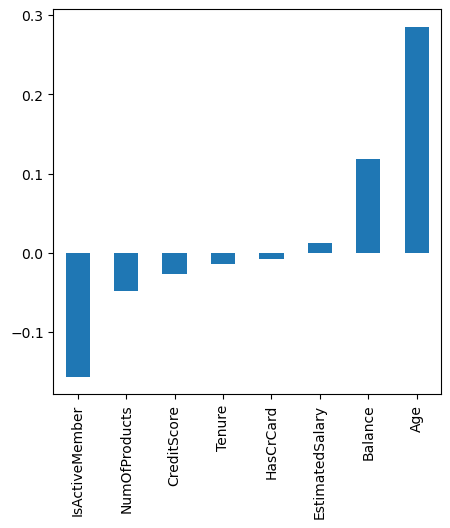

In [18]:
# The code you provided creates a bar plot to visualize the correlations between the "Exited"
# column and other numerical columns in the DataFrame
plt.figure(figsize=(5, 5))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="bar")
plt.show()

In [19]:
# how many outliers in the dataset?
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_index = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_index
# the true value is the number of outlires in the dataset
print(outlier_index.value_counts())

False    7677
True     2323
dtype: int64


C:\Users\sh-oo\AppData\Local\Temp\ipykernel_14408\511981312.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\sh-oo\AppData\Local\Temp\ipykernel_14408\511981312.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\sh-oo\AppData\Local\Temp\ipykernel_14408\511981312.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_index = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)


In [20]:
index_numbers = df[outlier_index].index
index_numbers

Int64Index([   0,    2,    5,    7,   16,   22,   30,   35,   41,   43,
            ...
            9947, 9956, 9960, 9962, 9975, 9981, 9982, 9991, 9997, 9998],
           dtype='int64', length=2323)

In [21]:
#df =df.drop(index_numbers)
#df["Exited"].value_counts() ==> 0    7677 only!!  < After dropping outliers so i will not remove it >

In [22]:
#df =df.reset_index(drop=True)
#df

Here I found outliers in the data set but when I was working on the modeling and the evaluation of the modeling 
but when i remove the outliers I found that it will remove class 1 too!!
so I decided I will not remove it !!

In [23]:
# create an interactive boxplot to explore the relationships between different numerical features
# and the "Exited" column in the DataFrame 'df'.
from ipywidgets import interact

def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);


interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

In [24]:
#This code iterates through each column in the DataFrame 'df' and prints the number of unique values for each column.
for col in df:
    print(f"{col:<30}:", df[col].nunique())

CreditScore                   : 460
Geography                     : 3
Gender                        : 2
Age                           : 70
Tenure                        : 11
Balance                       : 6382
NumOfProducts                 : 4
HasCrCard                     : 2
IsActiveMember                : 2
EstimatedSalary               : 9999
Exited                        : 2


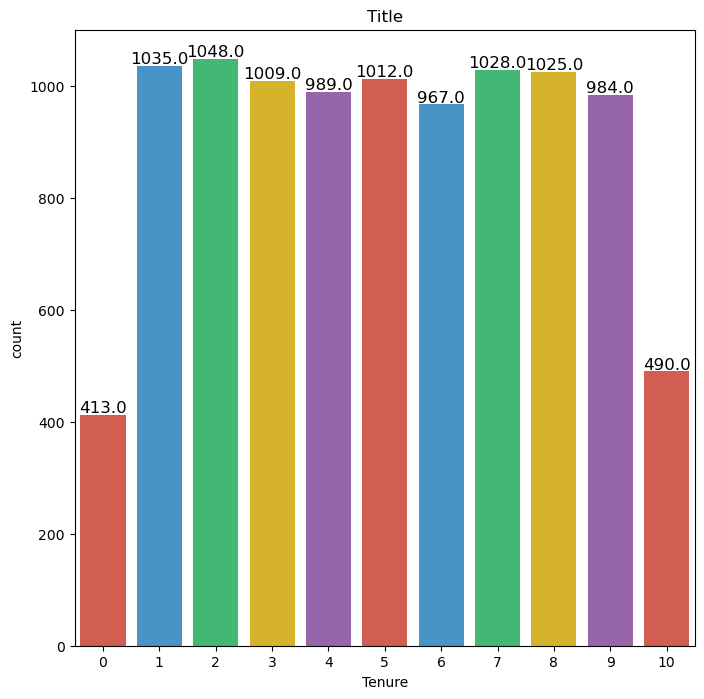

In [25]:
# Creates a countplot using Seaborn to visualize the distribution of the "Tenure" column in the DataFrame 'df'
custom_palette = ['#E74C3C', '#3498DB', '#2ECC71', '#F1C40F', '#9B59B6']
plt.figure(figsize=(8, 8))
x = sns.countplot(x='Tenure', data=df, palette=custom_palette)
plt.title('Title')
plt.xlabel('Tenure')

# Add labels above each bar
for p in x.patches:
    x.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#The code performs one-hot encoding on the "Geography" column in the DataFrame 'df'. 
df = pd.get_dummies(df, prefix=['Geo'],columns=['Geography'])

In [28]:
#The code performs one-hot encoding on the "Gender" column in the DataFrame 'df'. 
df = pd.get_dummies(df, prefix=['Gender'],columns=['Gender'])

In [29]:
# Print the dataset 
df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geo_France  Geo_Germany  \
0                  1        101348.88       1           1            0   
1                  1        112542.58       0           0            0   
2                  0        113931.57       1           1            0   
3                  0         93826.63       0           1            0   
4                  1         79084.10       0           0            0   
...              ...              ...     ...         ...          ...   
9995               0         96270.64       0           1            0   
9996               1        101699.77       0           1            0   
9997               1         42085.58       1           1            0   
9998               0         92888.52       1           0            1   
9999               0         38190.78       0           1            0   

      Geo_Spain  Gender_Female  Gender_Male  
0             0              1            0  
1             1              1            0  
2             0              1            0  
3             0              1            0  
4             1              1            0  
...         ...            ...          ...  
9995          0              0            1  
9996          0              0            1  
9997          0              1            0  
9998          0              0            1  
9999          0              1            0  

[10000 rows x 14 columns]

# Preprocessing of Data
- Train | Test Split, Scalling

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
# Splitting between the features and the target class
X = df.drop(columns= ["Exited"])
y = df.Exited

as you seen above the target class was imbalanced and the recall when i did it without over sampling was 

50% fpr class 1 and 92% for class 0

so I decided to balance the data using smote

In [32]:
# Create an instance of the Synthetic Minority Over-sampling Technique (SMOTE). 
oversample = SMOTE()

 In fcat, I uesd SMOTE in this problem because I want to balance the class distribution by generating synthetic samples for the -minority- class.

In [33]:
#Apply SMOTE to the feature matrix 'X' and target vector 'y' to balance the class distribution
X, y = oversample.fit_resample(X, y)

Now we have balance class!!!!

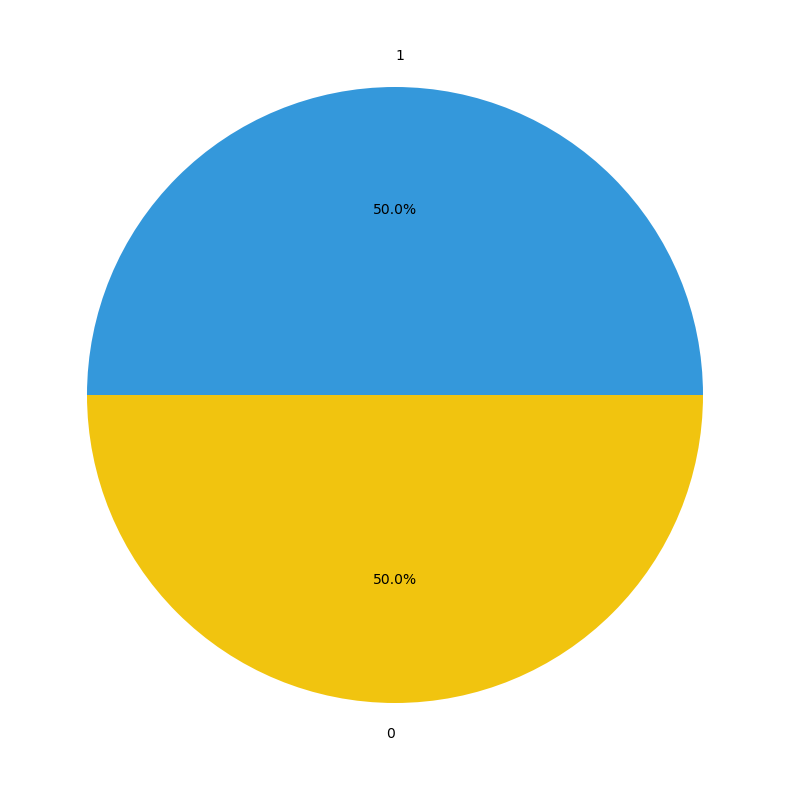

In [34]:
# Creates a pie chart to visualize the distribution of the target vector 'y'
custom_colors = ['#3498DB', '#F1C40F']  # Replace these colors 
y.value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=custom_colors)
plt.ylabel("")
plt.show()

In [35]:
# Counting class values
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [36]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [37]:
# Performing feature scaling on the training and testing sets using the StandardScaler.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
print("Training shape : ", X_train.shape)
print("Training target shape   : ", y_train.shape)
print("Test training shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Training shape :  (11148, 13)
Training target shape   :  (11148,)
Test training shape  :  (4778, 13)
Test target shape    :  (4778,)


# Modelling & Model Performance

## without class_weigth

### Create The Model

The code defines a function roc_auc_plot that generates 
Receiver Operating Characteristic (ROC) curves and calculates

the Area Under the Curve (AUC) for both training and testing sets.

In [39]:
from sklearn.metrics import roc_curve, auc

def roc_auc_plot(y_train, pred_train, y_test, pred_test):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)

    auc_train = auc(fpr_keras, tpr_keras)
    auc_test = auc(fpr_keras_test, tpr_keras_test)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_train))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

First, I tried multible of units=20 , units=24, units=26, units=30 , units=60, units=64
and same with second layer and it turns out the 24, 16 does not give me high varience 

.. some gave test accuracy = 81% train accuracy = 95%

In [40]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=24,activation="relu", input_dim=X_train.shape[1]), 
        keras.layers.Dense(units=16,activation="relu"),
        keras.layers.Dense(units=1,activation="sigmoid") #output layer
     ])

In [41]:
# Compile a neural network model with specified configuration.
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Here I used 

batch_size=20, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=25, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=32, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=50, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=100, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 


and i decided to go with  batch_size=50 epochs=100  because the veriece of them was less than the list above - some give me overfetting problem!!


In [58]:
modelANN = model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=50, epochs=500, verbose=1
)

Epoch 1/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9124 - val_loss: 0.3399 - val_accuracy: 0.8565
Epoch 2/500
201/201 [==============================] - 0s 964us/step - loss: 0.2107 - accuracy: 0.9091 - val_loss: 0.3546 - val_accuracy: 0.8592
Epoch 3/500
201/201 [==============================] - 0s 914us/step - loss: 0.2091 - accuracy: 0.9098 - val_loss: 0.3444 - val_accuracy: 0.8646
Epoch 4/500
201/201 [==============================] - 0s 937us/step - loss: 0.2098 - accuracy: 0.9117 - val_loss: 0.3371 - val_accuracy: 0.8583
Epoch 5/500
201/201 [==============================] - 0s 923us/step - loss: 0.2095 - accuracy: 0.9099 - val_loss: 0.3420 - val_accuracy: 0.8601
Epoch 6/500
201/201 [==============================] - 0s 909us/step - loss: 0.2086 - accuracy: 0.9115 - val_loss: 0.3367 - val_accuracy: 0.8601
Epoch 7/500
201/201 [==============================] - 0s 922us/step - loss: 0.2092 - accuracy: 0.9114 - val_loss: 0.3430 - val_accu

201/201 [==============================] - 0s 984us/step - loss: 0.2081 - accuracy: 0.9117 - val_loss: 0.3464 - val_accuracy: 0.8592
Epoch 58/500
201/201 [==============================] - 0s 948us/step - loss: 0.2074 - accuracy: 0.9113 - val_loss: 0.3542 - val_accuracy: 0.8646
Epoch 59/500
201/201 [==============================] - 0s 983us/step - loss: 0.2071 - accuracy: 0.9118 - val_loss: 0.3425 - val_accuracy: 0.8655
Epoch 60/500
201/201 [==============================] - 0s 933us/step - loss: 0.2082 - accuracy: 0.9089 - val_loss: 0.3482 - val_accuracy: 0.8601
Epoch 61/500
201/201 [==============================] - 0s 947us/step - loss: 0.2071 - accuracy: 0.9117 - val_loss: 0.3436 - val_accuracy: 0.8655
Epoch 62/500
201/201 [==============================] - 0s 985us/step - loss: 0.2074 - accuracy: 0.9117 - val_loss: 0.3486 - val_accuracy: 0.8637
Epoch 63/500
201/201 [==============================] - 0s 966us/step - loss: 0.2070 - accuracy: 0.9122 - val_loss: 0.3488 - val_accuracy

201/201 [==============================] - 0s 912us/step - loss: 0.2062 - accuracy: 0.9110 - val_loss: 0.3475 - val_accuracy: 0.8637
Epoch 114/500
201/201 [==============================] - 0s 888us/step - loss: 0.2058 - accuracy: 0.9115 - val_loss: 0.3451 - val_accuracy: 0.8637
Epoch 115/500
201/201 [==============================] - 0s 918us/step - loss: 0.2055 - accuracy: 0.9114 - val_loss: 0.3565 - val_accuracy: 0.8619
Epoch 116/500
201/201 [==============================] - 0s 895us/step - loss: 0.2060 - accuracy: 0.9107 - val_loss: 0.3480 - val_accuracy: 0.8610
Epoch 117/500
201/201 [==============================] - 0s 920us/step - loss: 0.2056 - accuracy: 0.9125 - val_loss: 0.3410 - val_accuracy: 0.8610
Epoch 118/500
201/201 [==============================] - 0s 886us/step - loss: 0.2062 - accuracy: 0.9089 - val_loss: 0.3452 - val_accuracy: 0.8583
Epoch 119/500
201/201 [==============================] - 0s 900us/step - loss: 0.2051 - accuracy: 0.9136 - val_loss: 0.3456 - val_ac

Epoch 169/500
201/201 [==============================] - 0s 907us/step - loss: 0.2042 - accuracy: 0.9131 - val_loss: 0.3482 - val_accuracy: 0.8646
Epoch 170/500
201/201 [==============================] - 0s 966us/step - loss: 0.2035 - accuracy: 0.9122 - val_loss: 0.3474 - val_accuracy: 0.8628
Epoch 171/500
201/201 [==============================] - 0s 939us/step - loss: 0.2047 - accuracy: 0.9128 - val_loss: 0.3436 - val_accuracy: 0.8637
Epoch 172/500
201/201 [==============================] - 0s 925us/step - loss: 0.2038 - accuracy: 0.9141 - val_loss: 0.3428 - val_accuracy: 0.8646
Epoch 173/500
201/201 [==============================] - 0s 915us/step - loss: 0.2039 - accuracy: 0.9134 - val_loss: 0.3454 - val_accuracy: 0.8610
Epoch 174/500
201/201 [==============================] - 0s 890us/step - loss: 0.2056 - accuracy: 0.9119 - val_loss: 0.3568 - val_accuracy: 0.8646
Epoch 175/500
201/201 [==============================] - 0s 925us/step - loss: 0.2052 - accuracy: 0.9119 - val_loss: 0

Epoch 225/500
201/201 [==============================] - 0s 927us/step - loss: 0.2048 - accuracy: 0.9138 - val_loss: 0.3523 - val_accuracy: 0.8682
Epoch 226/500
201/201 [==============================] - 0s 906us/step - loss: 0.2034 - accuracy: 0.9134 - val_loss: 0.3483 - val_accuracy: 0.8637
Epoch 227/500
201/201 [==============================] - 0s 905us/step - loss: 0.2032 - accuracy: 0.9130 - val_loss: 0.3499 - val_accuracy: 0.8619
Epoch 228/500
201/201 [==============================] - 0s 914us/step - loss: 0.2030 - accuracy: 0.9123 - val_loss: 0.3468 - val_accuracy: 0.8619
Epoch 229/500
201/201 [==============================] - 0s 909us/step - loss: 0.2042 - accuracy: 0.9129 - val_loss: 0.3523 - val_accuracy: 0.8610
Epoch 230/500
201/201 [==============================] - 0s 935us/step - loss: 0.2051 - accuracy: 0.9101 - val_loss: 0.3447 - val_accuracy: 0.8628
Epoch 231/500
201/201 [==============================] - 0s 910us/step - loss: 0.2027 - accuracy: 0.9131 - val_loss: 0

Epoch 281/500
201/201 [==============================] - 0s 954us/step - loss: 0.2034 - accuracy: 0.9132 - val_loss: 0.3583 - val_accuracy: 0.8619
Epoch 282/500
201/201 [==============================] - 0s 971us/step - loss: 0.2030 - accuracy: 0.9132 - val_loss: 0.3454 - val_accuracy: 0.8592
Epoch 283/500
201/201 [==============================] - 0s 950us/step - loss: 0.2027 - accuracy: 0.9136 - val_loss: 0.3500 - val_accuracy: 0.8646
Epoch 284/500
201/201 [==============================] - 0s 946us/step - loss: 0.2035 - accuracy: 0.9140 - val_loss: 0.3555 - val_accuracy: 0.8664
Epoch 285/500
201/201 [==============================] - 0s 912us/step - loss: 0.2032 - accuracy: 0.9150 - val_loss: 0.3495 - val_accuracy: 0.8601
Epoch 286/500
201/201 [==============================] - 0s 941us/step - loss: 0.2019 - accuracy: 0.9128 - val_loss: 0.3598 - val_accuracy: 0.8592
Epoch 287/500
201/201 [==============================] - 0s 933us/step - loss: 0.2022 - accuracy: 0.9137 - val_loss: 0

Epoch 337/500
201/201 [==============================] - 0s 958us/step - loss: 0.2018 - accuracy: 0.9149 - val_loss: 0.3531 - val_accuracy: 0.8610
Epoch 338/500
201/201 [==============================] - 0s 968us/step - loss: 0.2021 - accuracy: 0.9130 - val_loss: 0.3647 - val_accuracy: 0.8556
Epoch 339/500
201/201 [==============================] - 0s 950us/step - loss: 0.2025 - accuracy: 0.9132 - val_loss: 0.3585 - val_accuracy: 0.8601
Epoch 340/500
201/201 [==============================] - 0s 971us/step - loss: 0.2019 - accuracy: 0.9147 - val_loss: 0.3598 - val_accuracy: 0.8628
Epoch 341/500
201/201 [==============================] - 0s 959us/step - loss: 0.2017 - accuracy: 0.9128 - val_loss: 0.3510 - val_accuracy: 0.8601
Epoch 342/500
201/201 [==============================] - 0s 965us/step - loss: 0.2028 - accuracy: 0.9133 - val_loss: 0.3530 - val_accuracy: 0.8610
Epoch 343/500
201/201 [==============================] - 0s 948us/step - loss: 0.2026 - accuracy: 0.9132 - val_loss: 0

Epoch 393/500
201/201 [==============================] - 0s 923us/step - loss: 0.2015 - accuracy: 0.9133 - val_loss: 0.3507 - val_accuracy: 0.8592
Epoch 394/500
201/201 [==============================] - 0s 898us/step - loss: 0.2023 - accuracy: 0.9126 - val_loss: 0.3638 - val_accuracy: 0.8610
Epoch 395/500
201/201 [==============================] - 0s 931us/step - loss: 0.2016 - accuracy: 0.9124 - val_loss: 0.3521 - val_accuracy: 0.8583
Epoch 396/500
201/201 [==============================] - 0s 958us/step - loss: 0.2030 - accuracy: 0.9147 - val_loss: 0.3549 - val_accuracy: 0.8619
Epoch 397/500
201/201 [==============================] - 0s 931us/step - loss: 0.2015 - accuracy: 0.9128 - val_loss: 0.3483 - val_accuracy: 0.8610
Epoch 398/500
201/201 [==============================] - 0s 949us/step - loss: 0.2020 - accuracy: 0.9132 - val_loss: 0.3567 - val_accuracy: 0.8574
Epoch 399/500
201/201 [==============================] - 0s 960us/step - loss: 0.2009 - accuracy: 0.9122 - val_loss: 0

Epoch 449/500
201/201 [==============================] - 0s 973us/step - loss: 0.2016 - accuracy: 0.9127 - val_loss: 0.3556 - val_accuracy: 0.8583
Epoch 450/500
201/201 [==============================] - 0s 962us/step - loss: 0.2009 - accuracy: 0.9146 - val_loss: 0.3625 - val_accuracy: 0.8664
Epoch 451/500
201/201 [==============================] - 0s 959us/step - loss: 0.2005 - accuracy: 0.9148 - val_loss: 0.3516 - val_accuracy: 0.8628
Epoch 452/500
201/201 [==============================] - 0s 971us/step - loss: 0.2009 - accuracy: 0.9128 - val_loss: 0.3609 - val_accuracy: 0.8637
Epoch 453/500
201/201 [==============================] - 0s 964us/step - loss: 0.2003 - accuracy: 0.9130 - val_loss: 0.3548 - val_accuracy: 0.8637
Epoch 454/500
201/201 [==============================] - 0s 945us/step - loss: 0.2020 - accuracy: 0.9126 - val_loss: 0.3656 - val_accuracy: 0.8583
Epoch 455/500
201/201 [==============================] - 0s 938us/step - loss: 0.2010 - accuracy: 0.9129 - val_loss: 0

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [59]:
# Display a summary of the architecture and parameters of a neural network model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                336       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 753 (2.94 KB)
Trainable params: 753 (2.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Extracts and stores the training history of a neural network model.
modelhistory=model.history.history
modelhistory

{'loss': [0.20853649079799652,
  0.21073918044567108,
  0.20908784866333008,
  0.20980267226696014,
  0.20949772000312805,
  0.20857559144496918,
  0.20919175446033478,
  0.20845414698123932,
  0.2089616060256958,
  0.2080751210451126,
  0.20884402096271515,
  0.20839418470859528,
  0.2084476500749588,
  0.2094813883304596,
  0.20968712866306305,
  0.20896503329277039,
  0.20842762291431427,
  0.20813581347465515,
  0.20822472870349884,
  0.20900540053844452,
  0.20833586156368256,
  0.2078687995672226,
  0.20763154327869415,
  0.20890115201473236,
  0.2084706723690033,
  0.2089519202709198,
  0.208431214094162,
  0.2076905071735382,
  0.208281472325325,
  0.20853134989738464,
  0.20738783478736877,
  0.20800308883190155,
  0.20835189521312714,
  0.20866434276103973,
  0.2079358547925949,
  0.20887812972068787,
  0.20881253480911255,
  0.20841921865940094,
  0.20798982679843903,
  0.2078300267457962,
  0.20772576332092285,
  0.20767013728618622,
  0.2077680230140686,
  0.20745140314102

In [61]:
# Displays a confusion matrix and a classification report for the training set 
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

349/349 [==============================] - 0s 572us/step
[[5211  363]
 [ 602 4972]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      5574
           1       0.93      0.89      0.91      5574

    accuracy                           0.91     11148
   macro avg       0.91      0.91      0.91     11148
weighted avg       0.91      0.91      0.91     11148



In [62]:
# Displays a confusion matrix and a classification report for the test set 
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 614us/step
[[2155  234]
 [ 373 2016]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2389
           1       0.90      0.84      0.87      2389

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



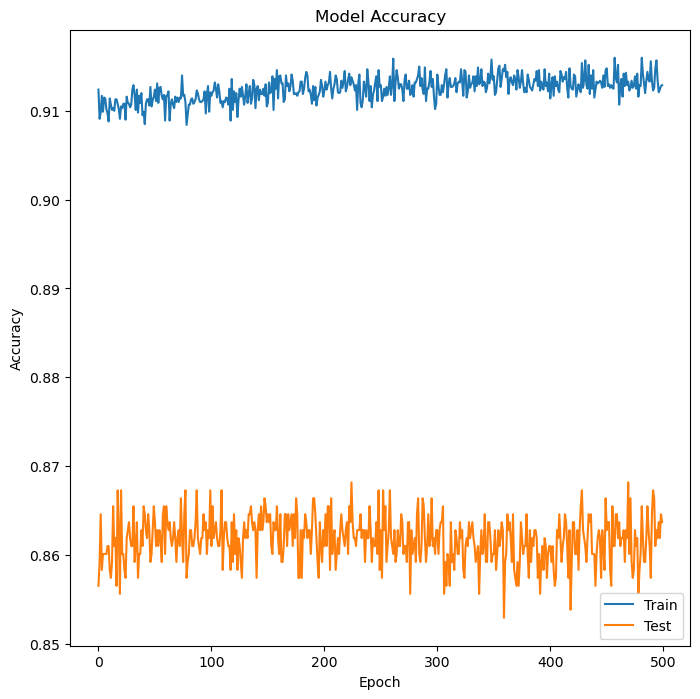

In [63]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelANN.history['accuracy'])
plt.plot(modelANN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [64]:
# Calculates the Receiver Operating Characteristic Area Under the Curve (ROC AUC) score 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8729593972373377

In [66]:
# Display Acuuracy and loss of the model
loss,acc = model.evaluate(X_test,y_test)
print("Test Accuarcy:",acc)
print("Test Loss:",loss)

150/150 [==============================] - 0s 692us/step - loss: 0.3346 - accuracy: 0.8730
Test Accuarcy: 0.8729593753814697
Test Loss: 0.3346017599105835


In [67]:
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.208536  0.912389  0.339903      0.856502
1  0.210739  0.909100  0.354609      0.859193
2  0.209088  0.909798  0.344363      0.864574
3  0.209803  0.911691  0.337147      0.858296
4  0.209498  0.909897  0.341965      0.860090

In [68]:
loss_df

loss  accuracy  val_loss  val_accuracy
0    0.208536  0.912389  0.339903      0.856502
1    0.210739  0.909100  0.354609      0.859193
2    0.209088  0.909798  0.344363      0.864574
3    0.209803  0.911691  0.337147      0.858296
4    0.209498  0.909897  0.341965      0.860090
..        ...       ...       ...           ...
495  0.200886  0.913486  0.360572      0.861883
496  0.200926  0.912090  0.370055      0.863677
497  0.201037  0.912389  0.355940      0.861883
498  0.200774  0.912788  0.351840      0.864574
499  0.200674  0.912887  0.356831      0.863677

[500 rows x 4 columns]

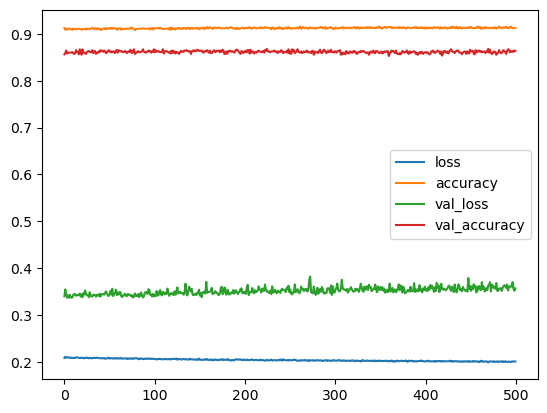

In [69]:
loss_df.plot()
plt.show()

In [70]:
y_pred = model.predict(X_test)

150/150 [==============================] - 0s 593us/step


In [71]:
y_train_pred = model.predict(X_train)

349/349 [==============================] - 0s 578us/step


In [72]:
roc_auc_score(y_test, y_pred)

0.9363165309958911

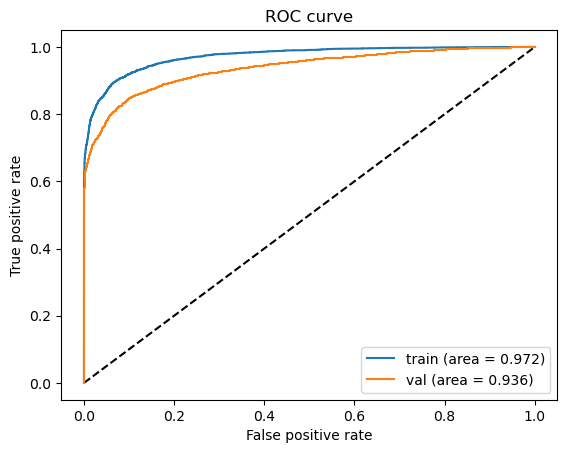

In [73]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [74]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [75]:
class_weights

{0: 1.0, 1: 1.0}

In [76]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=24,activation="relu", input_dim=X_train.shape[1]), 
        keras.layers.Dense(units=16,activation="relu"),
        keras.layers.Dense(units=1,activation="sigmoid") #output layer
])   

In [77]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [78]:
modelwithW=model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=50, epochs=500, verbose=1)

Epoch 1/500
201/201 [==============================] - 1s 1ms/step - loss: 0.5947 - accuracy: 0.6781 - val_loss: 0.4337 - val_accuracy: 0.8117
Epoch 2/500
201/201 [==============================] - 0s 950us/step - loss: 0.3685 - accuracy: 0.8362 - val_loss: 0.3765 - val_accuracy: 0.8368
Epoch 3/500
201/201 [==============================] - 0s 955us/step - loss: 0.3266 - accuracy: 0.8519 - val_loss: 0.3488 - val_accuracy: 0.8430
Epoch 4/500
201/201 [==============================] - 0s 935us/step - loss: 0.3050 - accuracy: 0.8641 - val_loss: 0.3416 - val_accuracy: 0.8520
Epoch 5/500
201/201 [==============================] - 0s 947us/step - loss: 0.2923 - accuracy: 0.8703 - val_loss: 0.3402 - val_accuracy: 0.8538
Epoch 6/500
201/201 [==============================] - 0s 928us/step - loss: 0.2852 - accuracy: 0.8731 - val_loss: 0.3324 - val_accuracy: 0.8529
Epoch 7/500
201/201 [==============================] - 0s 949us/step - loss: 0.2811 - accuracy: 0.8736 - val_loss: 0.3309 - val_accu

201/201 [==============================] - 0s 920us/step - loss: 0.2431 - accuracy: 0.8913 - val_loss: 0.3229 - val_accuracy: 0.8574
Epoch 58/500
201/201 [==============================] - 0s 924us/step - loss: 0.2434 - accuracy: 0.8935 - val_loss: 0.3219 - val_accuracy: 0.8628
Epoch 59/500
201/201 [==============================] - 0s 910us/step - loss: 0.2431 - accuracy: 0.8918 - val_loss: 0.3250 - val_accuracy: 0.8601
Epoch 60/500
201/201 [==============================] - 0s 919us/step - loss: 0.2429 - accuracy: 0.8929 - val_loss: 0.3250 - val_accuracy: 0.8574
Epoch 61/500
201/201 [==============================] - 0s 955us/step - loss: 0.2429 - accuracy: 0.8934 - val_loss: 0.3232 - val_accuracy: 0.8628
Epoch 62/500
201/201 [==============================] - 0s 910us/step - loss: 0.2426 - accuracy: 0.8931 - val_loss: 0.3241 - val_accuracy: 0.8655
Epoch 63/500
201/201 [==============================] - 0s 940us/step - loss: 0.2421 - accuracy: 0.8930 - val_loss: 0.3246 - val_accuracy

201/201 [==============================] - 0s 906us/step - loss: 0.2331 - accuracy: 0.8953 - val_loss: 0.3388 - val_accuracy: 0.8601
Epoch 114/500
201/201 [==============================] - 0s 904us/step - loss: 0.2339 - accuracy: 0.8981 - val_loss: 0.3340 - val_accuracy: 0.8619
Epoch 115/500
201/201 [==============================] - 0s 951us/step - loss: 0.2337 - accuracy: 0.8983 - val_loss: 0.3336 - val_accuracy: 0.8619
Epoch 116/500
201/201 [==============================] - 0s 898us/step - loss: 0.2333 - accuracy: 0.8979 - val_loss: 0.3365 - val_accuracy: 0.8646
Epoch 117/500
201/201 [==============================] - 0s 969us/step - loss: 0.2329 - accuracy: 0.8964 - val_loss: 0.3389 - val_accuracy: 0.8601
Epoch 118/500
201/201 [==============================] - 0s 922us/step - loss: 0.2328 - accuracy: 0.8968 - val_loss: 0.3388 - val_accuracy: 0.8646
Epoch 119/500
201/201 [==============================] - 0s 984us/step - loss: 0.2327 - accuracy: 0.8962 - val_loss: 0.3371 - val_ac

Epoch 169/500
201/201 [==============================] - 0s 910us/step - loss: 0.2266 - accuracy: 0.9009 - val_loss: 0.3458 - val_accuracy: 0.8637
Epoch 170/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2265 - accuracy: 0.9029 - val_loss: 0.3417 - val_accuracy: 0.8601
Epoch 171/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9036 - val_loss: 0.3509 - val_accuracy: 0.8574
Epoch 172/500
201/201 [==============================] - 0s 976us/step - loss: 0.2266 - accuracy: 0.9019 - val_loss: 0.3455 - val_accuracy: 0.8574
Epoch 173/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.9031 - val_loss: 0.3454 - val_accuracy: 0.8628
Epoch 174/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9036 - val_loss: 0.3403 - val_accuracy: 0.8646
Epoch 175/500
201/201 [==============================] - 0s 926us/step - loss: 0.2258 - accuracy: 0.9005 - val_loss: 0.3532 - 

Epoch 225/500
201/201 [==============================] - 0s 979us/step - loss: 0.2234 - accuracy: 0.9038 - val_loss: 0.3453 - val_accuracy: 0.8637
Epoch 226/500
201/201 [==============================] - 0s 963us/step - loss: 0.2228 - accuracy: 0.9052 - val_loss: 0.3483 - val_accuracy: 0.8574
Epoch 227/500
201/201 [==============================] - 0s 947us/step - loss: 0.2223 - accuracy: 0.9041 - val_loss: 0.3512 - val_accuracy: 0.8592
Epoch 228/500
201/201 [==============================] - 0s 964us/step - loss: 0.2229 - accuracy: 0.9040 - val_loss: 0.3505 - val_accuracy: 0.8601
Epoch 229/500
201/201 [==============================] - 0s 935us/step - loss: 0.2219 - accuracy: 0.9038 - val_loss: 0.3479 - val_accuracy: 0.8610
Epoch 230/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.9058 - val_loss: 0.3516 - val_accuracy: 0.8664
Epoch 231/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9049 - val_loss: 0.352

Epoch 281/500
201/201 [==============================] - 0s 881us/step - loss: 0.2199 - accuracy: 0.9059 - val_loss: 0.3527 - val_accuracy: 0.8628
Epoch 282/500
201/201 [==============================] - 0s 895us/step - loss: 0.2190 - accuracy: 0.9063 - val_loss: 0.3506 - val_accuracy: 0.8592
Epoch 283/500
201/201 [==============================] - 0s 902us/step - loss: 0.2186 - accuracy: 0.9065 - val_loss: 0.3606 - val_accuracy: 0.8628
Epoch 284/500
201/201 [==============================] - 0s 886us/step - loss: 0.2190 - accuracy: 0.9062 - val_loss: 0.3527 - val_accuracy: 0.8619
Epoch 285/500
201/201 [==============================] - 0s 913us/step - loss: 0.2197 - accuracy: 0.9063 - val_loss: 0.3498 - val_accuracy: 0.8664
Epoch 286/500
201/201 [==============================] - 0s 915us/step - loss: 0.2189 - accuracy: 0.9061 - val_loss: 0.3501 - val_accuracy: 0.8619
Epoch 287/500
201/201 [==============================] - 0s 945us/step - loss: 0.2184 - accuracy: 0.9064 - val_loss: 0

Epoch 337/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2171 - accuracy: 0.9076 - val_loss: 0.3605 - val_accuracy: 0.8583
Epoch 338/500
201/201 [==============================] - 0s 920us/step - loss: 0.2175 - accuracy: 0.9085 - val_loss: 0.3596 - val_accuracy: 0.8610
Epoch 339/500
201/201 [==============================] - 0s 929us/step - loss: 0.2165 - accuracy: 0.9078 - val_loss: 0.3549 - val_accuracy: 0.8556
Epoch 340/500
201/201 [==============================] - 0s 995us/step - loss: 0.2175 - accuracy: 0.9057 - val_loss: 0.3632 - val_accuracy: 0.8592
Epoch 341/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2166 - accuracy: 0.9065 - val_loss: 0.3568 - val_accuracy: 0.8601
Epoch 342/500
201/201 [==============================] - 0s 979us/step - loss: 0.2164 - accuracy: 0.9063 - val_loss: 0.3548 - val_accuracy: 0.8574
Epoch 343/500
201/201 [==============================] - 0s 917us/step - loss: 0.2162 - accuracy: 0.9069 - val_loss: 0.354

Epoch 393/500
201/201 [==============================] - 0s 895us/step - loss: 0.2147 - accuracy: 0.9061 - val_loss: 0.3585 - val_accuracy: 0.8574
Epoch 394/500
201/201 [==============================] - 0s 888us/step - loss: 0.2137 - accuracy: 0.9094 - val_loss: 0.3684 - val_accuracy: 0.8538
Epoch 395/500
201/201 [==============================] - 0s 906us/step - loss: 0.2148 - accuracy: 0.9078 - val_loss: 0.3620 - val_accuracy: 0.8601
Epoch 396/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9062 - val_loss: 0.3641 - val_accuracy: 0.8574
Epoch 397/500
201/201 [==============================] - 0s 931us/step - loss: 0.2136 - accuracy: 0.9079 - val_loss: 0.3626 - val_accuracy: 0.8574
Epoch 398/500
201/201 [==============================] - 0s 982us/step - loss: 0.2136 - accuracy: 0.9081 - val_loss: 0.3648 - val_accuracy: 0.8574
Epoch 399/500
201/201 [==============================] - 0s 916us/step - loss: 0.2133 - accuracy: 0.9081 - val_loss: 0.3

Epoch 449/500
201/201 [==============================] - 0s 963us/step - loss: 0.2129 - accuracy: 0.9088 - val_loss: 0.3622 - val_accuracy: 0.8538
Epoch 450/500
201/201 [==============================] - 0s 957us/step - loss: 0.2130 - accuracy: 0.9084 - val_loss: 0.3618 - val_accuracy: 0.8538
Epoch 451/500
201/201 [==============================] - 0s 880us/step - loss: 0.2131 - accuracy: 0.9079 - val_loss: 0.3695 - val_accuracy: 0.8547
Epoch 452/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9066 - val_loss: 0.3603 - val_accuracy: 0.8520
Epoch 453/500
201/201 [==============================] - 0s 945us/step - loss: 0.2126 - accuracy: 0.9099 - val_loss: 0.3605 - val_accuracy: 0.8520
Epoch 454/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2125 - accuracy: 0.9091 - val_loss: 0.3575 - val_accuracy: 0.8574
Epoch 455/500
201/201 [==============================] - 0s 948us/step - loss: 0.2127 - accuracy: 0.9086 - val_loss: 0.362

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [80]:
modelhistory=model.history.history

In [82]:
loss,acc = model.evaluate(X_test,y_test)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

150/150 [==============================] - 0s 724us/step - loss: 0.3225 - accuracy: 0.8629
Test Accuarcy: 0.8629133701324463
Tets Loss: 0.3225290775299072


In [83]:
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.594663  0.678062  0.433677      0.811659
1  0.368508  0.836240  0.376451      0.836771
2  0.326586  0.851889  0.348789      0.843049
3  0.304958  0.864148  0.341570      0.852018
4  0.292271  0.870328  0.340228      0.853812

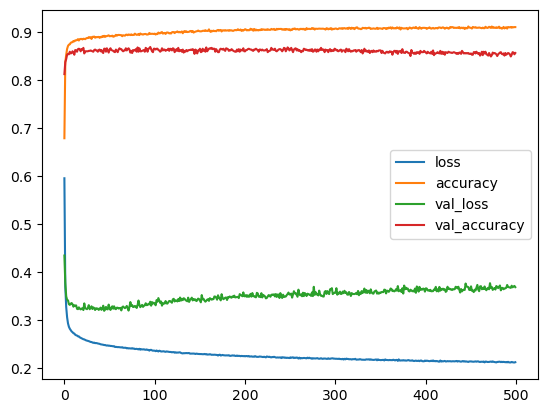

In [84]:
loss_df.plot()
plt.show()

In [85]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

349/349 [==============================] - 0s 598us/step
[[4996  578]
 [ 482 5092]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5574
           1       0.90      0.91      0.91      5574

    accuracy                           0.90     11148
   macro avg       0.91      0.90      0.90     11148
weighted avg       0.91      0.90      0.90     11148



In [86]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 564us/step
[[2051  338]
 [ 317 2072]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2389
           1       0.86      0.87      0.86      2389

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



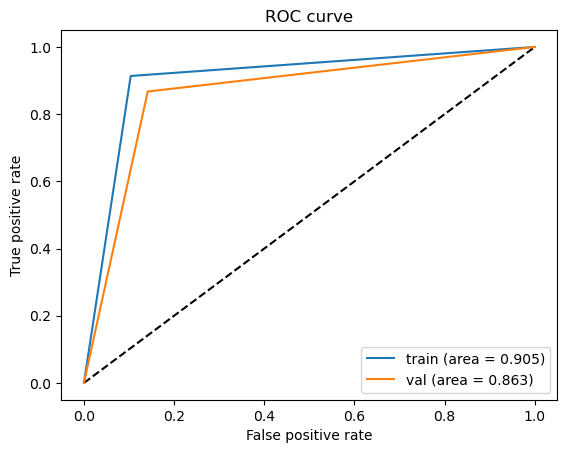

In [87]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

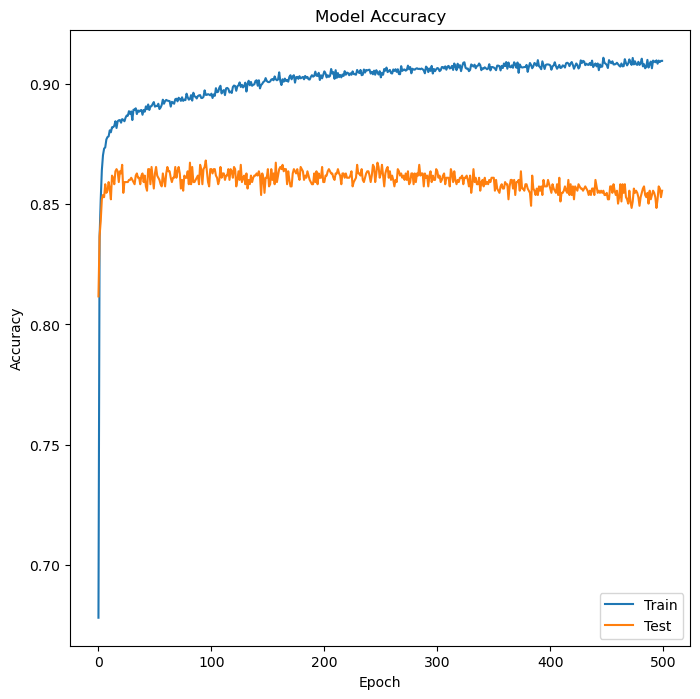

In [88]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelwithW.history['accuracy'])
plt.plot(modelwithW.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

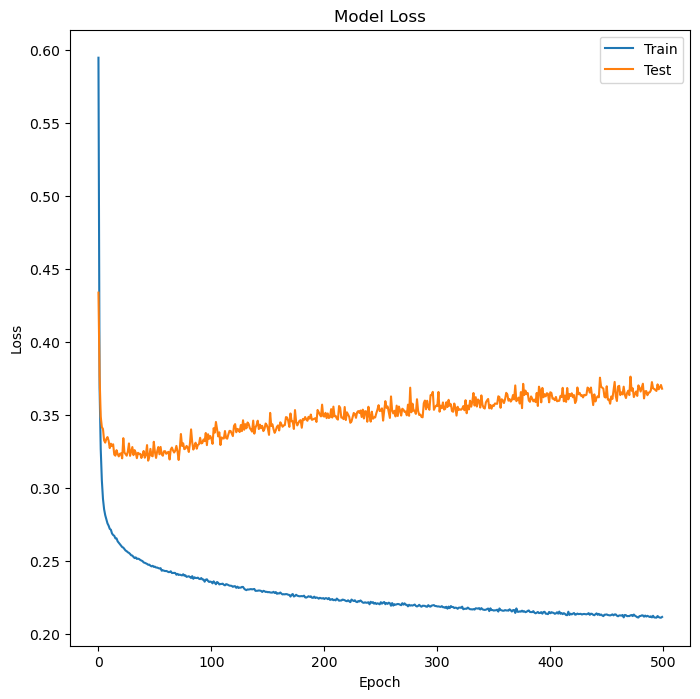

In [89]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelwithW.history['loss'])
plt.plot(modelwithW.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [90]:
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.04)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [108]:
modelLr=model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 50, epochs = 500, class_weight=class_weights)

Epoch 1/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2471 - recall: 0.8136 - val_loss: 0.3554 - val_recall: 0.7635
Epoch 2/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2513 - recall: 0.8222 - val_loss: 0.4026 - val_recall: 0.7652
Epoch 3/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2559 - recall: 0.8110 - val_loss: 0.3771 - val_recall: 0.7617
Epoch 4/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2635 - recall: 0.7992 - val_loss: 0.3618 - val_recall: 0.7287
Epoch 5/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2543 - recall: 0.7934 - val_loss: 0.4282 - val_recall: 0.7600
Epoch 6/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2535 - recall: 0.7964 - val_loss: 0.4239 - val_recall: 0.7461
Epoch 7/500
201/201 [==============================] - 0s 981us/step - loss: 0.2499 - recall: 0.7990 - val_loss: 0.3927 - val_recall: 0.7617
Epoch 8/500
201/201 [====

201/201 [==============================] - 0s 1ms/step - loss: 0.2488 - recall: 0.8152 - val_loss: 0.3936 - val_recall: 0.7774
Epoch 60/500
201/201 [==============================] - 0s 975us/step - loss: 0.2473 - recall: 0.8152 - val_loss: 0.4143 - val_recall: 0.7809
Epoch 61/500
201/201 [==============================] - 0s 995us/step - loss: 0.2436 - recall: 0.8158 - val_loss: 0.3942 - val_recall: 0.7652
Epoch 62/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2480 - recall: 0.8156 - val_loss: 0.3774 - val_recall: 0.7843
Epoch 63/500
201/201 [==============================] - 0s 992us/step - loss: 0.2440 - recall: 0.8182 - val_loss: 0.4114 - val_recall: 0.7843
Epoch 64/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2435 - recall: 0.8146 - val_loss: 0.3761 - val_recall: 0.7617
Epoch 65/500
201/201 [==============================] - 0s 985us/step - loss: 0.2453 - recall: 0.8134 - val_loss: 0.4118 - val_recall: 0.7791
Epoch 66/500
201/201 [===

Epoch 117/500
201/201 [==============================] - 0s 950us/step - loss: 0.2479 - recall: 0.8088 - val_loss: 0.4076 - val_recall: 0.7617
Epoch 118/500
201/201 [==============================] - 0s 969us/step - loss: 0.2465 - recall: 0.8066 - val_loss: 0.5237 - val_recall: 0.7600
Epoch 119/500
201/201 [==============================] - 0s 957us/step - loss: 0.2469 - recall: 0.8016 - val_loss: 0.4277 - val_recall: 0.7652
Epoch 120/500
201/201 [==============================] - 0s 946us/step - loss: 0.2434 - recall: 0.8162 - val_loss: 0.3770 - val_recall: 0.7583
Epoch 121/500
201/201 [==============================] - 0s 947us/step - loss: 0.2435 - recall: 0.8190 - val_loss: 0.4516 - val_recall: 0.7739
Epoch 122/500
201/201 [==============================] - 0s 948us/step - loss: 0.2454 - recall: 0.8200 - val_loss: 0.4373 - val_recall: 0.7617
Epoch 123/500
201/201 [==============================] - 0s 951us/step - loss: 0.2717 - recall: 0.7962 - val_loss: 0.3722 - val_recall: 0.7496

201/201 [==============================] - 0s 966us/step - loss: 0.2524 - recall: 0.8176 - val_loss: 0.3695 - val_recall: 0.7652
Epoch 175/500
201/201 [==============================] - 0s 967us/step - loss: 0.2502 - recall: 0.8092 - val_loss: 0.4603 - val_recall: 0.7617
Epoch 176/500
201/201 [==============================] - 0s 986us/step - loss: 0.2457 - recall: 0.8116 - val_loss: 0.4227 - val_recall: 0.7652
Epoch 177/500
201/201 [==============================] - 0s 978us/step - loss: 0.2449 - recall: 0.8134 - val_loss: 0.4055 - val_recall: 0.7583
Epoch 178/500
201/201 [==============================] - 0s 944us/step - loss: 0.2437 - recall: 0.8126 - val_loss: 0.4006 - val_recall: 0.7739
Epoch 179/500
201/201 [==============================] - 0s 969us/step - loss: 0.2455 - recall: 0.8134 - val_loss: 0.4514 - val_recall: 0.7600
Epoch 180/500
201/201 [==============================] - 0s 957us/step - loss: 0.2425 - recall: 0.8146 - val_loss: 0.4459 - val_recall: 0.7722
Epoch 181/500

201/201 [==============================] - 0s 967us/step - loss: 0.2452 - recall: 0.8118 - val_loss: 0.3961 - val_recall: 0.7461
Epoch 232/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2438 - recall: 0.8104 - val_loss: 0.4422 - val_recall: 0.7652
Epoch 233/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2464 - recall: 0.8170 - val_loss: 0.5516 - val_recall: 0.7617
Epoch 234/500
201/201 [==============================] - 0s 955us/step - loss: 0.2434 - recall: 0.8154 - val_loss: 0.4192 - val_recall: 0.7791
Epoch 235/500
201/201 [==============================] - 0s 971us/step - loss: 0.2467 - recall: 0.8162 - val_loss: 0.5237 - val_recall: 0.7687
Epoch 236/500
201/201 [==============================] - 0s 952us/step - loss: 0.2462 - recall: 0.8142 - val_loss: 0.3856 - val_recall: 0.7583
Epoch 237/500
201/201 [==============================] - 0s 962us/step - loss: 0.2458 - recall: 0.8116 - val_loss: 0.4284 - val_recall: 0.7635
Epoch 238/500
201

201/201 [==============================] - 0s 966us/step - loss: 0.2483 - recall: 0.8168 - val_loss: 0.4717 - val_recall: 0.7687
Epoch 289/500
201/201 [==============================] - 0s 974us/step - loss: 0.2479 - recall: 0.8106 - val_loss: 0.4675 - val_recall: 0.7670
Epoch 290/500
201/201 [==============================] - 0s 965us/step - loss: 0.2482 - recall: 0.8150 - val_loss: 0.4667 - val_recall: 0.7583
Epoch 291/500
201/201 [==============================] - 0s 947us/step - loss: 0.2443 - recall: 0.8196 - val_loss: 0.4879 - val_recall: 0.7635
Epoch 292/500
201/201 [==============================] - 0s 960us/step - loss: 0.2442 - recall: 0.8158 - val_loss: 0.3832 - val_recall: 0.7617
Epoch 293/500
201/201 [==============================] - 0s 960us/step - loss: 0.2406 - recall: 0.8198 - val_loss: 0.4532 - val_recall: 0.7600
Epoch 294/500
201/201 [==============================] - 0s 979us/step - loss: 0.2428 - recall: 0.8138 - val_loss: 0.5406 - val_recall: 0.7739
Epoch 295/500

201/201 [==============================] - 0s 964us/step - loss: 0.2441 - recall: 0.8122 - val_loss: 0.5077 - val_recall: 0.7652
Epoch 346/500
201/201 [==============================] - 0s 957us/step - loss: 0.2453 - recall: 0.8168 - val_loss: 0.5229 - val_recall: 0.7791
Epoch 347/500
201/201 [==============================] - 0s 958us/step - loss: 0.2433 - recall: 0.8176 - val_loss: 0.4469 - val_recall: 0.7652
Epoch 348/500
201/201 [==============================] - 0s 975us/step - loss: 0.2465 - recall: 0.8126 - val_loss: 0.4624 - val_recall: 0.7739
Epoch 349/500
201/201 [==============================] - 0s 972us/step - loss: 0.2431 - recall: 0.8176 - val_loss: 0.4780 - val_recall: 0.7739
Epoch 350/500
201/201 [==============================] - 0s 968us/step - loss: 0.2442 - recall: 0.8140 - val_loss: 0.4761 - val_recall: 0.7791
Epoch 351/500
201/201 [==============================] - 0s 980us/step - loss: 0.2443 - recall: 0.8164 - val_loss: 0.4380 - val_recall: 0.7670
Epoch 352/500

201/201 [==============================] - 0s 966us/step - loss: 0.2484 - recall: 0.8166 - val_loss: 0.5833 - val_recall: 0.7635
Epoch 403/500
201/201 [==============================] - 0s 967us/step - loss: 0.2427 - recall: 0.8152 - val_loss: 0.5819 - val_recall: 0.7739
Epoch 404/500
201/201 [==============================] - 0s 963us/step - loss: 0.2402 - recall: 0.8154 - val_loss: 0.5962 - val_recall: 0.7757
Epoch 405/500
201/201 [==============================] - 0s 961us/step - loss: 0.2440 - recall: 0.8160 - val_loss: 0.5913 - val_recall: 0.7791
Epoch 406/500
201/201 [==============================] - 0s 947us/step - loss: 0.2440 - recall: 0.8104 - val_loss: 0.4824 - val_recall: 0.7635
Epoch 407/500
201/201 [==============================] - 0s 957us/step - loss: 0.2413 - recall: 0.8128 - val_loss: 0.5116 - val_recall: 0.7478
Epoch 408/500
201/201 [==============================] - 0s 954us/step - loss: 0.2442 - recall: 0.8036 - val_loss: 0.5640 - val_recall: 0.7565
Epoch 409/500

201/201 [==============================] - 0s 1ms/step - loss: 0.2410 - recall: 0.8156 - val_loss: 0.6483 - val_recall: 0.7704
Epoch 460/500
201/201 [==============================] - 0s 938us/step - loss: 0.2452 - recall: 0.8164 - val_loss: 0.6726 - val_recall: 0.7548
Epoch 461/500
201/201 [==============================] - 0s 992us/step - loss: 0.2454 - recall: 0.8152 - val_loss: 0.7108 - val_recall: 0.7565
Epoch 462/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2425 - recall: 0.8130 - val_loss: 0.6945 - val_recall: 0.7548
Epoch 463/500
201/201 [==============================] - 0s 990us/step - loss: 0.2407 - recall: 0.8170 - val_loss: 0.6766 - val_recall: 0.7548
Epoch 464/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2443 - recall: 0.8136 - val_loss: 0.8403 - val_recall: 0.7583
Epoch 465/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2481 - recall: 0.8162 - val_loss: 0.7346 - val_recall: 0.7600
Epoch 466/500
201/201

In [109]:
modelhistory=model.history.history
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.247104  0.813563  0.355439    0.763478
1  0.251267  0.822164  0.402631    0.765217
2  0.255945  0.810962  0.377135    0.761739
3  0.263467  0.799160  0.361821    0.728696
4  0.254265  0.793359  0.428171    0.760000

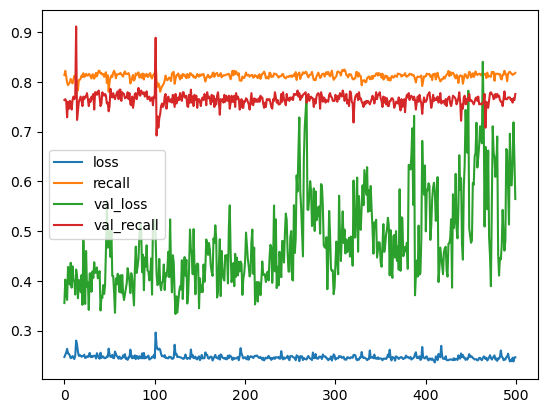

In [110]:
loss_df.plot()
plt.show()

In [111]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4005676507949829
accuracy:  0.792381763458252


In [112]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

349/349 [==============================] - 0s 678us/step
[[5326  248]
 [ 985 4589]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5574
           1       0.95      0.82      0.88      5574

    accuracy                           0.89     11148
   macro avg       0.90      0.89      0.89     11148
weighted avg       0.90      0.89      0.89     11148



In [113]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 717us/step
[[2252  137]
 [ 496 1893]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2389
           1       0.93      0.79      0.86      2389

    accuracy                           0.87      4778
   macro avg       0.88      0.87      0.87      4778
weighted avg       0.88      0.87      0.87      4778



In [114]:
roc_auc_score(y_test, y_pred)

0.8675177898702385

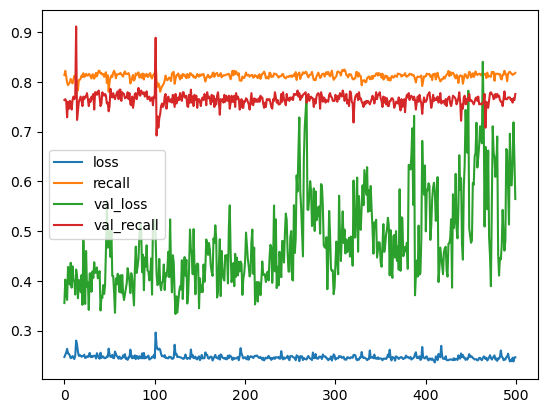

In [115]:
loss_df = pd.DataFrame(modelhistory)
loss_df.plot()
plt.show()

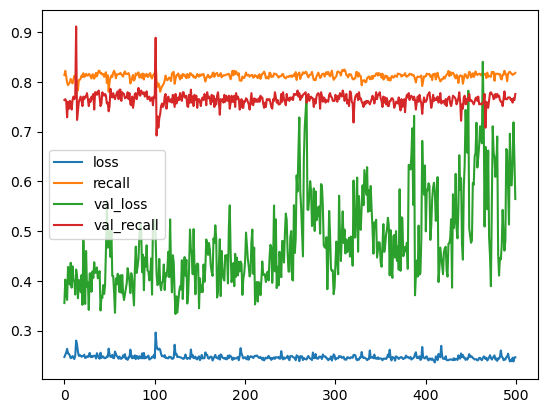

In [116]:
loss_df.plot()
plt.show()

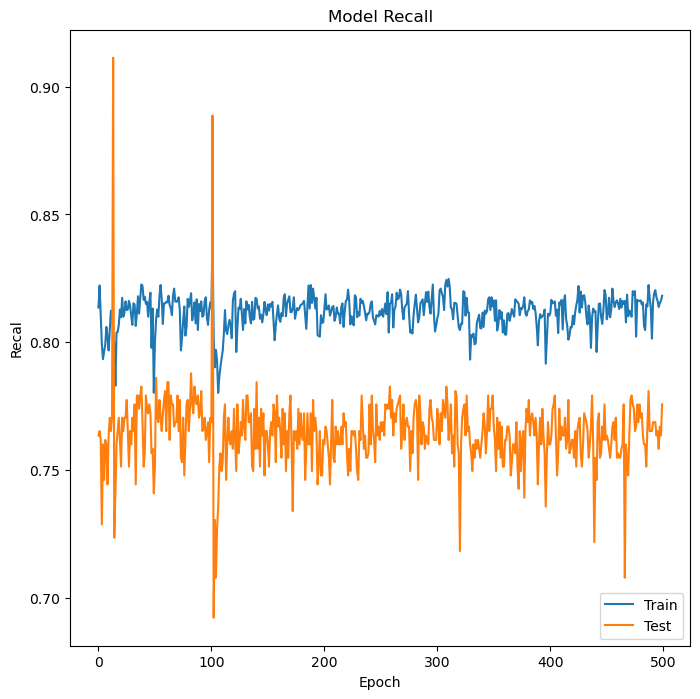

In [118]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelLr.history['recall'])
plt.plot(modelLr.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recal')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

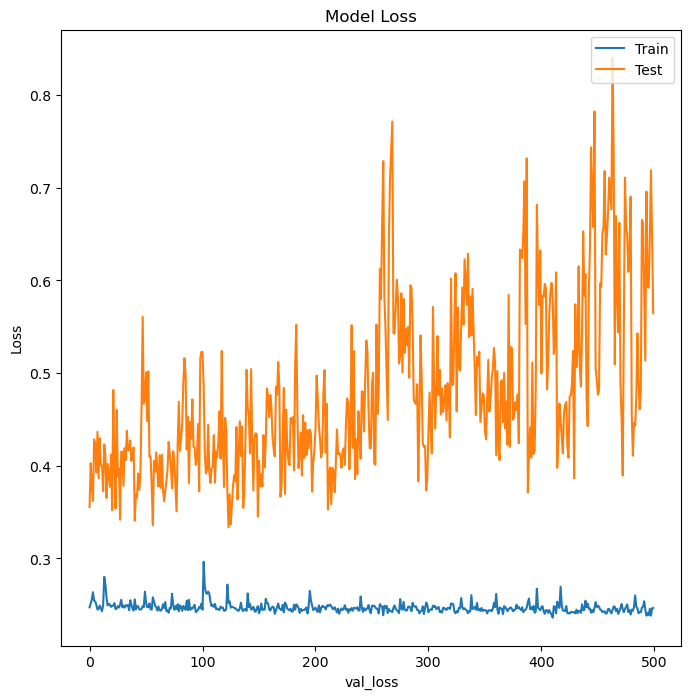

In [119]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelLr.history['loss'])
plt.plot(modelLr.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

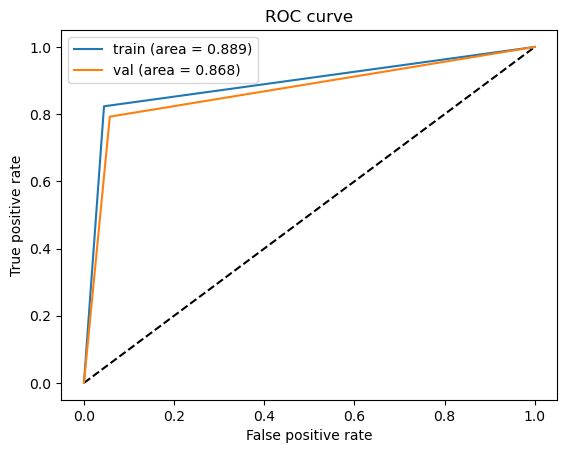

In [120]:
 roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Dropout Layer

In [121]:
from tensorflow.keras.layers import Dropout

In [122]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [123]:
modelDo=model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 50, epochs = 500, class_weight=class_weights)

Epoch 1/500
201/201 [==============================] - 1s 1ms/step - loss: 0.4074 - accuracy: 0.8145 - val_loss: 0.3394 - val_accuracy: 0.8448
Epoch 2/500
201/201 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8587 - val_loss: 0.3318 - val_accuracy: 0.8484
Epoch 3/500
201/201 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8618 - val_loss: 0.3277 - val_accuracy: 0.8413
Epoch 4/500
201/201 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8643 - val_loss: 0.3204 - val_accuracy: 0.8529
Epoch 5/500
201/201 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8684 - val_loss: 0.3198 - val_accuracy: 0.8538
Epoch 6/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8691 - val_loss: 0.3235 - val_accuracy: 0.8574
Epoch 7/500
201/201 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8688 - val_loss: 0.3221 - val_accuracy: 0.8511

Epoch 58/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.8748 - val_loss: 0.3247 - val_accuracy: 0.8628
Epoch 59/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8782 - val_loss: 0.3174 - val_accuracy: 0.8529
Epoch 60/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8752 - val_loss: 0.3205 - val_accuracy: 0.8538
Epoch 61/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.8754 - val_loss: 0.3185 - val_accuracy: 0.8457
Epoch 62/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.8742 - val_loss: 0.3171 - val_accuracy: 0.8538
Epoch 63/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8753 - val_loss: 0.3226 - val_accuracy: 0.8601
Epoch 64/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.8763 - val_loss: 0.3254 - val_accuracy:

Epoch 115/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8763 - val_loss: 0.3198 - val_accuracy: 0.8475
Epoch 116/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.8774 - val_loss: 0.3241 - val_accuracy: 0.8520
Epoch 117/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8790 - val_loss: 0.3162 - val_accuracy: 0.8511
Epoch 118/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8799 - val_loss: 0.3188 - val_accuracy: 0.8583
Epoch 119/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.8767 - val_loss: 0.3153 - val_accuracy: 0.8574
Epoch 120/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.8808 - val_loss: 0.3143 - val_accuracy: 0.8556
Epoch 121/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8790 - val_loss: 0.3170 - val_ac

201/201 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.8814 - val_loss: 0.3182 - val_accuracy: 0.8583
Epoch 172/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8758 - val_loss: 0.3225 - val_accuracy: 0.8556
Epoch 173/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8790 - val_loss: 0.3238 - val_accuracy: 0.8556
Epoch 174/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2780 - accuracy: 0.8814 - val_loss: 0.3163 - val_accuracy: 0.8547
Epoch 175/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8762 - val_loss: 0.3276 - val_accuracy: 0.8529
Epoch 176/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8781 - val_loss: 0.3368 - val_accuracy: 0.8466
Epoch 177/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8817 - val_loss: 0.3268 - val_accuracy: 0.8547

201/201 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.8755 - val_loss: 0.3172 - val_accuracy: 0.8538
Epoch 228/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8783 - val_loss: 0.3357 - val_accuracy: 0.8565
Epoch 229/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8773 - val_loss: 0.3168 - val_accuracy: 0.8547
Epoch 230/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8811 - val_loss: 0.3195 - val_accuracy: 0.8520
Epoch 231/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8811 - val_loss: 0.3163 - val_accuracy: 0.8574
Epoch 232/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8782 - val_loss: 0.3155 - val_accuracy: 0.8628
Epoch 233/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8763 - val_loss: 0.3320 - val_accuracy: 0.8538

201/201 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8783 - val_loss: 0.3114 - val_accuracy: 0.8547
Epoch 284/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.8779 - val_loss: 0.3240 - val_accuracy: 0.8601
Epoch 285/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8804 - val_loss: 0.3130 - val_accuracy: 0.8601
Epoch 286/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.8804 - val_loss: 0.3204 - val_accuracy: 0.8628
Epoch 287/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8790 - val_loss: 0.3217 - val_accuracy: 0.8538
Epoch 288/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8803 - val_loss: 0.3174 - val_accuracy: 0.8547
Epoch 289/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.8797 - val_loss: 0.3268 - val_accuracy: 0.8457

201/201 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.8813 - val_loss: 0.3205 - val_accuracy: 0.8646
Epoch 340/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8775 - val_loss: 0.3169 - val_accuracy: 0.8565
Epoch 341/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8770 - val_loss: 0.3146 - val_accuracy: 0.8547
Epoch 342/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8800 - val_loss: 0.3138 - val_accuracy: 0.8556
Epoch 343/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8785 - val_loss: 0.3315 - val_accuracy: 0.8529
Epoch 344/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8794 - val_loss: 0.3167 - val_accuracy: 0.8619
Epoch 345/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8809 - val_loss: 0.3120 - val_accuracy: 0.8592

201/201 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8802 - val_loss: 0.3181 - val_accuracy: 0.8511
Epoch 396/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8771 - val_loss: 0.3194 - val_accuracy: 0.8574
Epoch 397/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.8818 - val_loss: 0.3124 - val_accuracy: 0.8583
Epoch 398/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8812 - val_loss: 0.3149 - val_accuracy: 0.8529
Epoch 399/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.8815 - val_loss: 0.3194 - val_accuracy: 0.8574
Epoch 400/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.8785 - val_loss: 0.3176 - val_accuracy: 0.8556
Epoch 401/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.8800 - val_loss: 0.3164 - val_accuracy: 0.8601

201/201 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8826 - val_loss: 0.3176 - val_accuracy: 0.8538
Epoch 452/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8798 - val_loss: 0.3163 - val_accuracy: 0.8574
Epoch 453/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8806 - val_loss: 0.3097 - val_accuracy: 0.8547
Epoch 454/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8790 - val_loss: 0.3262 - val_accuracy: 0.8520
Epoch 455/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.8805 - val_loss: 0.3114 - val_accuracy: 0.8547
Epoch 456/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8811 - val_loss: 0.3182 - val_accuracy: 0.8556
Epoch 457/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.8788 - val_loss: 0.3227 - val_accuracy: 0.8484

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.407367  0.814512  0.339356      0.844843
1  0.329025  0.858666  0.331804      0.848431
2  0.312228  0.861756  0.327664      0.841256
3  0.310194  0.864348  0.320450      0.852915
4  0.303628  0.868434  0.319835      0.853812

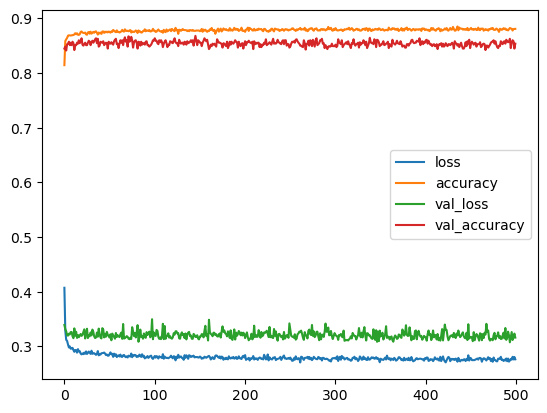

In [126]:
loss_df.plot()
plt.show()

In [127]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.2794274389743805
accuracy:  0.8717036247253418


In [128]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

349/349 [==============================] - 0s 582us/step
[[5278  296]
 [1006 4568]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5574
           1       0.94      0.82      0.88      5574

    accuracy                           0.88     11148
   macro avg       0.89      0.88      0.88     11148
weighted avg       0.89      0.88      0.88     11148



In [129]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 587us/step
[[2255  134]
 [ 479 1910]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2389
           1       0.93      0.80      0.86      2389

    accuracy                           0.87      4778
   macro avg       0.88      0.87      0.87      4778
weighted avg       0.88      0.87      0.87      4778



In [130]:
y_pred = model.predict(X_test)

150/150 [==============================] - 0s 586us/step


In [131]:
y_train_pred = model.predict(X_train)

349/349 [==============================] - 0s 576us/step


In [132]:
roc_auc_score(y_test, y_pred)

0.9469108185784539

In [133]:
modelANN.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

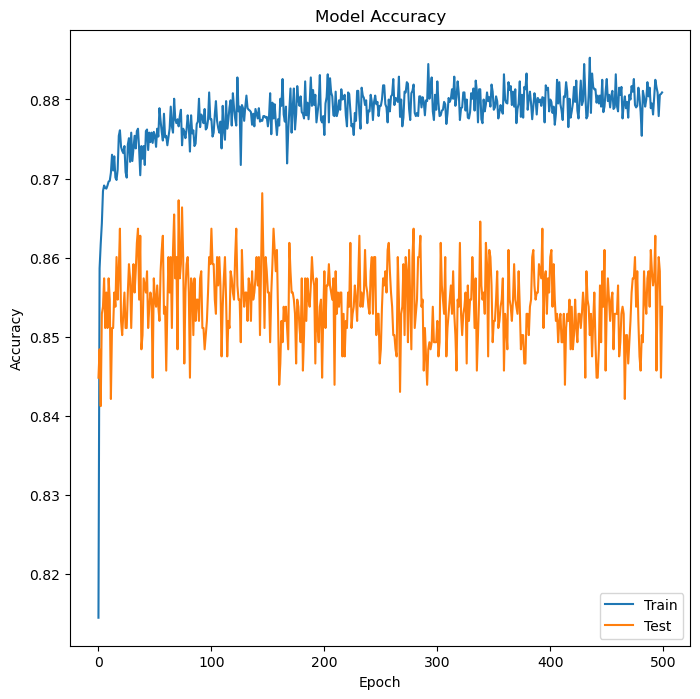

In [134]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelDo.history['accuracy'])
plt.plot(modelDo.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

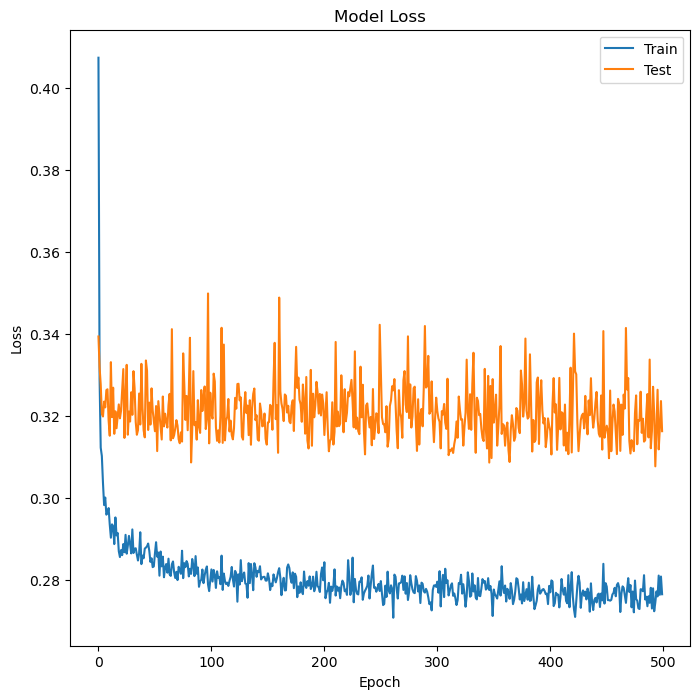

In [135]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelDo.history['loss'])
plt.plot(modelDo.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

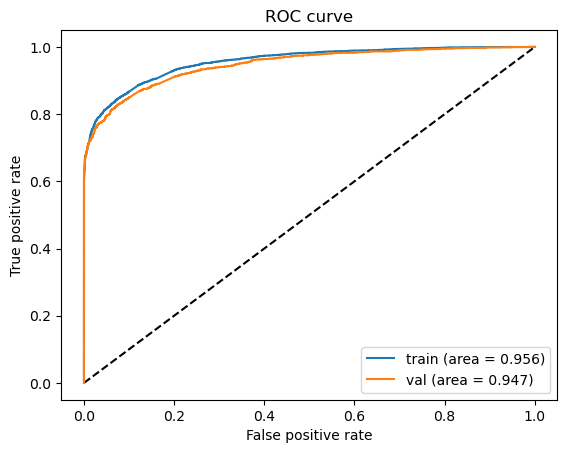

In [136]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [137]:
from tensorflow.keras.callbacks import EarlyStopping

In [138]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [139]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [140]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=50,
    epochs=500,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/500
201/201 [==============================] - 1s 1ms/step - loss: 0.4901 - accuracy: 0.7607 - val_loss: 0.3963 - val_accuracy: 0.8296
Epoch 2/500
201/201 [==============================] - 0s 948us/step - loss: 0.3432 - accuracy: 0.8438 - val_loss: 0.3595 - val_accuracy: 0.8466
Epoch 3/500
201/201 [==============================] - 0s 946us/step - loss: 0.3078 - accuracy: 0.8652 - val_loss: 0.3356 - val_accuracy: 0.8484
Epoch 4/500
201/201 [==============================] - 0s 932us/step - loss: 0.2908 - accuracy: 0.8738 - val_loss: 0.3297 - val_accuracy: 0.8565
Epoch 5/500
201/201 [==============================] - 0s 926us/step - loss: 0.2815 - accuracy: 0.8762 - val_loss: 0.3240 - val_accuracy: 0.8538
Epoch 6/500
201/201 [==============================] - 0s 920us/step - loss: 0.2765 - accuracy: 0.8784 - val_loss: 0.3231 - val_accuracy: 0.8547
Epoch 7/500
201/201 [==============================] - 0s 959us/step - loss: 0.2733 - accuracy: 0.8793 - val_loss: 0.3205 - val_accu

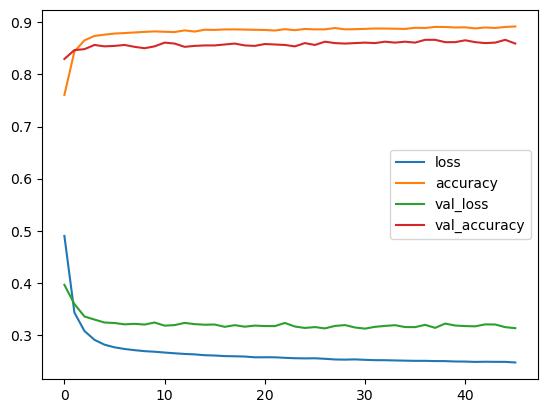

In [141]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [142]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.28202155232429504
accuracy:  0.8765173554420471


In [143]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 575us/step
[[2165  224]
 [ 366 2023]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2389
           1       0.90      0.85      0.87      2389

    accuracy                           0.88      4778
   macro avg       0.88      0.88      0.88      4778
weighted avg       0.88      0.88      0.88      4778



#### Monitor the "val_recall" as metric

In [144]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [145]:
modelVal=model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=50,
    epochs=500,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8897 - val_loss: 0.3200 - val_accuracy: 0.8574
Epoch 2/500
201/201 [==============================] - 0s 905us/step - loss: 0.2517 - accuracy: 0.8890 - val_loss: 0.3201 - val_accuracy: 0.8619
Epoch 3/500
201/201 [==============================] - 0s 937us/step - loss: 0.2508 - accuracy: 0.8902 - val_loss: 0.3147 - val_accuracy: 0.8628
Epoch 4/500
201/201 [==============================] - 0s 918us/step - loss: 0.2509 - accuracy: 0.8875 - val_loss: 0.3162 - val_accuracy: 0.8601
Epoch 5/500
201/201 [==============================] - 0s 919us/step - loss: 0.2509 - accuracy: 0.8907 - val_loss: 0.3132 - val_accuracy: 0.8583
Epoch 6/500
201/201 [==============================] - 0s 949us/step - loss: 0.2507 - accuracy: 0.8887 - val_loss: 0.3149 - val_accuracy: 0.8628
Epoch 7/500
201/201 [==============================] - 0s 930us/step - loss: 0.2502 - accuracy: 0.8883 - val_loss: 0.3135 - val_accu

201/201 [==============================] - 0s 929us/step - loss: 0.2473 - accuracy: 0.8917 - val_loss: 0.3190 - val_accuracy: 0.8637
Epoch 23/500
201/201 [==============================] - 0s 885us/step - loss: 0.2464 - accuracy: 0.8913 - val_loss: 0.3263 - val_accuracy: 0.8610
Epoch 24/500
201/201 [==============================] - 0s 884us/step - loss: 0.2460 - accuracy: 0.8917 - val_loss: 0.3185 - val_accuracy: 0.8664
Epoch 25/500
201/201 [==============================] - 0s 905us/step - loss: 0.2458 - accuracy: 0.8911 - val_loss: 0.3167 - val_accuracy: 0.8691
Epoch 26/500
201/201 [==============================] - 0s 915us/step - loss: 0.2463 - accuracy: 0.8921 - val_loss: 0.3166 - val_accuracy: 0.8601
Epoch 27/500
201/201 [==============================] - 0s 934us/step - loss: 0.2456 - accuracy: 0.8914 - val_loss: 0.3160 - val_accuracy: 0.8637
Epoch 28/500
201/201 [==============================] - 0s 959us/step - loss: 0.2444 - accuracy: 0.8938 - val_loss: 0.3198 - val_accuracy

201/201 [==============================] - 0s 1ms/step - loss: 0.2421 - accuracy: 0.8941 - val_loss: 0.3283 - val_accuracy: 0.8610
Epoch 45/500
201/201 [==============================] - 0s 944us/step - loss: 0.2422 - accuracy: 0.8928 - val_loss: 0.3216 - val_accuracy: 0.8673
Epoch 46/500
201/201 [==============================] - 0s 991us/step - loss: 0.2410 - accuracy: 0.8958 - val_loss: 0.3197 - val_accuracy: 0.8664
Epoch 47/500
201/201 [==============================] - 0s 934us/step - loss: 0.2416 - accuracy: 0.8937 - val_loss: 0.3210 - val_accuracy: 0.8637
Epoch 48/500
201/201 [==============================] - 0s 972us/step - loss: 0.2411 - accuracy: 0.8960 - val_loss: 0.3226 - val_accuracy: 0.8646
Epoch 49/500
201/201 [==============================] - 0s 888us/step - loss: 0.2412 - accuracy: 0.8948 - val_loss: 0.3253 - val_accuracy: 0.8646
Epoch 50/500
201/201 [==============================] - 0s 950us/step - loss: 0.2414 - accuracy: 0.8941 - val_loss: 0.3242 - val_accuracy: 

201/201 [==============================] - 0s 890us/step - loss: 0.2386 - accuracy: 0.8946 - val_loss: 0.3264 - val_accuracy: 0.8646
Epoch 66/500
201/201 [==============================] - 0s 961us/step - loss: 0.2380 - accuracy: 0.8966 - val_loss: 0.3328 - val_accuracy: 0.8610
Epoch 67/500
201/201 [==============================] - 0s 953us/step - loss: 0.2382 - accuracy: 0.8947 - val_loss: 0.3268 - val_accuracy: 0.8673
Epoch 68/500
201/201 [==============================] - 0s 923us/step - loss: 0.2381 - accuracy: 0.8939 - val_loss: 0.3256 - val_accuracy: 0.8646
Epoch 69/500
201/201 [==============================] - 0s 917us/step - loss: 0.2376 - accuracy: 0.8956 - val_loss: 0.3329 - val_accuracy: 0.8574
Epoch 70/500
201/201 [==============================] - 0s 896us/step - loss: 0.2373 - accuracy: 0.8957 - val_loss: 0.3259 - val_accuracy: 0.8583
Epoch 71/500
201/201 [==============================] - 0s 933us/step - loss: 0.2376 - accuracy: 0.8968 - val_loss: 0.3260 - val_accuracy

201/201 [==============================] - 0s 894us/step - loss: 0.2358 - accuracy: 0.8972 - val_loss: 0.3258 - val_accuracy: 0.8619
Epoch 88/500
201/201 [==============================] - 0s 927us/step - loss: 0.2352 - accuracy: 0.8958 - val_loss: 0.3295 - val_accuracy: 0.8583
Epoch 89/500
201/201 [==============================] - 0s 917us/step - loss: 0.2355 - accuracy: 0.8982 - val_loss: 0.3266 - val_accuracy: 0.8628
Epoch 90/500
201/201 [==============================] - 0s 924us/step - loss: 0.2356 - accuracy: 0.8980 - val_loss: 0.3317 - val_accuracy: 0.8691
Epoch 91/500
201/201 [==============================] - 0s 906us/step - loss: 0.2354 - accuracy: 0.8970 - val_loss: 0.3282 - val_accuracy: 0.8628
Epoch 92/500
201/201 [==============================] - 0s 885us/step - loss: 0.2357 - accuracy: 0.8979 - val_loss: 0.3304 - val_accuracy: 0.8655
Epoch 93/500
201/201 [==============================] - 0s 890us/step - loss: 0.2342 - accuracy: 0.8984 - val_loss: 0.3331 - val_accuracy

201/201 [==============================] - 0s 912us/step - loss: 0.2329 - accuracy: 0.8972 - val_loss: 0.3333 - val_accuracy: 0.8628
Epoch 109/500
201/201 [==============================] - 0s 893us/step - loss: 0.2340 - accuracy: 0.8981 - val_loss: 0.3336 - val_accuracy: 0.8637
Epoch 110/500
201/201 [==============================] - 0s 918us/step - loss: 0.2337 - accuracy: 0.8980 - val_loss: 0.3426 - val_accuracy: 0.8574
Epoch 111/500
201/201 [==============================] - 0s 898us/step - loss: 0.2341 - accuracy: 0.8979 - val_loss: 0.3293 - val_accuracy: 0.8601
Epoch 112/500
201/201 [==============================] - 0s 905us/step - loss: 0.2338 - accuracy: 0.8982 - val_loss: 0.3371 - val_accuracy: 0.8610
Epoch 113/500
201/201 [==============================] - 0s 924us/step - loss: 0.2327 - accuracy: 0.8984 - val_loss: 0.3359 - val_accuracy: 0.8610
Epoch 114/500
201/201 [==============================] - 0s 909us/step - loss: 0.2340 - accuracy: 0.8989 - val_loss: 0.3346 - val_ac

201/201 [==============================] - 0s 928us/step - loss: 0.2321 - accuracy: 0.8988 - val_loss: 0.3358 - val_accuracy: 0.8565
Epoch 131/500
201/201 [==============================] - 0s 909us/step - loss: 0.2312 - accuracy: 0.8978 - val_loss: 0.3353 - val_accuracy: 0.8601
Epoch 132/500
201/201 [==============================] - 0s 882us/step - loss: 0.2311 - accuracy: 0.8981 - val_loss: 0.3444 - val_accuracy: 0.8502
Epoch 133/500
201/201 [==============================] - 0s 917us/step - loss: 0.2311 - accuracy: 0.8975 - val_loss: 0.3363 - val_accuracy: 0.8610
Epoch 134/500
201/201 [==============================] - 0s 895us/step - loss: 0.2323 - accuracy: 0.8972 - val_loss: 0.3365 - val_accuracy: 0.8583
Epoch 135/500
201/201 [==============================] - 0s 913us/step - loss: 0.2321 - accuracy: 0.8981 - val_loss: 0.3344 - val_accuracy: 0.8583
Epoch 136/500
201/201 [==============================] - 0s 930us/step - loss: 0.2311 - accuracy: 0.8980 - val_loss: 0.3333 - val_ac

201/201 [==============================] - 0s 890us/step - loss: 0.2306 - accuracy: 0.8989 - val_loss: 0.3367 - val_accuracy: 0.8601
Epoch 152/500
201/201 [==============================] - 0s 902us/step - loss: 0.2306 - accuracy: 0.8985 - val_loss: 0.3394 - val_accuracy: 0.8511
Epoch 153/500
201/201 [==============================] - 0s 923us/step - loss: 0.2298 - accuracy: 0.8999 - val_loss: 0.3424 - val_accuracy: 0.8592
Epoch 154/500
201/201 [==============================] - 0s 876us/step - loss: 0.2302 - accuracy: 0.8987 - val_loss: 0.3426 - val_accuracy: 0.8592
Epoch 155/500
201/201 [==============================] - 0s 903us/step - loss: 0.2297 - accuracy: 0.8987 - val_loss: 0.3359 - val_accuracy: 0.8547
Epoch 156/500
201/201 [==============================] - 0s 970us/step - loss: 0.2295 - accuracy: 0.9006 - val_loss: 0.3389 - val_accuracy: 0.8628
Epoch 157/500
201/201 [==============================] - 0s 910us/step - loss: 0.2302 - accuracy: 0.8990 - val_loss: 0.3362 - val_ac

201/201 [==============================] - 0s 909us/step - loss: 0.2288 - accuracy: 0.8992 - val_loss: 0.3419 - val_accuracy: 0.8583
Epoch 174/500
201/201 [==============================] - 0s 917us/step - loss: 0.2281 - accuracy: 0.8989 - val_loss: 0.3438 - val_accuracy: 0.8565
Epoch 175/500
201/201 [==============================] - 0s 908us/step - loss: 0.2285 - accuracy: 0.8996 - val_loss: 0.3400 - val_accuracy: 0.8547
Epoch 176/500
201/201 [==============================] - 0s 885us/step - loss: 0.2286 - accuracy: 0.9001 - val_loss: 0.3461 - val_accuracy: 0.8592
Epoch 177/500
201/201 [==============================] - 0s 895us/step - loss: 0.2287 - accuracy: 0.9007 - val_loss: 0.3435 - val_accuracy: 0.8574
Epoch 178/500
201/201 [==============================] - 0s 915us/step - loss: 0.2292 - accuracy: 0.8976 - val_loss: 0.3470 - val_accuracy: 0.8556
Epoch 179/500
201/201 [==============================] - 0s 913us/step - loss: 0.2288 - accuracy: 0.8996 - val_loss: 0.3415 - val_ac

201/201 [==============================] - 0s 943us/step - loss: 0.2277 - accuracy: 0.9002 - val_loss: 0.3450 - val_accuracy: 0.8619
Epoch 195/500
201/201 [==============================] - 0s 908us/step - loss: 0.2280 - accuracy: 0.9003 - val_loss: 0.3418 - val_accuracy: 0.8529
Epoch 196/500
201/201 [==============================] - 0s 867us/step - loss: 0.2278 - accuracy: 0.8989 - val_loss: 0.3433 - val_accuracy: 0.8565
Epoch 197/500
201/201 [==============================] - 0s 885us/step - loss: 0.2279 - accuracy: 0.8981 - val_loss: 0.3449 - val_accuracy: 0.8565
Epoch 198/500
201/201 [==============================] - 0s 907us/step - loss: 0.2275 - accuracy: 0.9002 - val_loss: 0.3504 - val_accuracy: 0.8574
Epoch 199/500
201/201 [==============================] - 0s 911us/step - loss: 0.2278 - accuracy: 0.8989 - val_loss: 0.3452 - val_accuracy: 0.8574
Epoch 200/500
201/201 [==============================] - 0s 896us/step - loss: 0.2279 - accuracy: 0.8994 - val_loss: 0.3441 - val_ac

201/201 [==============================] - 0s 929us/step - loss: 0.2270 - accuracy: 0.8997 - val_loss: 0.3408 - val_accuracy: 0.8601
Epoch 217/500
201/201 [==============================] - 0s 884us/step - loss: 0.2267 - accuracy: 0.9000 - val_loss: 0.3407 - val_accuracy: 0.8556
Epoch 218/500
201/201 [==============================] - 0s 893us/step - loss: 0.2272 - accuracy: 0.8991 - val_loss: 0.3447 - val_accuracy: 0.8529
Epoch 219/500
201/201 [==============================] - 0s 879us/step - loss: 0.2272 - accuracy: 0.9014 - val_loss: 0.3459 - val_accuracy: 0.8565
Epoch 220/500
201/201 [==============================] - 0s 894us/step - loss: 0.2267 - accuracy: 0.9008 - val_loss: 0.3467 - val_accuracy: 0.8484
Epoch 221/500
201/201 [==============================] - 0s 892us/step - loss: 0.2260 - accuracy: 0.9001 - val_loss: 0.3432 - val_accuracy: 0.8601
Epoch 222/500
201/201 [==============================] - 0s 928us/step - loss: 0.2270 - accuracy: 0.9007 - val_loss: 0.3476 - val_ac

201/201 [==============================] - 0s 896us/step - loss: 0.2260 - accuracy: 0.9009 - val_loss: 0.3413 - val_accuracy: 0.8601
Epoch 238/500
201/201 [==============================] - 0s 933us/step - loss: 0.2255 - accuracy: 0.9019 - val_loss: 0.3471 - val_accuracy: 0.8592
Epoch 239/500
201/201 [==============================] - 0s 893us/step - loss: 0.2264 - accuracy: 0.8982 - val_loss: 0.3464 - val_accuracy: 0.8511
Epoch 240/500
201/201 [==============================] - 0s 899us/step - loss: 0.2256 - accuracy: 0.9007 - val_loss: 0.3453 - val_accuracy: 0.8547
Epoch 241/500
201/201 [==============================] - 0s 925us/step - loss: 0.2251 - accuracy: 0.9000 - val_loss: 0.3473 - val_accuracy: 0.8547
Epoch 242/500
201/201 [==============================] - 0s 911us/step - loss: 0.2257 - accuracy: 0.8998 - val_loss: 0.3431 - val_accuracy: 0.8556
Epoch 243/500
201/201 [==============================] - 0s 889us/step - loss: 0.2256 - accuracy: 0.9009 - val_loss: 0.3442 - val_ac

201/201 [==============================] - 0s 900us/step - loss: 0.2245 - accuracy: 0.9022 - val_loss: 0.3484 - val_accuracy: 0.8565
Epoch 260/500
201/201 [==============================] - 0s 915us/step - loss: 0.2241 - accuracy: 0.9019 - val_loss: 0.3480 - val_accuracy: 0.8493
Epoch 261/500
201/201 [==============================] - 0s 875us/step - loss: 0.2243 - accuracy: 0.9029 - val_loss: 0.3490 - val_accuracy: 0.8610
Epoch 262/500
201/201 [==============================] - 0s 893us/step - loss: 0.2245 - accuracy: 0.9027 - val_loss: 0.3529 - val_accuracy: 0.8547
Epoch 263/500
201/201 [==============================] - 0s 910us/step - loss: 0.2236 - accuracy: 0.9024 - val_loss: 0.3479 - val_accuracy: 0.8529
Epoch 264/500
201/201 [==============================] - 0s 894us/step - loss: 0.2253 - accuracy: 0.9019 - val_loss: 0.3455 - val_accuracy: 0.8574
Epoch 265/500
201/201 [==============================] - 0s 900us/step - loss: 0.2238 - accuracy: 0.9023 - val_loss: 0.3420 - val_ac

201/201 [==============================] - 0s 951us/step - loss: 0.2227 - accuracy: 0.9009 - val_loss: 0.3477 - val_accuracy: 0.8583
Epoch 281/500
201/201 [==============================] - 0s 892us/step - loss: 0.2225 - accuracy: 0.9020 - val_loss: 0.3501 - val_accuracy: 0.8592
Epoch 282/500
201/201 [==============================] - 0s 903us/step - loss: 0.2230 - accuracy: 0.9036 - val_loss: 0.3485 - val_accuracy: 0.8547
Epoch 283/500
201/201 [==============================] - 0s 891us/step - loss: 0.2230 - accuracy: 0.9029 - val_loss: 0.3462 - val_accuracy: 0.8547
Epoch 284/500
201/201 [==============================] - 0s 890us/step - loss: 0.2230 - accuracy: 0.9008 - val_loss: 0.3513 - val_accuracy: 0.8565
Epoch 285/500
201/201 [==============================] - 0s 891us/step - loss: 0.2238 - accuracy: 0.9003 - val_loss: 0.3500 - val_accuracy: 0.8511
Epoch 286/500
201/201 [==============================] - 0s 889us/step - loss: 0.2225 - accuracy: 0.9028 - val_loss: 0.3488 - val_ac

201/201 [==============================] - 0s 936us/step - loss: 0.2223 - accuracy: 0.9036 - val_loss: 0.3500 - val_accuracy: 0.8583
Epoch 303/500
201/201 [==============================] - 0s 930us/step - loss: 0.2217 - accuracy: 0.9031 - val_loss: 0.3535 - val_accuracy: 0.8556
Epoch 304/500
201/201 [==============================] - 0s 909us/step - loss: 0.2218 - accuracy: 0.9022 - val_loss: 0.3479 - val_accuracy: 0.8574
Epoch 305/500
201/201 [==============================] - 0s 895us/step - loss: 0.2227 - accuracy: 0.9033 - val_loss: 0.3494 - val_accuracy: 0.8619
Epoch 306/500
201/201 [==============================] - 0s 889us/step - loss: 0.2214 - accuracy: 0.9038 - val_loss: 0.3540 - val_accuracy: 0.8619
Epoch 307/500
201/201 [==============================] - 0s 915us/step - loss: 0.2219 - accuracy: 0.9029 - val_loss: 0.3566 - val_accuracy: 0.8529
Epoch 308/500
201/201 [==============================] - 0s 927us/step - loss: 0.2227 - accuracy: 0.9015 - val_loss: 0.3550 - val_ac

201/201 [==============================] - 0s 893us/step - loss: 0.2210 - accuracy: 0.9031 - val_loss: 0.3508 - val_accuracy: 0.8601
Epoch 324/500
201/201 [==============================] - 0s 931us/step - loss: 0.2210 - accuracy: 0.9024 - val_loss: 0.3499 - val_accuracy: 0.8529
Epoch 325/500
201/201 [==============================] - 0s 935us/step - loss: 0.2205 - accuracy: 0.9035 - val_loss: 0.3551 - val_accuracy: 0.8556
Epoch 326/500
201/201 [==============================] - 0s 903us/step - loss: 0.2198 - accuracy: 0.9056 - val_loss: 0.3527 - val_accuracy: 0.8601
Epoch 327/500
201/201 [==============================] - 0s 907us/step - loss: 0.2203 - accuracy: 0.9040 - val_loss: 0.3522 - val_accuracy: 0.8619
Epoch 328/500
201/201 [==============================] - 0s 932us/step - loss: 0.2199 - accuracy: 0.9052 - val_loss: 0.3512 - val_accuracy: 0.8628
Epoch 329/500
201/201 [==============================] - 0s 902us/step - loss: 0.2195 - accuracy: 0.9030 - val_loss: 0.3543 - val_ac

201/201 [==============================] - 0s 900us/step - loss: 0.2194 - accuracy: 0.9046 - val_loss: 0.3570 - val_accuracy: 0.8529
Epoch 346/500
201/201 [==============================] - 0s 900us/step - loss: 0.2202 - accuracy: 0.9028 - val_loss: 0.3534 - val_accuracy: 0.8583
Epoch 347/500
201/201 [==============================] - 0s 925us/step - loss: 0.2196 - accuracy: 0.9035 - val_loss: 0.3542 - val_accuracy: 0.8547
Epoch 348/500
201/201 [==============================] - 0s 910us/step - loss: 0.2197 - accuracy: 0.9042 - val_loss: 0.3620 - val_accuracy: 0.8619
Epoch 349/500
201/201 [==============================] - 0s 911us/step - loss: 0.2198 - accuracy: 0.9047 - val_loss: 0.3539 - val_accuracy: 0.8565
Epoch 350/500
201/201 [==============================] - 0s 892us/step - loss: 0.2196 - accuracy: 0.9032 - val_loss: 0.3578 - val_accuracy: 0.8565
Epoch 351/500
201/201 [==============================] - 0s 927us/step - loss: 0.2194 - accuracy: 0.9034 - val_loss: 0.3549 - val_ac

201/201 [==============================] - 0s 921us/step - loss: 0.2197 - accuracy: 0.9051 - val_loss: 0.3583 - val_accuracy: 0.8520
Epoch 367/500
201/201 [==============================] - 0s 917us/step - loss: 0.2185 - accuracy: 0.9047 - val_loss: 0.3570 - val_accuracy: 0.8610
Epoch 368/500
201/201 [==============================] - 0s 889us/step - loss: 0.2195 - accuracy: 0.9023 - val_loss: 0.3512 - val_accuracy: 0.8529
Epoch 369/500
201/201 [==============================] - 0s 919us/step - loss: 0.2202 - accuracy: 0.9040 - val_loss: 0.3586 - val_accuracy: 0.8628
Epoch 370/500
201/201 [==============================] - 0s 909us/step - loss: 0.2187 - accuracy: 0.9043 - val_loss: 0.3577 - val_accuracy: 0.8547
Epoch 371/500
201/201 [==============================] - 0s 920us/step - loss: 0.2190 - accuracy: 0.9048 - val_loss: 0.3552 - val_accuracy: 0.8538
Epoch 372/500
201/201 [==============================] - 0s 905us/step - loss: 0.2180 - accuracy: 0.9048 - val_loss: 0.3561 - val_ac

201/201 [==============================] - 0s 945us/step - loss: 0.2175 - accuracy: 0.9057 - val_loss: 0.3544 - val_accuracy: 0.8538
Epoch 389/500
201/201 [==============================] - 0s 889us/step - loss: 0.2186 - accuracy: 0.9081 - val_loss: 0.3549 - val_accuracy: 0.8601
Epoch 390/500
201/201 [==============================] - 0s 892us/step - loss: 0.2194 - accuracy: 0.9045 - val_loss: 0.3529 - val_accuracy: 0.8583
Epoch 391/500
201/201 [==============================] - 0s 927us/step - loss: 0.2189 - accuracy: 0.9057 - val_loss: 0.3584 - val_accuracy: 0.8637
Epoch 392/500
201/201 [==============================] - 0s 887us/step - loss: 0.2180 - accuracy: 0.9052 - val_loss: 0.3524 - val_accuracy: 0.8583
Epoch 393/500
201/201 [==============================] - 0s 885us/step - loss: 0.2179 - accuracy: 0.9039 - val_loss: 0.3542 - val_accuracy: 0.8583
Epoch 394/500
201/201 [==============================] - 0s 884us/step - loss: 0.2182 - accuracy: 0.9050 - val_loss: 0.3532 - val_ac

201/201 [==============================] - 0s 1ms/step - loss: 0.2180 - accuracy: 0.9050 - val_loss: 0.3555 - val_accuracy: 0.8655
Epoch 410/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9083 - val_loss: 0.3568 - val_accuracy: 0.8619
Epoch 411/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.9063 - val_loss: 0.3571 - val_accuracy: 0.8583
Epoch 412/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2171 - accuracy: 0.9047 - val_loss: 0.3614 - val_accuracy: 0.8583
Epoch 413/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9089 - val_loss: 0.3517 - val_accuracy: 0.8574
Epoch 414/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9072 - val_loss: 0.3599 - val_accuracy: 0.8610
Epoch 415/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9058 - val_loss: 0.3538 - val_accuracy: 0.8628

201/201 [==============================] - 0s 989us/step - loss: 0.2179 - accuracy: 0.9060 - val_loss: 0.3585 - val_accuracy: 0.8628
Epoch 432/500
201/201 [==============================] - 0s 993us/step - loss: 0.2166 - accuracy: 0.9064 - val_loss: 0.3580 - val_accuracy: 0.8601
Epoch 433/500
201/201 [==============================] - 0s 959us/step - loss: 0.2165 - accuracy: 0.9070 - val_loss: 0.3635 - val_accuracy: 0.8637
Epoch 434/500
201/201 [==============================] - 0s 968us/step - loss: 0.2172 - accuracy: 0.9043 - val_loss: 0.3664 - val_accuracy: 0.8619
Epoch 435/500
201/201 [==============================] - 0s 953us/step - loss: 0.2180 - accuracy: 0.9049 - val_loss: 0.3580 - val_accuracy: 0.8601
Epoch 436/500
201/201 [==============================] - 0s 960us/step - loss: 0.2165 - accuracy: 0.9062 - val_loss: 0.3565 - val_accuracy: 0.8601
Epoch 437/500
201/201 [==============================] - 0s 946us/step - loss: 0.2170 - accuracy: 0.9040 - val_loss: 0.3590 - val_ac

201/201 [==============================] - 0s 970us/step - loss: 0.2170 - accuracy: 0.9059 - val_loss: 0.3596 - val_accuracy: 0.8664
Epoch 453/500
201/201 [==============================] - 0s 996us/step - loss: 0.2166 - accuracy: 0.9059 - val_loss: 0.3606 - val_accuracy: 0.8610
Epoch 454/500
201/201 [==============================] - 0s 975us/step - loss: 0.2167 - accuracy: 0.9059 - val_loss: 0.3635 - val_accuracy: 0.8610
Epoch 455/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2179 - accuracy: 0.9055 - val_loss: 0.3589 - val_accuracy: 0.8610
Epoch 456/500
201/201 [==============================] - 0s 980us/step - loss: 0.2157 - accuracy: 0.9052 - val_loss: 0.3569 - val_accuracy: 0.8637
Epoch 457/500
201/201 [==============================] - 0s 991us/step - loss: 0.2164 - accuracy: 0.9069 - val_loss: 0.3602 - val_accuracy: 0.8583
Epoch 458/500
201/201 [==============================] - 0s 964us/step - loss: 0.2168 - accuracy: 0.9057 - val_loss: 0.3556 - val_accu

201/201 [==============================] - 0s 998us/step - loss: 0.2161 - accuracy: 0.9061 - val_loss: 0.3575 - val_accuracy: 0.8637
Epoch 475/500
201/201 [==============================] - 0s 949us/step - loss: 0.2153 - accuracy: 0.9095 - val_loss: 0.3569 - val_accuracy: 0.8610
Epoch 476/500
201/201 [==============================] - 0s 964us/step - loss: 0.2160 - accuracy: 0.9096 - val_loss: 0.3618 - val_accuracy: 0.8610
Epoch 477/500
201/201 [==============================] - 0s 945us/step - loss: 0.2157 - accuracy: 0.9082 - val_loss: 0.3596 - val_accuracy: 0.8673
Epoch 478/500
201/201 [==============================] - 0s 960us/step - loss: 0.2161 - accuracy: 0.9059 - val_loss: 0.3615 - val_accuracy: 0.8646
Epoch 479/500
201/201 [==============================] - 0s 948us/step - loss: 0.2154 - accuracy: 0.9061 - val_loss: 0.3649 - val_accuracy: 0.8619
Epoch 480/500
201/201 [==============================] - 0s 972us/step - loss: 0.2144 - accuracy: 0.9082 - val_loss: 0.3578 - val_ac

201/201 [==============================] - 0s 930us/step - loss: 0.2154 - accuracy: 0.9072 - val_loss: 0.3634 - val_accuracy: 0.8628
Epoch 496/500
201/201 [==============================] - 0s 979us/step - loss: 0.2162 - accuracy: 0.9055 - val_loss: 0.3656 - val_accuracy: 0.8637
Epoch 497/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2166 - accuracy: 0.9068 - val_loss: 0.3669 - val_accuracy: 0.8619
Epoch 498/500
201/201 [==============================] - 0s 971us/step - loss: 0.2156 - accuracy: 0.9075 - val_loss: 0.3622 - val_accuracy: 0.8610
Epoch 499/500
201/201 [==============================] - 0s 975us/step - loss: 0.2155 - accuracy: 0.9083 - val_loss: 0.3627 - val_accuracy: 0.8637
Epoch 500/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.9087 - val_loss: 0.3587 - val_accuracy: 0.8619


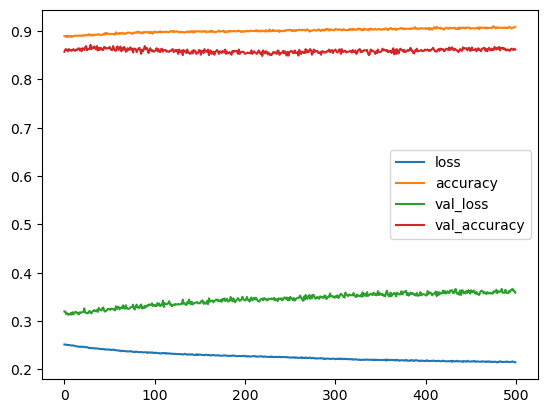

In [147]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [148]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3186616003513336
accuracy:  0.8618668913841248


In [152]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

349/349 [==============================] - 0s 588us/step
[[5193  381]
 [ 667 4907]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5574
           1       0.93      0.88      0.90      5574

    accuracy                           0.91     11148
   macro avg       0.91      0.91      0.91     11148
weighted avg       0.91      0.91      0.91     11148



In [150]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 576us/step
[[2123  266]
 [ 394 1995]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2389
           1       0.88      0.84      0.86      2389

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



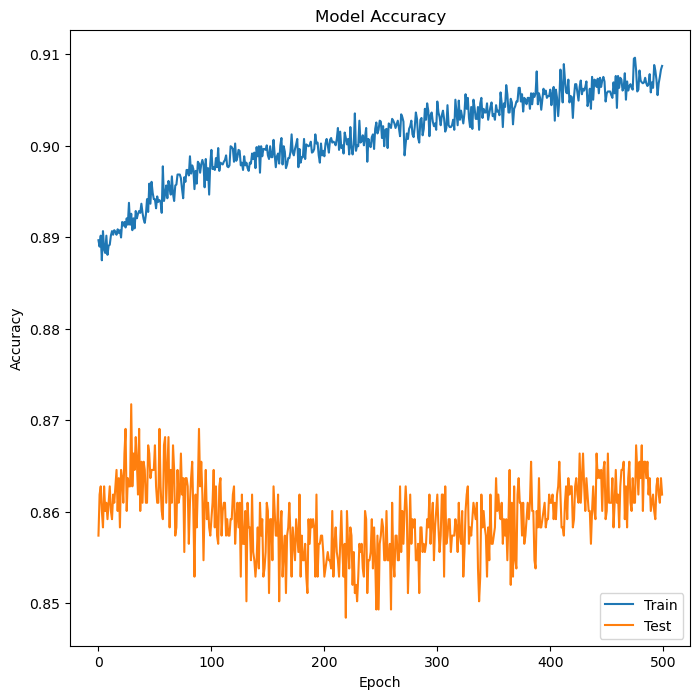

In [154]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelVal.history['accuracy'])
plt.plot(modelVal.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

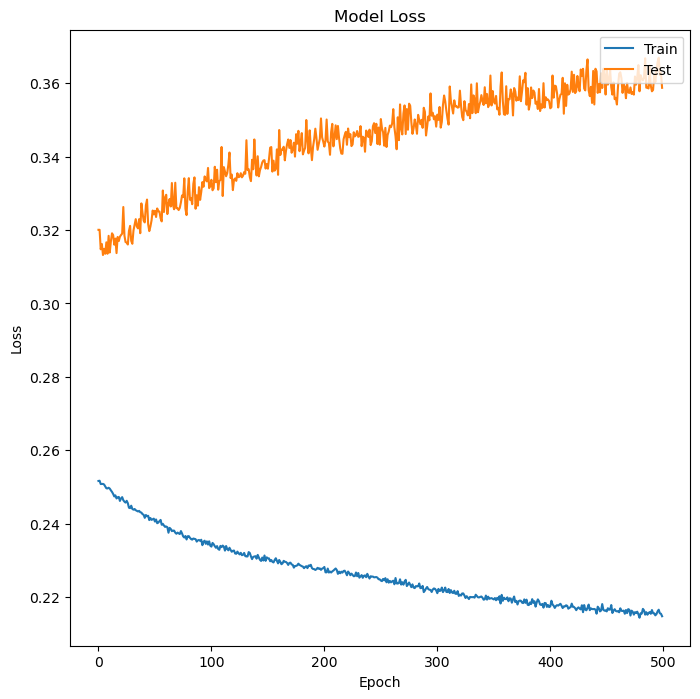

In [155]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelVal.history['loss'])
plt.plot(modelVal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [158]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

349/349 [==============================] - 0s 574us/step


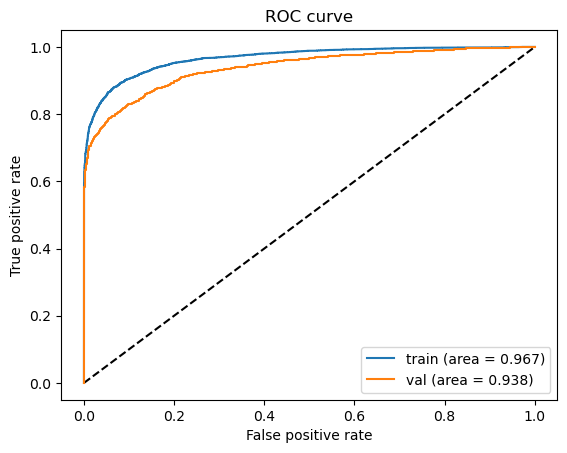

In [159]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Optuna

In [164]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [165]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [166]:
trial_metric = "accuracy"
batch_size = 50


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [167]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-29 18:29:52,326] A new study created in memory with name: no-name-caa1bc25-ee3a-44dc-b2cf-fa4b129e5bab
C:\Users\sh-oo\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\sh-oo\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\sh-oo\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type 

Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-29 18:29:59,375] Trial 0 finished with value: 0.7111762166023254 and parameters: {'n_units1': 10, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0007530761192983889, 'w0': 0.034268491565704315, 'w1': 0.5015175205082374}. Best is trial 0 with value: 0.7111762166023254.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-29 18:30:06,747] Trial 1 finished with value: 0.8771452307701111 and parameters: {'n_units1': 93, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.06193335678238867, 'w0': 0.058181621605078365, 'w1': 0.10170005716836182}. Best is trial 1 with value: 0.8771452307701111.


Restoring model weights from the end of the best epoch: 43.
Epoch 58: early stopping


[I 2023-10-29 18:30:20,929] Trial 2 finished with value: 0.8342402577400208 and parameters: {'n_units1': 60, 'n_units2': 32, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 9.601082771777148e-05, 'w0': 0.35583522822127284, 'w1': 1.2488104791956127}. Best is trial 1 with value: 0.8771452307701111.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 18:30:25,287] Trial 3 finished with value: 0.5263708829879761 and parameters: {'n_units1': 20, 'n_units2': 52, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00013596081923553034, 'w0': 0.05972419740576574, 'w1': 1.0918756081637406}. Best is trial 1 with value: 0.8771452307701111.


Restoring model weights from the end of the best epoch: 43.
Epoch 58: early stopping


[I 2023-10-29 18:30:40,537] Trial 4 finished with value: 0.8087065815925598 and parameters: {'n_units1': 8, 'n_units2': 28, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0003320441327702121, 'w0': 0.06581691562707004, 'w1': 0.33326477100689184}. Best is trial 1 with value: 0.8771452307701111.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-29 18:30:46,432] Trial 5 finished with value: 0.5129761695861816 and parameters: {'n_units1': 26, 'n_units2': 122, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.003435753050369236, 'w0': 0.14246351337216576, 'w1': 0.04847256724586798}. Best is trial 1 with value: 0.8771452307701111.


Restoring model weights from the end of the best epoch: 26.
Epoch 41: early stopping


[I 2023-10-29 18:30:56,926] Trial 6 finished with value: 0.8030556440353394 and parameters: {'n_units1': 50, 'n_units2': 49, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0014456389815535066, 'w0': 0.8903380472683188, 'w1': 0.014269752967396148}. Best is trial 1 with value: 0.8771452307701111.
[I 2023-10-29 18:31:22,517] Trial 7 finished with value: 0.6146923303604126 and parameters: {'n_units1': 65, 'n_units2': 80, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0010080954047817392, 'w0': 0.05902597802360214, 'w1': 0.1352621245163288}. Best is trial 1 with value: 0.8771452307701111.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-29 18:31:31,204] Trial 8 finished with value: 0.5 and parameters: {'n_units1': 9, 'n_units2': 124, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0016441496102473957, 'w0': 0.013329112141535534, 'w1': 4.840254378954705}. Best is trial 1 with value: 0.8771452307701111.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-29 18:31:41,411] Trial 9 finished with value: 0.8735872507095337 and parameters: {'n_units1': 17, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.024366892344584154, 'w0': 1.0262784944623504, 'w1': 1.3423350430913832}. Best is trial 1 with value: 0.8771452307701111.


{'n_units1': 93,
 'n_units2': 104,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.06193335678238867,
 'w0': 0.058181621605078365,
 'w1': 0.10170005716836182}

In [178]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
modelOp=model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=50,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
201/201 [==============================] - 1s 1ms/step - loss: 0.3735 - recall: 0.7455 - val_loss: 0.3840 - val_recall: 0.8922
Epoch 2/500
201/201 [==============================] - 0s 991us/step - loss: 0.3157 - recall: 0.7798 - val_loss: 0.3651 - val_recall: 0.6504
Epoch 3/500
201/201 [==============================] - 0s 1ms/step - loss: 0.3138 - recall: 0.7752 - val_loss: 0.3526 - val_recall: 0.6783
Epoch 4/500
201/201 [==============================] - 0s 991us/step - loss: 0.3029 - recall: 0.7960 - val_loss: 0.3463 - val_recall: 0.7357
Epoch 5/500
201/201 [==============================] - 0s 999us/step - loss: 0.3035 - recall: 0.8132 - val_loss: 0.3323 - val_recall: 0.7252
Epoch 6/500
201/201 [==============================] - 0s 1ms/step - loss: 0.3044 - recall: 0.8332 - val_loss: 0.3803 - val_recall: 0.8470
Epoch 7/500
201/201 [==============================] - 0s 1ms/step - loss: 0.2976 - recall: 0.8250 - val_loss: 0.3269 - val_recall: 0.7374
Epoch 8/500
201/201 [

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [179]:
modelhistory=model.history.history

In [180]:
loss,acc = model.evaluate(X_test,y_test)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

150/150 [==============================] - 0s 682us/step - loss: 0.2907 - recall: 0.8903
Test Accuarcy: 0.8903306722640991
Tets Loss: 0.2907450795173645


In [181]:
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.373476  0.745549  0.384009    0.892174
1  0.315697  0.779756  0.365127    0.650435
2  0.313765  0.775155  0.352566    0.678261
3  0.302862  0.795959  0.346278    0.735652
4  0.303463  0.813163  0.332341    0.725217

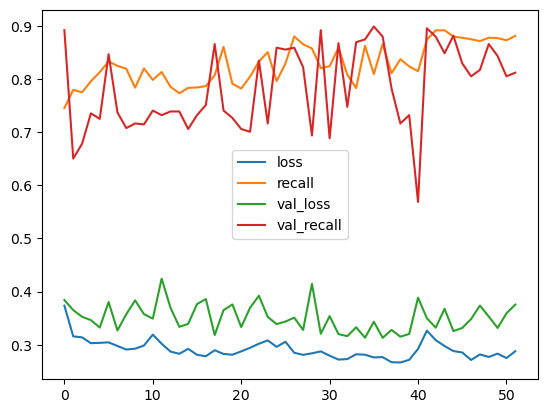

In [182]:
loss_df.plot()
plt.show()

In [183]:
y_pred = model.predict(X_test)

150/150 [==============================] - 0s 584us/step


In [188]:
y_train_pred = model.predict(X_train)

349/349 [==============================] - 0s 595us/step


In [189]:
roc_auc_score(y_test, y_pred)

0.9451013881994723

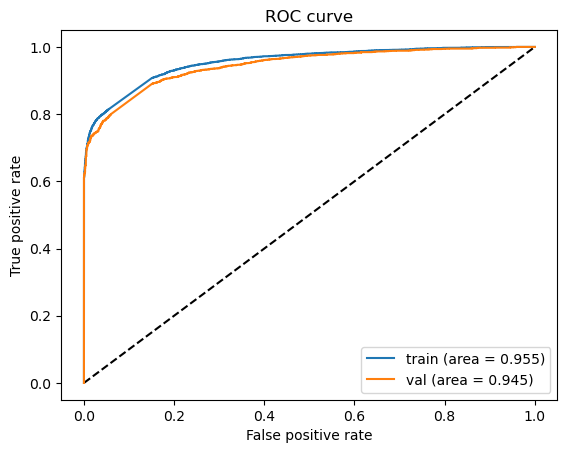

In [191]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

In [192]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

349/349 [==============================] - 0s 586us/step
[[4734  840]
 [ 517 5057]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      5574
           1       0.86      0.91      0.88      5574

    accuracy                           0.88     11148
   macro avg       0.88      0.88      0.88     11148
weighted avg       0.88      0.88      0.88     11148



In [193]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 673us/step
[[2029  360]
 [ 262 2127]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2389
           1       0.86      0.89      0.87      2389

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



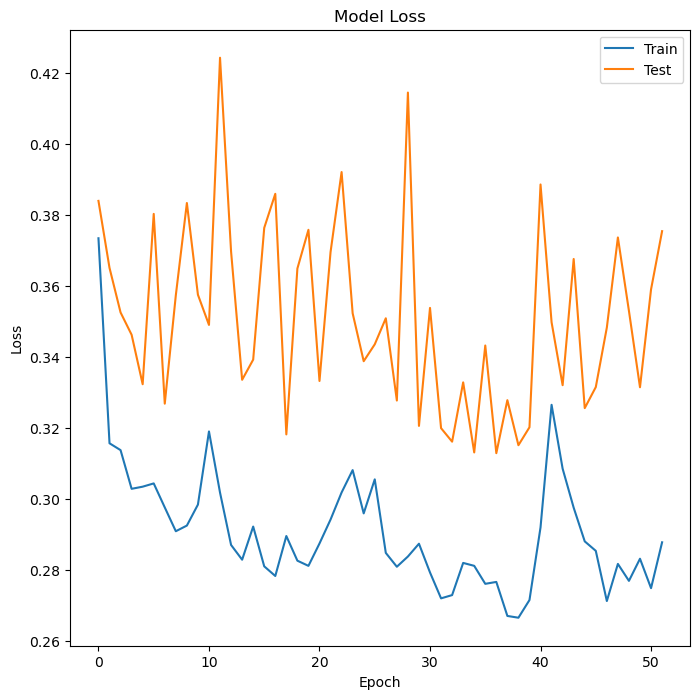

In [194]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelOp.history['loss'])
plt.plot(modelOp.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

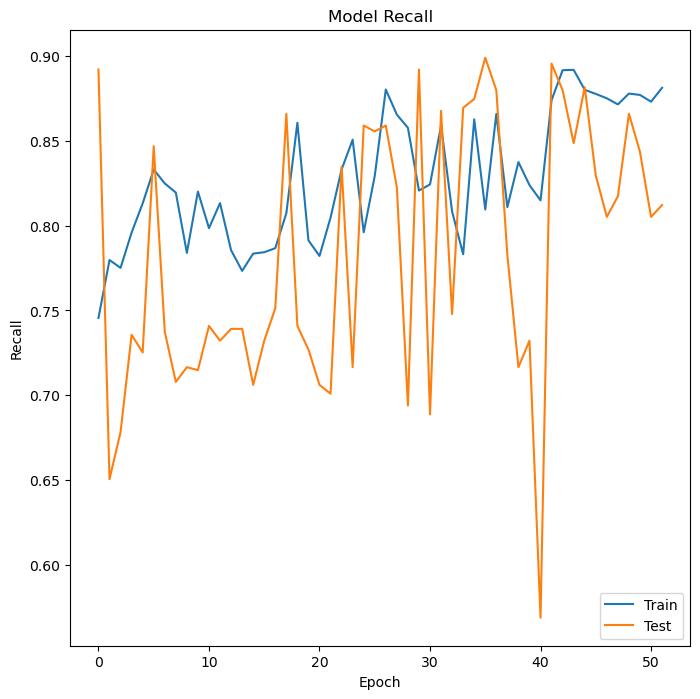

In [196]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelOp.history['recall'])
plt.plot(modelOp.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Final Model and Model Deployment

I decided to follow the grid search params and early stop with 52 epoch for better generalization

In [211]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(unit1, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
# train model
finalmodel=model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=50,
    epochs=52, # based on early stoping
    verbose=1,
)

Epoch 1/52
201/201 [==============================] - 1s 1ms/step - loss: 0.3630 - accuracy: 0.8367 - val_loss: 0.3679 - val_accuracy: 0.7964
Epoch 2/52
201/201 [==============================] - 0s 996us/step - loss: 0.3226 - accuracy: 0.8524 - val_loss: 0.3819 - val_accuracy: 0.8000
Epoch 3/52
201/201 [==============================] - 0s 987us/step - loss: 0.3199 - accuracy: 0.8485 - val_loss: 0.3500 - val_accuracy: 0.8359
Epoch 4/52
201/201 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8509 - val_loss: 0.3386 - val_accuracy: 0.8233
Epoch 5/52
201/201 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8574 - val_loss: 0.3384 - val_accuracy: 0.8377
Epoch 6/52
201/201 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8615 - val_loss: 0.3768 - val_accuracy: 0.8350
Epoch 7/52
201/201 [==============================] - 0s 973us/step - loss: 0.3078 - accuracy: 0.8601 - val_loss: 0.3386 - val_accuracy: 0.8502


In [212]:
modelhistory=model.history.history
modelhistory

{'loss': [0.3630000352859497,
  0.32262957096099854,
  0.3198545277118683,
  0.3217300772666931,
  0.3051285147666931,
  0.3028980791568756,
  0.30783548951148987,
  0.3139965832233429,
  0.326031357049942,
  0.3056473731994629,
  0.30934417247772217,
  0.2920166552066803,
  0.2990768253803253,
  0.28613781929016113,
  0.2938918471336365,
  0.2860020697116852,
  0.2841554582118988,
  0.27985087037086487,
  0.2785279154777527,
  0.27464550733566284,
  0.2904225289821625,
  0.3139301538467407,
  0.3050985336303711,
  0.2935386002063751,
  0.29193681478500366,
  0.3090353310108185,
  0.2967151403427124,
  0.3449831008911133,
  0.3230121433734894,
  0.30757513642311096,
  0.2856332063674927,
  0.2868533730506897,
  0.3030974864959717,
  0.2930586338043213,
  0.2857362627983093,
  0.27875688672065735,
  0.2747723460197449,
  0.2798978388309479,
  0.2795623540878296,
  0.28668996691703796,
  0.28601551055908203,
  0.2697216272354126,
  0.2976817488670349,
  0.29622682929039,
  0.297738105058

In [213]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

349/349 [==============================] - 0s 616us/step
[[5059  515]
 [ 814 4760]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5574
           1       0.90      0.85      0.88      5574

    accuracy                           0.88     11148
   macro avg       0.88      0.88      0.88     11148
weighted avg       0.88      0.88      0.88     11148



In [214]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

150/150 [==============================] - 0s 605us/step
[[2164  225]
 [ 398 1991]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2389
           1       0.90      0.83      0.86      2389

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



In [215]:
roc_auc_score(y_test, y_pred)

0.8696107157806614

In [216]:
y_pred = model.predict(X_test)

150/150 [==============================] - 0s 596us/step


In [217]:
y_train_pred = model.predict(X_train)

349/349 [==============================] - 0s 609us/step


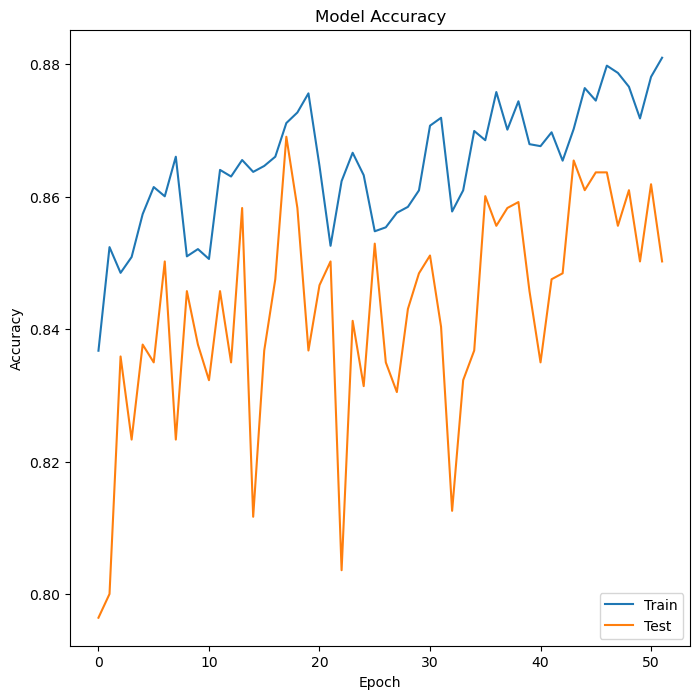

In [218]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(finalmodel.history['accuracy'])
plt.plot(finalmodel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [219]:
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.363000  0.836739  0.367894      0.796413
1  0.322630  0.852387  0.381852      0.800000
2  0.319855  0.848500  0.350007      0.835874
3  0.321730  0.850892  0.338622      0.823318
4  0.305129  0.857371  0.338366      0.837668

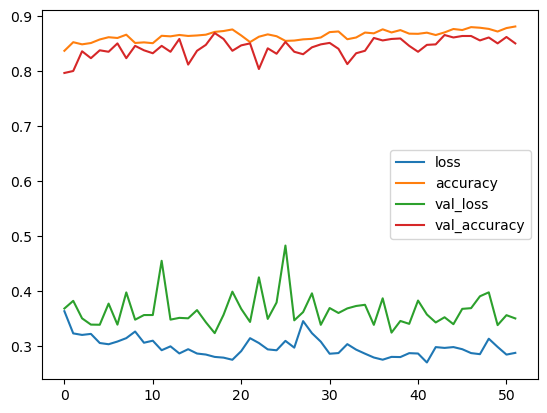

In [220]:
loss_df.plot()
plt.show()

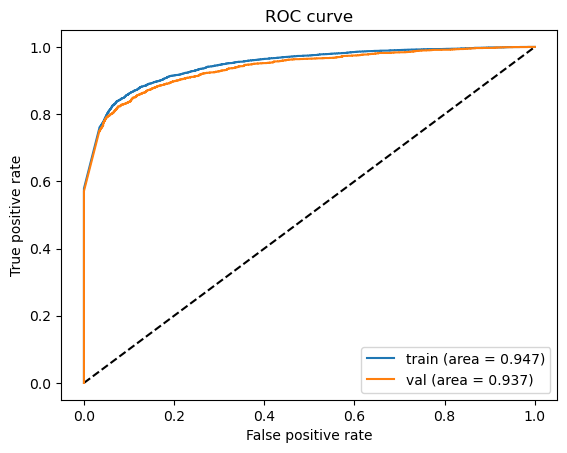

In [221]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Prediction

In [223]:
XArray=[]
yArray=[]
for x in range(len(X)):
    print("index: ", x)
    XArray.append(model.predict(X.loc[[x]]))
    yArray.append(y[x])

index:  0
1/1 [==============================] - 0s 32ms/step
index:  1
1/1 [==============================] - 0s 13ms/step
index:  2
1/1 [==============================] - 0s 12ms/step
index:  3
1/1 [==============================] - 0s 12ms/step
index:  4
1/1 [==============================] - 0s 12ms/step
index:  5
1/1 [==============================] - 0s 12ms/step
index:  6
1/1 [==============================] - 0s 12ms/step
index:  7
1/1 [==============================] - 0s 13ms/step
index:  8
1/1 [==============================] - 0s 12ms/step
index:  9
1/1 [==============================] - 0s 12ms/step
index:  10
1/1 [==============================] - 0s 14ms/step
index:  11
1/1 [==============================] - 0s 11ms/step
index:  12
1/1 [==============================] - 0s 13ms/step
index:  13
1/1 [==============================] - 0s 13ms/step
index:  14
1/1 [==============================] - 0s 11ms/step
index:  15
1/1 [==============================] - 0s 11ms/step
in

1/1 [==============================] - 0s 12ms/step
index:  130
1/1 [==============================] - 0s 11ms/step
index:  131
1/1 [==============================] - 0s 13ms/step
index:  132
1/1 [==============================] - 0s 13ms/step
index:  133
1/1 [==============================] - 0s 12ms/step
index:  134
1/1 [==============================] - 0s 13ms/step
index:  135
1/1 [==============================] - 0s 13ms/step
index:  136
1/1 [==============================] - 0s 14ms/step
index:  137
1/1 [==============================] - 0s 13ms/step
index:  138
1/1 [==============================] - 0s 13ms/step
index:  139
1/1 [==============================] - 0s 14ms/step
index:  140
1/1 [==============================] - 0s 13ms/step
index:  141
1/1 [==============================] - 0s 13ms/step
index:  142
1/1 [==============================] - 0s 14ms/step
index:  143
1/1 [==============================] - 0s 13ms/step
index:  144
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step
index:  258
1/1 [==============================] - 0s 13ms/step
index:  259
1/1 [==============================] - 0s 11ms/step
index:  260
1/1 [==============================] - 0s 13ms/step
index:  261
1/1 [==============================] - 0s 12ms/step
index:  262
1/1 [==============================] - 0s 12ms/step
index:  263
1/1 [==============================] - 0s 13ms/step
index:  264
1/1 [==============================] - 0s 13ms/step
index:  265
1/1 [==============================] - 0s 12ms/step
index:  266
1/1 [==============================] - 0s 11ms/step
index:  267
1/1 [==============================] - 0s 11ms/step
index:  268
1/1 [==============================] - 0s 11ms/step
index:  269
1/1 [==============================] - 0s 12ms/step
index:  270
1/1 [==============================] - 0s 12ms/step
index:  271
1/1 [==============================] - 0s 12ms/step
index:  272
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step
index:  386
1/1 [==============================] - 0s 15ms/step
index:  387
1/1 [==============================] - 0s 11ms/step
index:  388
1/1 [==============================] - 0s 11ms/step
index:  389
1/1 [==============================] - 0s 11ms/step
index:  390
1/1 [==============================] - 0s 12ms/step
index:  391
1/1 [==============================] - 0s 12ms/step
index:  392
1/1 [==============================] - 0s 12ms/step
index:  393
1/1 [==============================] - 0s 11ms/step
index:  394
1/1 [==============================] - 0s 13ms/step
index:  395
1/1 [==============================] - 0s 11ms/step
index:  396
1/1 [==============================] - 0s 12ms/step
index:  397
1/1 [==============================] - 0s 12ms/step
index:  398
1/1 [==============================] - 0s 13ms/step
index:  399
1/1 [==============================] - 0s 12ms/step
index:  400
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step
index:  514
1/1 [==============================] - 0s 12ms/step
index:  515
1/1 [==============================] - 0s 12ms/step
index:  516
1/1 [==============================] - 0s 14ms/step
index:  517
1/1 [==============================] - 0s 12ms/step
index:  518
1/1 [==============================] - 0s 12ms/step
index:  519
1/1 [==============================] - 0s 12ms/step
index:  520
1/1 [==============================] - 0s 12ms/step
index:  521
1/1 [==============================] - 0s 11ms/step
index:  522
1/1 [==============================] - 0s 12ms/step
index:  523
1/1 [==============================] - 0s 12ms/step
index:  524
1/1 [==============================] - 0s 12ms/step
index:  525
1/1 [==============================] - 0s 13ms/step
index:  526
1/1 [==============================] - 0s 11ms/step
index:  527
1/1 [==============================] - 0s 12ms/step
index:  528
1/1 [==============================] - 0

1/1 [==============================] - 0s 13ms/step
index:  642
1/1 [==============================] - 0s 13ms/step
index:  643
1/1 [==============================] - 0s 11ms/step
index:  644
1/1 [==============================] - 0s 11ms/step
index:  645
1/1 [==============================] - 0s 13ms/step
index:  646
1/1 [==============================] - 0s 12ms/step
index:  647
1/1 [==============================] - 0s 12ms/step
index:  648
1/1 [==============================] - 0s 12ms/step
index:  649
1/1 [==============================] - 0s 11ms/step
index:  650
1/1 [==============================] - 0s 13ms/step
index:  651
1/1 [==============================] - 0s 12ms/step
index:  652
1/1 [==============================] - 0s 12ms/step
index:  653
1/1 [==============================] - 0s 12ms/step
index:  654
1/1 [==============================] - 0s 12ms/step
index:  655
1/1 [==============================] - 0s 14ms/step
index:  656
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step
index:  770
1/1 [==============================] - 0s 13ms/step
index:  771
1/1 [==============================] - 0s 12ms/step
index:  772
1/1 [==============================] - 0s 11ms/step
index:  773
1/1 [==============================] - 0s 14ms/step
index:  774
1/1 [==============================] - 0s 12ms/step
index:  775
1/1 [==============================] - 0s 13ms/step
index:  776
1/1 [==============================] - 0s 12ms/step
index:  777
1/1 [==============================] - 0s 12ms/step
index:  778
1/1 [==============================] - 0s 13ms/step
index:  779
1/1 [==============================] - 0s 12ms/step
index:  780
1/1 [==============================] - 0s 12ms/step
index:  781
1/1 [==============================] - 0s 13ms/step
index:  782
1/1 [==============================] - 0s 11ms/step
index:  783
1/1 [==============================] - 0s 13ms/step
index:  784
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step
index:  898
1/1 [==============================] - 0s 13ms/step
index:  899
1/1 [==============================] - 0s 12ms/step
index:  900
1/1 [==============================] - 0s 12ms/step
index:  901
1/1 [==============================] - 0s 12ms/step
index:  902
1/1 [==============================] - 0s 11ms/step
index:  903
1/1 [==============================] - 0s 12ms/step
index:  904
1/1 [==============================] - 0s 14ms/step
index:  905
1/1 [==============================] - 0s 13ms/step
index:  906
1/1 [==============================] - 0s 11ms/step
index:  907
1/1 [==============================] - 0s 11ms/step
index:  908
1/1 [==============================] - 0s 13ms/step
index:  909
1/1 [==============================] - 0s 12ms/step
index:  910
1/1 [==============================] - 0s 13ms/step
index:  911
1/1 [==============================] - 0s 12ms/step
index:  912
1/1 [==============================] - 0

1/1 [==============================] - 0s 15ms/step
index:  1025
1/1 [==============================] - 0s 15ms/step
index:  1026
1/1 [==============================] - 0s 12ms/step
index:  1027
1/1 [==============================] - 0s 14ms/step
index:  1028
1/1 [==============================] - 0s 12ms/step
index:  1029
1/1 [==============================] - 0s 13ms/step
index:  1030
1/1 [==============================] - 0s 14ms/step
index:  1031
1/1 [==============================] - 0s 13ms/step
index:  1032
1/1 [==============================] - 0s 13ms/step
index:  1033
1/1 [==============================] - 0s 12ms/step
index:  1034
1/1 [==============================] - 0s 13ms/step
index:  1035
1/1 [==============================] - 0s 12ms/step
index:  1036
1/1 [==============================] - 0s 14ms/step
index:  1037
1/1 [==============================] - 0s 13ms/step
index:  1038
1/1 [==============================] - 0s 14ms/step
index:  1039
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  1151
1/1 [==============================] - 0s 14ms/step
index:  1152
1/1 [==============================] - 0s 13ms/step
index:  1153
1/1 [==============================] - 0s 12ms/step
index:  1154
1/1 [==============================] - 0s 12ms/step
index:  1155
1/1 [==============================] - 0s 13ms/step
index:  1156
1/1 [==============================] - 0s 13ms/step
index:  1157
1/1 [==============================] - 0s 14ms/step
index:  1158
1/1 [==============================] - 0s 12ms/step
index:  1159
1/1 [==============================] - 0s 12ms/step
index:  1160
1/1 [==============================] - 0s 11ms/step
index:  1161
1/1 [==============================] - 0s 12ms/step
index:  1162
1/1 [==============================] - 0s 12ms/step
index:  1163
1/1 [==============================] - 0s 12ms/step
index:  1164
1/1 [==============================] - 0s 11ms/step
index:  1165
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  1277
1/1 [==============================] - 0s 13ms/step
index:  1278
1/1 [==============================] - 0s 15ms/step
index:  1279
1/1 [==============================] - 0s 12ms/step
index:  1280
1/1 [==============================] - 0s 12ms/step
index:  1281
1/1 [==============================] - 0s 13ms/step
index:  1282
1/1 [==============================] - 0s 11ms/step
index:  1283
1/1 [==============================] - 0s 12ms/step
index:  1284
1/1 [==============================] - 0s 13ms/step
index:  1285
1/1 [==============================] - 0s 11ms/step
index:  1286
1/1 [==============================] - 0s 13ms/step
index:  1287
1/1 [==============================] - 0s 11ms/step
index:  1288
1/1 [==============================] - 0s 11ms/step
index:  1289
1/1 [==============================] - 0s 12ms/step
index:  1290
1/1 [==============================] - 0s 12ms/step
index:  1291
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  1403
1/1 [==============================] - 0s 12ms/step
index:  1404
1/1 [==============================] - 0s 13ms/step
index:  1405
1/1 [==============================] - 0s 12ms/step
index:  1406
1/1 [==============================] - 0s 13ms/step
index:  1407
1/1 [==============================] - 0s 11ms/step
index:  1408
1/1 [==============================] - 0s 13ms/step
index:  1409
1/1 [==============================] - 0s 12ms/step
index:  1410
1/1 [==============================] - 0s 12ms/step
index:  1411
1/1 [==============================] - 0s 12ms/step
index:  1412
1/1 [==============================] - 0s 12ms/step
index:  1413
1/1 [==============================] - 0s 15ms/step
index:  1414
1/1 [==============================] - 0s 11ms/step
index:  1415
1/1 [==============================] - 0s 12ms/step
index:  1416
1/1 [==============================] - 0s 12ms/step
index:  1417
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  1529
1/1 [==============================] - 0s 12ms/step
index:  1530
1/1 [==============================] - 0s 11ms/step
index:  1531
1/1 [==============================] - 0s 12ms/step
index:  1532
1/1 [==============================] - 0s 13ms/step
index:  1533
1/1 [==============================] - 0s 12ms/step
index:  1534
1/1 [==============================] - 0s 12ms/step
index:  1535
1/1 [==============================] - 0s 12ms/step
index:  1536
1/1 [==============================] - 0s 11ms/step
index:  1537
1/1 [==============================] - 0s 12ms/step
index:  1538
1/1 [==============================] - 0s 13ms/step
index:  1539
1/1 [==============================] - 0s 13ms/step
index:  1540
1/1 [==============================] - 0s 12ms/step
index:  1541
1/1 [==============================] - 0s 12ms/step
index:  1542
1/1 [==============================] - 0s 10ms/step
index:  1543
1/1 [====================

1/1 [==============================] - 0s 17ms/step
index:  1655
1/1 [==============================] - 0s 13ms/step
index:  1656
1/1 [==============================] - 0s 14ms/step
index:  1657
1/1 [==============================] - 0s 12ms/step
index:  1658
1/1 [==============================] - 0s 11ms/step
index:  1659
1/1 [==============================] - 0s 12ms/step
index:  1660
1/1 [==============================] - 0s 12ms/step
index:  1661
1/1 [==============================] - 0s 12ms/step
index:  1662
1/1 [==============================] - 0s 13ms/step
index:  1663
1/1 [==============================] - 0s 12ms/step
index:  1664
1/1 [==============================] - 0s 13ms/step
index:  1665
1/1 [==============================] - 0s 12ms/step
index:  1666
1/1 [==============================] - 0s 12ms/step
index:  1667
1/1 [==============================] - 0s 11ms/step
index:  1668
1/1 [==============================] - 0s 13ms/step
index:  1669
1/1 [====================

1/1 [==============================] - 0s 15ms/step
index:  1781
1/1 [==============================] - 0s 13ms/step
index:  1782
1/1 [==============================] - 0s 13ms/step
index:  1783
1/1 [==============================] - 0s 12ms/step
index:  1784
1/1 [==============================] - 0s 13ms/step
index:  1785
1/1 [==============================] - 0s 12ms/step
index:  1786
1/1 [==============================] - 0s 12ms/step
index:  1787
1/1 [==============================] - 0s 12ms/step
index:  1788
1/1 [==============================] - 0s 12ms/step
index:  1789
1/1 [==============================] - 0s 13ms/step
index:  1790
1/1 [==============================] - 0s 13ms/step
index:  1791
1/1 [==============================] - 0s 12ms/step
index:  1792
1/1 [==============================] - 0s 14ms/step
index:  1793
1/1 [==============================] - 0s 13ms/step
index:  1794
1/1 [==============================] - 0s 13ms/step
index:  1795
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  1907
1/1 [==============================] - 0s 13ms/step
index:  1908
1/1 [==============================] - 0s 13ms/step
index:  1909
1/1 [==============================] - 0s 12ms/step
index:  1910
1/1 [==============================] - 0s 12ms/step
index:  1911
1/1 [==============================] - 0s 12ms/step
index:  1912
1/1 [==============================] - 0s 15ms/step
index:  1913
1/1 [==============================] - 0s 13ms/step
index:  1914
1/1 [==============================] - 0s 13ms/step
index:  1915
1/1 [==============================] - 0s 12ms/step
index:  1916
1/1 [==============================] - 0s 12ms/step
index:  1917
1/1 [==============================] - 0s 13ms/step
index:  1918
1/1 [==============================] - 0s 12ms/step
index:  1919
1/1 [==============================] - 0s 12ms/step
index:  1920
1/1 [==============================] - 0s 13ms/step
index:  1921
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  2033
1/1 [==============================] - 0s 10ms/step
index:  2034
1/1 [==============================] - 0s 12ms/step
index:  2035
1/1 [==============================] - 0s 12ms/step
index:  2036
1/1 [==============================] - 0s 15ms/step
index:  2037
1/1 [==============================] - 0s 12ms/step
index:  2038
1/1 [==============================] - 0s 13ms/step
index:  2039
1/1 [==============================] - 0s 11ms/step
index:  2040
1/1 [==============================] - 0s 12ms/step
index:  2041
1/1 [==============================] - 0s 16ms/step
index:  2042
1/1 [==============================] - 0s 12ms/step
index:  2043
1/1 [==============================] - 0s 13ms/step
index:  2044
1/1 [==============================] - 0s 13ms/step
index:  2045
1/1 [==============================] - 0s 12ms/step
index:  2046
1/1 [==============================] - 0s 13ms/step
index:  2047
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  2159
1/1 [==============================] - 0s 13ms/step
index:  2160
1/1 [==============================] - 0s 12ms/step
index:  2161
1/1 [==============================] - 0s 15ms/step
index:  2162
1/1 [==============================] - 0s 12ms/step
index:  2163
1/1 [==============================] - 0s 13ms/step
index:  2164
1/1 [==============================] - 0s 12ms/step
index:  2165
1/1 [==============================] - 0s 17ms/step
index:  2166
1/1 [==============================] - 0s 14ms/step
index:  2167
1/1 [==============================] - 0s 22ms/step
index:  2168
1/1 [==============================] - 0s 13ms/step
index:  2169
1/1 [==============================] - 0s 13ms/step
index:  2170
1/1 [==============================] - 0s 14ms/step
index:  2171
1/1 [==============================] - 0s 11ms/step
index:  2172
1/1 [==============================] - 0s 14ms/step
index:  2173
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  2285
1/1 [==============================] - 0s 12ms/step
index:  2286
1/1 [==============================] - 0s 12ms/step
index:  2287
1/1 [==============================] - 0s 12ms/step
index:  2288
1/1 [==============================] - 0s 11ms/step
index:  2289
1/1 [==============================] - 0s 12ms/step
index:  2290
1/1 [==============================] - 0s 14ms/step
index:  2291
1/1 [==============================] - 0s 11ms/step
index:  2292
1/1 [==============================] - 0s 11ms/step
index:  2293
1/1 [==============================] - 0s 12ms/step
index:  2294
1/1 [==============================] - 0s 12ms/step
index:  2295
1/1 [==============================] - 0s 12ms/step
index:  2296
1/1 [==============================] - 0s 12ms/step
index:  2297
1/1 [==============================] - 0s 12ms/step
index:  2298
1/1 [==============================] - 0s 14ms/step
index:  2299
1/1 [====================

1/1 [==============================] - 0s 14ms/step
index:  2411
1/1 [==============================] - 0s 14ms/step
index:  2412
1/1 [==============================] - 0s 13ms/step
index:  2413
1/1 [==============================] - 0s 14ms/step
index:  2414
1/1 [==============================] - 0s 13ms/step
index:  2415
1/1 [==============================] - 0s 14ms/step
index:  2416
1/1 [==============================] - 0s 13ms/step
index:  2417
1/1 [==============================] - 0s 13ms/step
index:  2418
1/1 [==============================] - 0s 12ms/step
index:  2419
1/1 [==============================] - 0s 14ms/step
index:  2420
1/1 [==============================] - 0s 13ms/step
index:  2421
1/1 [==============================] - 0s 11ms/step
index:  2422
1/1 [==============================] - 0s 12ms/step
index:  2423
1/1 [==============================] - 0s 14ms/step
index:  2424
1/1 [==============================] - 0s 16ms/step
index:  2425
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  2537
1/1 [==============================] - 0s 12ms/step
index:  2538
1/1 [==============================] - 0s 13ms/step
index:  2539
1/1 [==============================] - 0s 13ms/step
index:  2540
1/1 [==============================] - 0s 13ms/step
index:  2541
1/1 [==============================] - 0s 13ms/step
index:  2542
1/1 [==============================] - 0s 13ms/step
index:  2543
1/1 [==============================] - 0s 12ms/step
index:  2544
1/1 [==============================] - 0s 12ms/step
index:  2545
1/1 [==============================] - 0s 15ms/step
index:  2546
1/1 [==============================] - 0s 15ms/step
index:  2547
1/1 [==============================] - 0s 13ms/step
index:  2548
1/1 [==============================] - 0s 12ms/step
index:  2549
1/1 [==============================] - 0s 12ms/step
index:  2550
1/1 [==============================] - 0s 12ms/step
index:  2551
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  2663
1/1 [==============================] - 0s 12ms/step
index:  2664
1/1 [==============================] - 0s 12ms/step
index:  2665
1/1 [==============================] - 0s 12ms/step
index:  2666
1/1 [==============================] - 0s 13ms/step
index:  2667
1/1 [==============================] - 0s 12ms/step
index:  2668
1/1 [==============================] - 0s 12ms/step
index:  2669
1/1 [==============================] - 0s 11ms/step
index:  2670
1/1 [==============================] - 0s 11ms/step
index:  2671
1/1 [==============================] - 0s 12ms/step
index:  2672
1/1 [==============================] - 0s 11ms/step
index:  2673
1/1 [==============================] - 0s 13ms/step
index:  2674
1/1 [==============================] - 0s 12ms/step
index:  2675
1/1 [==============================] - 0s 13ms/step
index:  2676
1/1 [==============================] - 0s 14ms/step
index:  2677
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  2789
1/1 [==============================] - 0s 12ms/step
index:  2790
1/1 [==============================] - 0s 12ms/step
index:  2791
1/1 [==============================] - 0s 13ms/step
index:  2792
1/1 [==============================] - 0s 11ms/step
index:  2793
1/1 [==============================] - 0s 13ms/step
index:  2794
1/1 [==============================] - 0s 13ms/step
index:  2795
1/1 [==============================] - 0s 12ms/step
index:  2796
1/1 [==============================] - 0s 13ms/step
index:  2797
1/1 [==============================] - 0s 12ms/step
index:  2798
1/1 [==============================] - 0s 12ms/step
index:  2799
1/1 [==============================] - 0s 12ms/step
index:  2800
1/1 [==============================] - 0s 14ms/step
index:  2801
1/1 [==============================] - 0s 12ms/step
index:  2802
1/1 [==============================] - 0s 12ms/step
index:  2803
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  2915
1/1 [==============================] - 0s 12ms/step
index:  2916
1/1 [==============================] - 0s 16ms/step
index:  2917
1/1 [==============================] - 0s 14ms/step
index:  2918
1/1 [==============================] - 0s 12ms/step
index:  2919
1/1 [==============================] - 0s 16ms/step
index:  2920
1/1 [==============================] - 0s 13ms/step
index:  2921
1/1 [==============================] - 0s 11ms/step
index:  2922
1/1 [==============================] - 0s 12ms/step
index:  2923
1/1 [==============================] - 0s 12ms/step
index:  2924
1/1 [==============================] - 0s 11ms/step
index:  2925
1/1 [==============================] - 0s 12ms/step
index:  2926
1/1 [==============================] - 0s 14ms/step
index:  2927
1/1 [==============================] - 0s 13ms/step
index:  2928
1/1 [==============================] - 0s 14ms/step
index:  2929
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  3041
1/1 [==============================] - 0s 13ms/step
index:  3042
1/1 [==============================] - 0s 12ms/step
index:  3043
1/1 [==============================] - 0s 12ms/step
index:  3044
1/1 [==============================] - 0s 13ms/step
index:  3045
1/1 [==============================] - 0s 13ms/step
index:  3046
1/1 [==============================] - 0s 12ms/step
index:  3047
1/1 [==============================] - 0s 12ms/step
index:  3048
1/1 [==============================] - 0s 11ms/step
index:  3049
1/1 [==============================] - 0s 15ms/step
index:  3050
1/1 [==============================] - 0s 10ms/step
index:  3051
1/1 [==============================] - 0s 13ms/step
index:  3052
1/1 [==============================] - 0s 14ms/step
index:  3053
1/1 [==============================] - 0s 12ms/step
index:  3054
1/1 [==============================] - 0s 12ms/step
index:  3055
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  3167
1/1 [==============================] - 0s 13ms/step
index:  3168
1/1 [==============================] - 0s 11ms/step
index:  3169
1/1 [==============================] - 0s 12ms/step
index:  3170
1/1 [==============================] - 0s 11ms/step
index:  3171
1/1 [==============================] - 0s 12ms/step
index:  3172
1/1 [==============================] - 0s 13ms/step
index:  3173
1/1 [==============================] - 0s 12ms/step
index:  3174
1/1 [==============================] - 0s 11ms/step
index:  3175
1/1 [==============================] - 0s 12ms/step
index:  3176
1/1 [==============================] - 0s 16ms/step
index:  3177
1/1 [==============================] - 0s 11ms/step
index:  3178
1/1 [==============================] - 0s 13ms/step
index:  3179
1/1 [==============================] - 0s 13ms/step
index:  3180
1/1 [==============================] - 0s 12ms/step
index:  3181
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  3293
1/1 [==============================] - 0s 11ms/step
index:  3294
1/1 [==============================] - 0s 12ms/step
index:  3295
1/1 [==============================] - 0s 13ms/step
index:  3296
1/1 [==============================] - 0s 11ms/step
index:  3297
1/1 [==============================] - 0s 16ms/step
index:  3298
1/1 [==============================] - 0s 11ms/step
index:  3299
1/1 [==============================] - 0s 12ms/step
index:  3300
1/1 [==============================] - 0s 13ms/step
index:  3301
1/1 [==============================] - 0s 14ms/step
index:  3302
1/1 [==============================] - 0s 12ms/step
index:  3303
1/1 [==============================] - 0s 12ms/step
index:  3304
1/1 [==============================] - 0s 12ms/step
index:  3305
1/1 [==============================] - 0s 12ms/step
index:  3306
1/1 [==============================] - 0s 14ms/step
index:  3307
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  3419
1/1 [==============================] - 0s 11ms/step
index:  3420
1/1 [==============================] - 0s 13ms/step
index:  3421
1/1 [==============================] - 0s 12ms/step
index:  3422
1/1 [==============================] - 0s 13ms/step
index:  3423
1/1 [==============================] - 0s 12ms/step
index:  3424
1/1 [==============================] - 0s 11ms/step
index:  3425
1/1 [==============================] - 0s 13ms/step
index:  3426
1/1 [==============================] - 0s 12ms/step
index:  3427
1/1 [==============================] - 0s 13ms/step
index:  3428
1/1 [==============================] - 0s 12ms/step
index:  3429
1/1 [==============================] - 0s 12ms/step
index:  3430
1/1 [==============================] - 0s 14ms/step
index:  3431
1/1 [==============================] - 0s 11ms/step
index:  3432
1/1 [==============================] - 0s 13ms/step
index:  3433
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  3545
1/1 [==============================] - 0s 12ms/step
index:  3546
1/1 [==============================] - 0s 13ms/step
index:  3547
1/1 [==============================] - 0s 11ms/step
index:  3548
1/1 [==============================] - 0s 12ms/step
index:  3549
1/1 [==============================] - 0s 11ms/step
index:  3550
1/1 [==============================] - 0s 13ms/step
index:  3551
1/1 [==============================] - 0s 13ms/step
index:  3552
1/1 [==============================] - 0s 12ms/step
index:  3553
1/1 [==============================] - 0s 12ms/step
index:  3554
1/1 [==============================] - 0s 12ms/step
index:  3555
1/1 [==============================] - 0s 12ms/step
index:  3556
1/1 [==============================] - 0s 11ms/step
index:  3557
1/1 [==============================] - 0s 14ms/step
index:  3558
1/1 [==============================] - 0s 12ms/step
index:  3559
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  3671
1/1 [==============================] - 0s 13ms/step
index:  3672
1/1 [==============================] - 0s 12ms/step
index:  3673
1/1 [==============================] - 0s 13ms/step
index:  3674
1/1 [==============================] - 0s 11ms/step
index:  3675
1/1 [==============================] - 0s 11ms/step
index:  3676
1/1 [==============================] - 0s 13ms/step
index:  3677
1/1 [==============================] - 0s 11ms/step
index:  3678
1/1 [==============================] - 0s 12ms/step
index:  3679
1/1 [==============================] - 0s 12ms/step
index:  3680
1/1 [==============================] - 0s 12ms/step
index:  3681
1/1 [==============================] - 0s 12ms/step
index:  3682
1/1 [==============================] - 0s 13ms/step
index:  3683
1/1 [==============================] - 0s 11ms/step
index:  3684
1/1 [==============================] - 0s 15ms/step
index:  3685
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  3797
1/1 [==============================] - 0s 15ms/step
index:  3798
1/1 [==============================] - 0s 11ms/step
index:  3799
1/1 [==============================] - 0s 12ms/step
index:  3800
1/1 [==============================] - 0s 13ms/step
index:  3801
1/1 [==============================] - 0s 11ms/step
index:  3802
1/1 [==============================] - 0s 12ms/step
index:  3803
1/1 [==============================] - 0s 13ms/step
index:  3804
1/1 [==============================] - 0s 13ms/step
index:  3805
1/1 [==============================] - 0s 13ms/step
index:  3806
1/1 [==============================] - 0s 12ms/step
index:  3807
1/1 [==============================] - 0s 11ms/step
index:  3808
1/1 [==============================] - 0s 13ms/step
index:  3809
1/1 [==============================] - 0s 11ms/step
index:  3810
1/1 [==============================] - 0s 10ms/step
index:  3811
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  3923
1/1 [==============================] - 0s 12ms/step
index:  3924
1/1 [==============================] - 0s 13ms/step
index:  3925
1/1 [==============================] - 0s 13ms/step
index:  3926
1/1 [==============================] - 0s 12ms/step
index:  3927
1/1 [==============================] - 0s 12ms/step
index:  3928
1/1 [==============================] - 0s 13ms/step
index:  3929
1/1 [==============================] - 0s 13ms/step
index:  3930
1/1 [==============================] - 0s 14ms/step
index:  3931
1/1 [==============================] - 0s 10ms/step
index:  3932
1/1 [==============================] - 0s 11ms/step
index:  3933
1/1 [==============================] - 0s 12ms/step
index:  3934
1/1 [==============================] - 0s 11ms/step
index:  3935
1/1 [==============================] - 0s 12ms/step
index:  3936
1/1 [==============================] - 0s 14ms/step
index:  3937
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  4049
1/1 [==============================] - 0s 12ms/step
index:  4050
1/1 [==============================] - 0s 11ms/step
index:  4051
1/1 [==============================] - 0s 13ms/step
index:  4052
1/1 [==============================] - 0s 12ms/step
index:  4053
1/1 [==============================] - 0s 12ms/step
index:  4054
1/1 [==============================] - 0s 11ms/step
index:  4055
1/1 [==============================] - 0s 12ms/step
index:  4056
1/1 [==============================] - 0s 13ms/step
index:  4057
1/1 [==============================] - 0s 11ms/step
index:  4058
1/1 [==============================] - 0s 15ms/step
index:  4059
1/1 [==============================] - 0s 12ms/step
index:  4060
1/1 [==============================] - 0s 12ms/step
index:  4061
1/1 [==============================] - 0s 11ms/step
index:  4062
1/1 [==============================] - 0s 13ms/step
index:  4063
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  4175
1/1 [==============================] - 0s 13ms/step
index:  4176
1/1 [==============================] - 0s 12ms/step
index:  4177
1/1 [==============================] - 0s 11ms/step
index:  4178
1/1 [==============================] - 0s 15ms/step
index:  4179
1/1 [==============================] - 0s 11ms/step
index:  4180
1/1 [==============================] - 0s 12ms/step
index:  4181
1/1 [==============================] - 0s 13ms/step
index:  4182
1/1 [==============================] - 0s 13ms/step
index:  4183
1/1 [==============================] - 0s 12ms/step
index:  4184
1/1 [==============================] - 0s 11ms/step
index:  4185
1/1 [==============================] - 0s 12ms/step
index:  4186
1/1 [==============================] - 0s 12ms/step
index:  4187
1/1 [==============================] - 0s 12ms/step
index:  4188
1/1 [==============================] - 0s 11ms/step
index:  4189
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  4301
1/1 [==============================] - 0s 12ms/step
index:  4302
1/1 [==============================] - 0s 13ms/step
index:  4303
1/1 [==============================] - 0s 13ms/step
index:  4304
1/1 [==============================] - 0s 11ms/step
index:  4305
1/1 [==============================] - 0s 11ms/step
index:  4306
1/1 [==============================] - 0s 12ms/step
index:  4307
1/1 [==============================] - 0s 14ms/step
index:  4308
1/1 [==============================] - 0s 12ms/step
index:  4309
1/1 [==============================] - 0s 13ms/step
index:  4310
1/1 [==============================] - 0s 12ms/step
index:  4311
1/1 [==============================] - 0s 14ms/step
index:  4312
1/1 [==============================] - 0s 12ms/step
index:  4313
1/1 [==============================] - 0s 13ms/step
index:  4314
1/1 [==============================] - 0s 11ms/step
index:  4315
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  4427
1/1 [==============================] - 0s 12ms/step
index:  4428
1/1 [==============================] - 0s 11ms/step
index:  4429
1/1 [==============================] - 0s 12ms/step
index:  4430
1/1 [==============================] - 0s 14ms/step
index:  4431
1/1 [==============================] - 0s 12ms/step
index:  4432
1/1 [==============================] - 0s 13ms/step
index:  4433
1/1 [==============================] - 0s 12ms/step
index:  4434
1/1 [==============================] - 0s 12ms/step
index:  4435
1/1 [==============================] - 0s 12ms/step
index:  4436
1/1 [==============================] - 0s 12ms/step
index:  4437
1/1 [==============================] - 0s 15ms/step
index:  4438
1/1 [==============================] - 0s 27ms/step
index:  4439
1/1 [==============================] - 0s 13ms/step
index:  4440
1/1 [==============================] - 0s 12ms/step
index:  4441
1/1 [====================

1/1 [==============================] - 0s 14ms/step
index:  4553
1/1 [==============================] - 0s 13ms/step
index:  4554
1/1 [==============================] - 0s 12ms/step
index:  4555
1/1 [==============================] - 0s 12ms/step
index:  4556
1/1 [==============================] - 0s 12ms/step
index:  4557
1/1 [==============================] - 0s 12ms/step
index:  4558
1/1 [==============================] - 0s 11ms/step
index:  4559
1/1 [==============================] - 0s 12ms/step
index:  4560
1/1 [==============================] - 0s 14ms/step
index:  4561
1/1 [==============================] - 0s 12ms/step
index:  4562
1/1 [==============================] - 0s 13ms/step
index:  4563
1/1 [==============================] - 0s 13ms/step
index:  4564
1/1 [==============================] - 0s 13ms/step
index:  4565
1/1 [==============================] - 0s 13ms/step
index:  4566
1/1 [==============================] - 0s 13ms/step
index:  4567
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  4679
1/1 [==============================] - 0s 12ms/step
index:  4680
1/1 [==============================] - 0s 13ms/step
index:  4681
1/1 [==============================] - 0s 13ms/step
index:  4682
1/1 [==============================] - 0s 12ms/step
index:  4683
1/1 [==============================] - 0s 14ms/step
index:  4684
1/1 [==============================] - 0s 12ms/step
index:  4685
1/1 [==============================] - 0s 13ms/step
index:  4686
1/1 [==============================] - 0s 12ms/step
index:  4687
1/1 [==============================] - 0s 11ms/step
index:  4688
1/1 [==============================] - 0s 12ms/step
index:  4689
1/1 [==============================] - 0s 13ms/step
index:  4690
1/1 [==============================] - 0s 11ms/step
index:  4691
1/1 [==============================] - 0s 14ms/step
index:  4692
1/1 [==============================] - 0s 13ms/step
index:  4693
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  4805
1/1 [==============================] - 0s 13ms/step
index:  4806
1/1 [==============================] - 0s 13ms/step
index:  4807
1/1 [==============================] - 0s 13ms/step
index:  4808
1/1 [==============================] - 0s 11ms/step
index:  4809
1/1 [==============================] - 0s 12ms/step
index:  4810
1/1 [==============================] - 0s 12ms/step
index:  4811
1/1 [==============================] - 0s 12ms/step
index:  4812
1/1 [==============================] - 0s 11ms/step
index:  4813
1/1 [==============================] - 0s 11ms/step
index:  4814
1/1 [==============================] - 0s 12ms/step
index:  4815
1/1 [==============================] - 0s 12ms/step
index:  4816
1/1 [==============================] - 0s 12ms/step
index:  4817
1/1 [==============================] - 0s 14ms/step
index:  4818
1/1 [==============================] - 0s 13ms/step
index:  4819
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  4931
1/1 [==============================] - 0s 13ms/step
index:  4932
1/1 [==============================] - 0s 13ms/step
index:  4933
1/1 [==============================] - 0s 13ms/step
index:  4934
1/1 [==============================] - 0s 13ms/step
index:  4935
1/1 [==============================] - 0s 13ms/step
index:  4936
1/1 [==============================] - 0s 13ms/step
index:  4937
1/1 [==============================] - 0s 13ms/step
index:  4938
1/1 [==============================] - 0s 12ms/step
index:  4939
1/1 [==============================] - 0s 11ms/step
index:  4940
1/1 [==============================] - 0s 12ms/step
index:  4941
1/1 [==============================] - 0s 13ms/step
index:  4942
1/1 [==============================] - 0s 11ms/step
index:  4943
1/1 [==============================] - 0s 11ms/step
index:  4944
1/1 [==============================] - 0s 11ms/step
index:  4945
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  5057
1/1 [==============================] - 0s 12ms/step
index:  5058
1/1 [==============================] - 0s 11ms/step
index:  5059
1/1 [==============================] - 0s 12ms/step
index:  5060
1/1 [==============================] - 0s 13ms/step
index:  5061
1/1 [==============================] - 0s 12ms/step
index:  5062
1/1 [==============================] - 0s 12ms/step
index:  5063
1/1 [==============================] - 0s 13ms/step
index:  5064
1/1 [==============================] - 0s 11ms/step
index:  5065
1/1 [==============================] - 0s 13ms/step
index:  5066
1/1 [==============================] - 0s 12ms/step
index:  5067
1/1 [==============================] - 0s 12ms/step
index:  5068
1/1 [==============================] - 0s 14ms/step
index:  5069
1/1 [==============================] - 0s 14ms/step
index:  5070
1/1 [==============================] - 0s 14ms/step
index:  5071
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  5183
1/1 [==============================] - 0s 13ms/step
index:  5184
1/1 [==============================] - 0s 11ms/step
index:  5185
1/1 [==============================] - 0s 12ms/step
index:  5186
1/1 [==============================] - 0s 13ms/step
index:  5187
1/1 [==============================] - 0s 11ms/step
index:  5188
1/1 [==============================] - 0s 12ms/step
index:  5189
1/1 [==============================] - 0s 12ms/step
index:  5190
1/1 [==============================] - 0s 13ms/step
index:  5191
1/1 [==============================] - 0s 11ms/step
index:  5192
1/1 [==============================] - 0s 12ms/step
index:  5193
1/1 [==============================] - 0s 14ms/step
index:  5194
1/1 [==============================] - 0s 11ms/step
index:  5195
1/1 [==============================] - 0s 12ms/step
index:  5196
1/1 [==============================] - 0s 12ms/step
index:  5197
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  5309
1/1 [==============================] - 0s 13ms/step
index:  5310
1/1 [==============================] - 0s 12ms/step
index:  5311
1/1 [==============================] - 0s 13ms/step
index:  5312
1/1 [==============================] - 0s 13ms/step
index:  5313
1/1 [==============================] - 0s 11ms/step
index:  5314
1/1 [==============================] - 0s 12ms/step
index:  5315
1/1 [==============================] - 0s 12ms/step
index:  5316
1/1 [==============================] - 0s 13ms/step
index:  5317
1/1 [==============================] - 0s 12ms/step
index:  5318
1/1 [==============================] - 0s 12ms/step
index:  5319
1/1 [==============================] - 0s 17ms/step
index:  5320
1/1 [==============================] - 0s 14ms/step
index:  5321
1/1 [==============================] - 0s 15ms/step
index:  5322
1/1 [==============================] - 0s 12ms/step
index:  5323
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  5435
1/1 [==============================] - 0s 13ms/step
index:  5436
1/1 [==============================] - 0s 11ms/step
index:  5437
1/1 [==============================] - 0s 14ms/step
index:  5438
1/1 [==============================] - 0s 13ms/step
index:  5439
1/1 [==============================] - 0s 12ms/step
index:  5440
1/1 [==============================] - 0s 12ms/step
index:  5441
1/1 [==============================] - 0s 12ms/step
index:  5442
1/1 [==============================] - 0s 12ms/step
index:  5443
1/1 [==============================] - 0s 12ms/step
index:  5444
1/1 [==============================] - 0s 12ms/step
index:  5445
1/1 [==============================] - 0s 13ms/step
index:  5446
1/1 [==============================] - 0s 15ms/step
index:  5447
1/1 [==============================] - 0s 13ms/step
index:  5448
1/1 [==============================] - 0s 14ms/step
index:  5449
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  5561
1/1 [==============================] - 0s 12ms/step
index:  5562
1/1 [==============================] - 0s 11ms/step
index:  5563
1/1 [==============================] - 0s 13ms/step
index:  5564
1/1 [==============================] - 0s 11ms/step
index:  5565
1/1 [==============================] - 0s 12ms/step
index:  5566
1/1 [==============================] - 0s 12ms/step
index:  5567
1/1 [==============================] - 0s 13ms/step
index:  5568
1/1 [==============================] - 0s 13ms/step
index:  5569
1/1 [==============================] - 0s 14ms/step
index:  5570
1/1 [==============================] - 0s 13ms/step
index:  5571
1/1 [==============================] - 0s 14ms/step
index:  5572
1/1 [==============================] - 0s 12ms/step
index:  5573
1/1 [==============================] - 0s 12ms/step
index:  5574
1/1 [==============================] - 0s 12ms/step
index:  5575
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  5687
1/1 [==============================] - 0s 11ms/step
index:  5688
1/1 [==============================] - 0s 12ms/step
index:  5689
1/1 [==============================] - 0s 11ms/step
index:  5690
1/1 [==============================] - 0s 12ms/step
index:  5691
1/1 [==============================] - 0s 16ms/step
index:  5692
1/1 [==============================] - 0s 14ms/step
index:  5693
1/1 [==============================] - 0s 12ms/step
index:  5694
1/1 [==============================] - 0s 12ms/step
index:  5695
1/1 [==============================] - 0s 12ms/step
index:  5696
1/1 [==============================] - 0s 12ms/step
index:  5697
1/1 [==============================] - 0s 12ms/step
index:  5698
1/1 [==============================] - 0s 11ms/step
index:  5699
1/1 [==============================] - 0s 12ms/step
index:  5700
1/1 [==============================] - 0s 14ms/step
index:  5701
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  5813
1/1 [==============================] - 0s 12ms/step
index:  5814
1/1 [==============================] - 0s 11ms/step
index:  5815
1/1 [==============================] - 0s 12ms/step
index:  5816
1/1 [==============================] - 0s 12ms/step
index:  5817
1/1 [==============================] - 0s 11ms/step
index:  5818
1/1 [==============================] - 0s 12ms/step
index:  5819
1/1 [==============================] - 0s 11ms/step
index:  5820
1/1 [==============================] - 0s 13ms/step
index:  5821
1/1 [==============================] - 0s 12ms/step
index:  5822
1/1 [==============================] - 0s 13ms/step
index:  5823
1/1 [==============================] - 0s 12ms/step
index:  5824
1/1 [==============================] - 0s 11ms/step
index:  5825
1/1 [==============================] - 0s 13ms/step
index:  5826
1/1 [==============================] - 0s 11ms/step
index:  5827
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  5939
1/1 [==============================] - 0s 12ms/step
index:  5940
1/1 [==============================] - 0s 12ms/step
index:  5941
1/1 [==============================] - 0s 11ms/step
index:  5942
1/1 [==============================] - 0s 12ms/step
index:  5943
1/1 [==============================] - 0s 12ms/step
index:  5944
1/1 [==============================] - 0s 12ms/step
index:  5945
1/1 [==============================] - 0s 11ms/step
index:  5946
1/1 [==============================] - 0s 11ms/step
index:  5947
1/1 [==============================] - 0s 13ms/step
index:  5948
1/1 [==============================] - 0s 12ms/step
index:  5949
1/1 [==============================] - 0s 12ms/step
index:  5950
1/1 [==============================] - 0s 13ms/step
index:  5951
1/1 [==============================] - 0s 12ms/step
index:  5952
1/1 [==============================] - 0s 12ms/step
index:  5953
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  6065
1/1 [==============================] - 0s 13ms/step
index:  6066
1/1 [==============================] - 0s 13ms/step
index:  6067
1/1 [==============================] - 0s 17ms/step
index:  6068
1/1 [==============================] - 0s 12ms/step
index:  6069
1/1 [==============================] - 0s 11ms/step
index:  6070
1/1 [==============================] - 0s 12ms/step
index:  6071
1/1 [==============================] - 0s 12ms/step
index:  6072
1/1 [==============================] - 0s 12ms/step
index:  6073
1/1 [==============================] - 0s 12ms/step
index:  6074
1/1 [==============================] - 0s 14ms/step
index:  6075
1/1 [==============================] - 0s 13ms/step
index:  6076
1/1 [==============================] - 0s 12ms/step
index:  6077
1/1 [==============================] - 0s 12ms/step
index:  6078
1/1 [==============================] - 0s 14ms/step
index:  6079
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  6191
1/1 [==============================] - 0s 13ms/step
index:  6192
1/1 [==============================] - 0s 12ms/step
index:  6193
1/1 [==============================] - 0s 11ms/step
index:  6194
1/1 [==============================] - 0s 12ms/step
index:  6195
1/1 [==============================] - 0s 12ms/step
index:  6196
1/1 [==============================] - 0s 12ms/step
index:  6197
1/1 [==============================] - 0s 12ms/step
index:  6198
1/1 [==============================] - 0s 12ms/step
index:  6199
1/1 [==============================] - 0s 12ms/step
index:  6200
1/1 [==============================] - 0s 12ms/step
index:  6201
1/1 [==============================] - 0s 13ms/step
index:  6202
1/1 [==============================] - 0s 12ms/step
index:  6203
1/1 [==============================] - 0s 12ms/step
index:  6204
1/1 [==============================] - 0s 12ms/step
index:  6205
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  6317
1/1 [==============================] - 0s 12ms/step
index:  6318
1/1 [==============================] - 0s 13ms/step
index:  6319
1/1 [==============================] - 0s 10ms/step
index:  6320
1/1 [==============================] - 0s 11ms/step
index:  6321
1/1 [==============================] - 0s 13ms/step
index:  6322
1/1 [==============================] - 0s 12ms/step
index:  6323
1/1 [==============================] - 0s 13ms/step
index:  6324
1/1 [==============================] - 0s 11ms/step
index:  6325
1/1 [==============================] - 0s 14ms/step
index:  6326
1/1 [==============================] - 0s 12ms/step
index:  6327
1/1 [==============================] - 0s 13ms/step
index:  6328
1/1 [==============================] - 0s 13ms/step
index:  6329
1/1 [==============================] - 0s 12ms/step
index:  6330
1/1 [==============================] - 0s 11ms/step
index:  6331
1/1 [====================

1/1 [==============================] - 0s 14ms/step
index:  6443
1/1 [==============================] - 0s 11ms/step
index:  6444
1/1 [==============================] - 0s 11ms/step
index:  6445
1/1 [==============================] - 0s 11ms/step
index:  6446
1/1 [==============================] - 0s 13ms/step
index:  6447
1/1 [==============================] - 0s 12ms/step
index:  6448
1/1 [==============================] - 0s 12ms/step
index:  6449
1/1 [==============================] - 0s 12ms/step
index:  6450
1/1 [==============================] - 0s 13ms/step
index:  6451
1/1 [==============================] - 0s 12ms/step
index:  6452
1/1 [==============================] - 0s 13ms/step
index:  6453
1/1 [==============================] - 0s 12ms/step
index:  6454
1/1 [==============================] - 0s 13ms/step
index:  6455
1/1 [==============================] - 0s 12ms/step
index:  6456
1/1 [==============================] - 0s 12ms/step
index:  6457
1/1 [====================

1/1 [==============================] - 0s 14ms/step
index:  6569
1/1 [==============================] - 0s 12ms/step
index:  6570
1/1 [==============================] - 0s 11ms/step
index:  6571
1/1 [==============================] - 0s 11ms/step
index:  6572
1/1 [==============================] - 0s 11ms/step
index:  6573
1/1 [==============================] - 0s 13ms/step
index:  6574
1/1 [==============================] - 0s 12ms/step
index:  6575
1/1 [==============================] - 0s 14ms/step
index:  6576
1/1 [==============================] - 0s 11ms/step
index:  6577
1/1 [==============================] - 0s 11ms/step
index:  6578
1/1 [==============================] - 0s 12ms/step
index:  6579
1/1 [==============================] - 0s 12ms/step
index:  6580
1/1 [==============================] - 0s 13ms/step
index:  6581
1/1 [==============================] - 0s 12ms/step
index:  6582
1/1 [==============================] - 0s 13ms/step
index:  6583
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  6695
1/1 [==============================] - 0s 12ms/step
index:  6696
1/1 [==============================] - 0s 12ms/step
index:  6697
1/1 [==============================] - 0s 12ms/step
index:  6698
1/1 [==============================] - 0s 13ms/step
index:  6699
1/1 [==============================] - 0s 12ms/step
index:  6700
1/1 [==============================] - 0s 12ms/step
index:  6701
1/1 [==============================] - 0s 12ms/step
index:  6702
1/1 [==============================] - 0s 12ms/step
index:  6703
1/1 [==============================] - 0s 13ms/step
index:  6704
1/1 [==============================] - 0s 12ms/step
index:  6705
1/1 [==============================] - 0s 12ms/step
index:  6706
1/1 [==============================] - 0s 12ms/step
index:  6707
1/1 [==============================] - 0s 12ms/step
index:  6708
1/1 [==============================] - 0s 12ms/step
index:  6709
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  6821
1/1 [==============================] - 0s 11ms/step
index:  6822
1/1 [==============================] - 0s 13ms/step
index:  6823
1/1 [==============================] - 0s 12ms/step
index:  6824
1/1 [==============================] - 0s 12ms/step
index:  6825
1/1 [==============================] - 0s 12ms/step
index:  6826
1/1 [==============================] - 0s 11ms/step
index:  6827
1/1 [==============================] - 0s 13ms/step
index:  6828
1/1 [==============================] - 0s 12ms/step
index:  6829
1/1 [==============================] - 0s 12ms/step
index:  6830
1/1 [==============================] - 0s 13ms/step
index:  6831
1/1 [==============================] - 0s 12ms/step
index:  6832
1/1 [==============================] - 0s 12ms/step
index:  6833
1/1 [==============================] - 0s 13ms/step
index:  6834
1/1 [==============================] - 0s 12ms/step
index:  6835
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  6947
1/1 [==============================] - 0s 12ms/step
index:  6948
1/1 [==============================] - 0s 13ms/step
index:  6949
1/1 [==============================] - 0s 12ms/step
index:  6950
1/1 [==============================] - 0s 13ms/step
index:  6951
1/1 [==============================] - 0s 13ms/step
index:  6952
1/1 [==============================] - 0s 18ms/step
index:  6953
1/1 [==============================] - 0s 12ms/step
index:  6954
1/1 [==============================] - 0s 13ms/step
index:  6955
1/1 [==============================] - 0s 13ms/step
index:  6956
1/1 [==============================] - 0s 13ms/step
index:  6957
1/1 [==============================] - 0s 13ms/step
index:  6958
1/1 [==============================] - 0s 13ms/step
index:  6959
1/1 [==============================] - 0s 12ms/step
index:  6960
1/1 [==============================] - 0s 11ms/step
index:  6961
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  7073
1/1 [==============================] - 0s 13ms/step
index:  7074
1/1 [==============================] - 0s 11ms/step
index:  7075
1/1 [==============================] - 0s 12ms/step
index:  7076
1/1 [==============================] - 0s 12ms/step
index:  7077
1/1 [==============================] - 0s 13ms/step
index:  7078
1/1 [==============================] - 0s 12ms/step
index:  7079
1/1 [==============================] - 0s 13ms/step
index:  7080
1/1 [==============================] - 0s 12ms/step
index:  7081
1/1 [==============================] - 0s 12ms/step
index:  7082
1/1 [==============================] - 0s 14ms/step
index:  7083
1/1 [==============================] - 0s 11ms/step
index:  7084
1/1 [==============================] - 0s 12ms/step
index:  7085
1/1 [==============================] - 0s 12ms/step
index:  7086
1/1 [==============================] - 0s 12ms/step
index:  7087
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  7199
1/1 [==============================] - 0s 11ms/step
index:  7200
1/1 [==============================] - 0s 11ms/step
index:  7201
1/1 [==============================] - 0s 12ms/step
index:  7202
1/1 [==============================] - 0s 11ms/step
index:  7203
1/1 [==============================] - 0s 14ms/step
index:  7204
1/1 [==============================] - 0s 14ms/step
index:  7205
1/1 [==============================] - 0s 12ms/step
index:  7206
1/1 [==============================] - 0s 12ms/step
index:  7207
1/1 [==============================] - 0s 13ms/step
index:  7208
1/1 [==============================] - 0s 11ms/step
index:  7209
1/1 [==============================] - 0s 13ms/step
index:  7210
1/1 [==============================] - 0s 12ms/step
index:  7211
1/1 [==============================] - 0s 12ms/step
index:  7212
1/1 [==============================] - 0s 12ms/step
index:  7213
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  7325
1/1 [==============================] - 0s 13ms/step
index:  7326
1/1 [==============================] - 0s 12ms/step
index:  7327
1/1 [==============================] - 0s 12ms/step
index:  7328
1/1 [==============================] - 0s 11ms/step
index:  7329
1/1 [==============================] - 0s 12ms/step
index:  7330
1/1 [==============================] - 0s 12ms/step
index:  7331
1/1 [==============================] - 0s 13ms/step
index:  7332
1/1 [==============================] - 0s 13ms/step
index:  7333
1/1 [==============================] - 0s 14ms/step
index:  7334
1/1 [==============================] - 0s 12ms/step
index:  7335
1/1 [==============================] - 0s 12ms/step
index:  7336
1/1 [==============================] - 0s 14ms/step
index:  7337
1/1 [==============================] - 0s 12ms/step
index:  7338
1/1 [==============================] - 0s 12ms/step
index:  7339
1/1 [====================

1/1 [==============================] - 0s 14ms/step
index:  7451
1/1 [==============================] - 0s 13ms/step
index:  7452
1/1 [==============================] - 0s 12ms/step
index:  7453
1/1 [==============================] - 0s 11ms/step
index:  7454
1/1 [==============================] - 0s 11ms/step
index:  7455
1/1 [==============================] - 0s 11ms/step
index:  7456
1/1 [==============================] - 0s 14ms/step
index:  7457
1/1 [==============================] - 0s 14ms/step
index:  7458
1/1 [==============================] - 0s 12ms/step
index:  7459
1/1 [==============================] - 0s 12ms/step
index:  7460
1/1 [==============================] - 0s 11ms/step
index:  7461
1/1 [==============================] - 0s 13ms/step
index:  7462
1/1 [==============================] - 0s 11ms/step
index:  7463
1/1 [==============================] - 0s 13ms/step
index:  7464
1/1 [==============================] - 0s 12ms/step
index:  7465
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  7577
1/1 [==============================] - 0s 12ms/step
index:  7578
1/1 [==============================] - 0s 12ms/step
index:  7579
1/1 [==============================] - 0s 11ms/step
index:  7580
1/1 [==============================] - 0s 11ms/step
index:  7581
1/1 [==============================] - 0s 12ms/step
index:  7582
1/1 [==============================] - 0s 16ms/step
index:  7583
1/1 [==============================] - 0s 13ms/step
index:  7584
1/1 [==============================] - 0s 13ms/step
index:  7585
1/1 [==============================] - 0s 14ms/step
index:  7586
1/1 [==============================] - 0s 13ms/step
index:  7587
1/1 [==============================] - 0s 13ms/step
index:  7588
1/1 [==============================] - 0s 12ms/step
index:  7589
1/1 [==============================] - 0s 16ms/step
index:  7590
1/1 [==============================] - 0s 12ms/step
index:  7591
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  7703
1/1 [==============================] - 0s 13ms/step
index:  7704
1/1 [==============================] - 0s 13ms/step
index:  7705
1/1 [==============================] - 0s 12ms/step
index:  7706
1/1 [==============================] - 0s 10ms/step
index:  7707
1/1 [==============================] - 0s 11ms/step
index:  7708
1/1 [==============================] - 0s 12ms/step
index:  7709
1/1 [==============================] - 0s 13ms/step
index:  7710
1/1 [==============================] - 0s 10ms/step
index:  7711
1/1 [==============================] - 0s 11ms/step
index:  7712
1/1 [==============================] - 0s 13ms/step
index:  7713
1/1 [==============================] - 0s 16ms/step
index:  7714
1/1 [==============================] - 0s 12ms/step
index:  7715
1/1 [==============================] - 0s 15ms/step
index:  7716
1/1 [==============================] - 0s 12ms/step
index:  7717
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  7829
1/1 [==============================] - 0s 12ms/step
index:  7830
1/1 [==============================] - 0s 12ms/step
index:  7831
1/1 [==============================] - 0s 12ms/step
index:  7832
1/1 [==============================] - 0s 13ms/step
index:  7833
1/1 [==============================] - 0s 11ms/step
index:  7834
1/1 [==============================] - 0s 12ms/step
index:  7835
1/1 [==============================] - 0s 12ms/step
index:  7836
1/1 [==============================] - 0s 12ms/step
index:  7837
1/1 [==============================] - 0s 13ms/step
index:  7838
1/1 [==============================] - 0s 12ms/step
index:  7839
1/1 [==============================] - 0s 12ms/step
index:  7840
1/1 [==============================] - 0s 13ms/step
index:  7841
1/1 [==============================] - 0s 12ms/step
index:  7842
1/1 [==============================] - 0s 13ms/step
index:  7843
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  7955
1/1 [==============================] - 0s 13ms/step
index:  7956
1/1 [==============================] - 0s 13ms/step
index:  7957
1/1 [==============================] - 0s 13ms/step
index:  7958
1/1 [==============================] - 0s 14ms/step
index:  7959
1/1 [==============================] - 0s 13ms/step
index:  7960
1/1 [==============================] - 0s 12ms/step
index:  7961
1/1 [==============================] - 0s 13ms/step
index:  7962
1/1 [==============================] - 0s 12ms/step
index:  7963
1/1 [==============================] - 0s 13ms/step
index:  7964
1/1 [==============================] - 0s 13ms/step
index:  7965
1/1 [==============================] - 0s 12ms/step
index:  7966
1/1 [==============================] - 0s 11ms/step
index:  7967
1/1 [==============================] - 0s 11ms/step
index:  7968
1/1 [==============================] - 0s 15ms/step
index:  7969
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  8081
1/1 [==============================] - 0s 12ms/step
index:  8082
1/1 [==============================] - 0s 12ms/step
index:  8083
1/1 [==============================] - 0s 13ms/step
index:  8084
1/1 [==============================] - 0s 16ms/step
index:  8085
1/1 [==============================] - 0s 12ms/step
index:  8086
1/1 [==============================] - 0s 13ms/step
index:  8087
1/1 [==============================] - 0s 12ms/step
index:  8088
1/1 [==============================] - 0s 15ms/step
index:  8089
1/1 [==============================] - 0s 13ms/step
index:  8090
1/1 [==============================] - 0s 13ms/step
index:  8091
1/1 [==============================] - 0s 13ms/step
index:  8092
1/1 [==============================] - 0s 12ms/step
index:  8093
1/1 [==============================] - 0s 11ms/step
index:  8094
1/1 [==============================] - 0s 12ms/step
index:  8095
1/1 [====================

1/1 [==============================] - 0s 19ms/step
index:  8207
1/1 [==============================] - 0s 14ms/step
index:  8208
1/1 [==============================] - 0s 14ms/step
index:  8209
1/1 [==============================] - 0s 12ms/step
index:  8210
1/1 [==============================] - 0s 12ms/step
index:  8211
1/1 [==============================] - 0s 13ms/step
index:  8212
1/1 [==============================] - 0s 11ms/step
index:  8213
1/1 [==============================] - 0s 12ms/step
index:  8214
1/1 [==============================] - 0s 12ms/step
index:  8215
1/1 [==============================] - 0s 13ms/step
index:  8216
1/1 [==============================] - 0s 12ms/step
index:  8217
1/1 [==============================] - 0s 17ms/step
index:  8218
1/1 [==============================] - 0s 12ms/step
index:  8219
1/1 [==============================] - 0s 15ms/step
index:  8220
1/1 [==============================] - 0s 12ms/step
index:  8221
1/1 [====================

1/1 [==============================] - 0s 13ms/step
index:  8333
1/1 [==============================] - 0s 12ms/step
index:  8334
1/1 [==============================] - 0s 13ms/step
index:  8335
1/1 [==============================] - 0s 13ms/step
index:  8336
1/1 [==============================] - 0s 12ms/step
index:  8337
1/1 [==============================] - 0s 12ms/step
index:  8338
1/1 [==============================] - 0s 12ms/step
index:  8339
1/1 [==============================] - 0s 16ms/step
index:  8340
1/1 [==============================] - 0s 12ms/step
index:  8341
1/1 [==============================] - 0s 12ms/step
index:  8342
1/1 [==============================] - 0s 13ms/step
index:  8343
1/1 [==============================] - 0s 12ms/step
index:  8344
1/1 [==============================] - 0s 13ms/step
index:  8345
1/1 [==============================] - 0s 14ms/step
index:  8346
1/1 [==============================] - 0s 14ms/step
index:  8347
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  8459
1/1 [==============================] - 0s 12ms/step
index:  8460
1/1 [==============================] - 0s 12ms/step
index:  8461
1/1 [==============================] - 0s 11ms/step
index:  8462
1/1 [==============================] - 0s 12ms/step
index:  8463
1/1 [==============================] - 0s 11ms/step
index:  8464
1/1 [==============================] - 0s 12ms/step
index:  8465
1/1 [==============================] - 0s 11ms/step
index:  8466
1/1 [==============================] - 0s 12ms/step
index:  8467
1/1 [==============================] - 0s 12ms/step
index:  8468
1/1 [==============================] - 0s 12ms/step
index:  8469
1/1 [==============================] - 0s 12ms/step
index:  8470
1/1 [==============================] - 0s 11ms/step
index:  8471
1/1 [==============================] - 0s 12ms/step
index:  8472
1/1 [==============================] - 0s 12ms/step
index:  8473
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  8585
1/1 [==============================] - 0s 14ms/step
index:  8586
1/1 [==============================] - 0s 12ms/step
index:  8587
1/1 [==============================] - 0s 12ms/step
index:  8588
1/1 [==============================] - 0s 12ms/step
index:  8589
1/1 [==============================] - 0s 12ms/step
index:  8590
1/1 [==============================] - 0s 12ms/step
index:  8591
1/1 [==============================] - 0s 12ms/step
index:  8592
1/1 [==============================] - 0s 12ms/step
index:  8593
1/1 [==============================] - 0s 13ms/step
index:  8594
1/1 [==============================] - 0s 11ms/step
index:  8595
1/1 [==============================] - 0s 13ms/step
index:  8596
1/1 [==============================] - 0s 12ms/step
index:  8597
1/1 [==============================] - 0s 12ms/step
index:  8598
1/1 [==============================] - 0s 13ms/step
index:  8599
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  8711
1/1 [==============================] - 0s 13ms/step
index:  8712
1/1 [==============================] - 0s 11ms/step
index:  8713
1/1 [==============================] - 0s 13ms/step
index:  8714
1/1 [==============================] - 0s 11ms/step
index:  8715
1/1 [==============================] - 0s 12ms/step
index:  8716
1/1 [==============================] - 0s 12ms/step
index:  8717
1/1 [==============================] - 0s 12ms/step
index:  8718
1/1 [==============================] - 0s 14ms/step
index:  8719
1/1 [==============================] - 0s 13ms/step
index:  8720
1/1 [==============================] - 0s 14ms/step
index:  8721
1/1 [==============================] - 0s 12ms/step
index:  8722
1/1 [==============================] - 0s 11ms/step
index:  8723
1/1 [==============================] - 0s 13ms/step
index:  8724
1/1 [==============================] - 0s 13ms/step
index:  8725
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  8837
1/1 [==============================] - 0s 15ms/step
index:  8838
1/1 [==============================] - 0s 13ms/step
index:  8839
1/1 [==============================] - 0s 13ms/step
index:  8840
1/1 [==============================] - 0s 12ms/step
index:  8841
1/1 [==============================] - 0s 11ms/step
index:  8842
1/1 [==============================] - 0s 12ms/step
index:  8843
1/1 [==============================] - 0s 11ms/step
index:  8844
1/1 [==============================] - 0s 13ms/step
index:  8845
1/1 [==============================] - 0s 12ms/step
index:  8846
1/1 [==============================] - 0s 12ms/step
index:  8847
1/1 [==============================] - 0s 12ms/step
index:  8848
1/1 [==============================] - 0s 12ms/step
index:  8849
1/1 [==============================] - 0s 12ms/step
index:  8850
1/1 [==============================] - 0s 11ms/step
index:  8851
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  8963
1/1 [==============================] - 0s 14ms/step
index:  8964
1/1 [==============================] - 0s 14ms/step
index:  8965
1/1 [==============================] - 0s 13ms/step
index:  8966
1/1 [==============================] - 0s 13ms/step
index:  8967
1/1 [==============================] - 0s 11ms/step
index:  8968
1/1 [==============================] - 0s 13ms/step
index:  8969
1/1 [==============================] - 0s 12ms/step
index:  8970
1/1 [==============================] - 0s 12ms/step
index:  8971
1/1 [==============================] - 0s 13ms/step
index:  8972
1/1 [==============================] - 0s 13ms/step
index:  8973
1/1 [==============================] - 0s 12ms/step
index:  8974
1/1 [==============================] - 0s 14ms/step
index:  8975
1/1 [==============================] - 0s 12ms/step
index:  8976
1/1 [==============================] - 0s 12ms/step
index:  8977
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  9089
1/1 [==============================] - 0s 12ms/step
index:  9090
1/1 [==============================] - 0s 12ms/step
index:  9091
1/1 [==============================] - 0s 12ms/step
index:  9092
1/1 [==============================] - 0s 15ms/step
index:  9093
1/1 [==============================] - 0s 11ms/step
index:  9094
1/1 [==============================] - 0s 12ms/step
index:  9095
1/1 [==============================] - 0s 11ms/step
index:  9096
1/1 [==============================] - 0s 13ms/step
index:  9097
1/1 [==============================] - 0s 13ms/step
index:  9098
1/1 [==============================] - 0s 12ms/step
index:  9099
1/1 [==============================] - 0s 13ms/step
index:  9100
1/1 [==============================] - 0s 12ms/step
index:  9101
1/1 [==============================] - 0s 12ms/step
index:  9102
1/1 [==============================] - 0s 18ms/step
index:  9103
1/1 [====================

1/1 [==============================] - 0s 14ms/step
index:  9215
1/1 [==============================] - 0s 12ms/step
index:  9216
1/1 [==============================] - 0s 11ms/step
index:  9217
1/1 [==============================] - 0s 11ms/step
index:  9218
1/1 [==============================] - 0s 11ms/step
index:  9219
1/1 [==============================] - 0s 12ms/step
index:  9220
1/1 [==============================] - 0s 12ms/step
index:  9221
1/1 [==============================] - 0s 13ms/step
index:  9222
1/1 [==============================] - 0s 12ms/step
index:  9223
1/1 [==============================] - 0s 13ms/step
index:  9224
1/1 [==============================] - 0s 12ms/step
index:  9225
1/1 [==============================] - 0s 12ms/step
index:  9226
1/1 [==============================] - 0s 12ms/step
index:  9227
1/1 [==============================] - 0s 11ms/step
index:  9228
1/1 [==============================] - 0s 12ms/step
index:  9229
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  9341
1/1 [==============================] - 0s 11ms/step
index:  9342
1/1 [==============================] - 0s 15ms/step
index:  9343
1/1 [==============================] - 0s 12ms/step
index:  9344
1/1 [==============================] - 0s 12ms/step
index:  9345
1/1 [==============================] - 0s 15ms/step
index:  9346
1/1 [==============================] - 0s 12ms/step
index:  9347
1/1 [==============================] - 0s 12ms/step
index:  9348
1/1 [==============================] - 0s 13ms/step
index:  9349
1/1 [==============================] - 0s 12ms/step
index:  9350
1/1 [==============================] - 0s 12ms/step
index:  9351
1/1 [==============================] - 0s 14ms/step
index:  9352
1/1 [==============================] - 0s 14ms/step
index:  9353
1/1 [==============================] - 0s 13ms/step
index:  9354
1/1 [==============================] - 0s 11ms/step
index:  9355
1/1 [====================

1/1 [==============================] - 0s 11ms/step
index:  9467
1/1 [==============================] - 0s 12ms/step
index:  9468
1/1 [==============================] - 0s 13ms/step
index:  9469
1/1 [==============================] - 0s 13ms/step
index:  9470
1/1 [==============================] - 0s 12ms/step
index:  9471
1/1 [==============================] - 0s 12ms/step
index:  9472
1/1 [==============================] - 0s 11ms/step
index:  9473
1/1 [==============================] - 0s 11ms/step
index:  9474
1/1 [==============================] - 0s 14ms/step
index:  9475
1/1 [==============================] - 0s 12ms/step
index:  9476
1/1 [==============================] - 0s 15ms/step
index:  9477
1/1 [==============================] - 0s 11ms/step
index:  9478
1/1 [==============================] - 0s 12ms/step
index:  9479
1/1 [==============================] - 0s 12ms/step
index:  9480
1/1 [==============================] - 0s 12ms/step
index:  9481
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  9593
1/1 [==============================] - 0s 13ms/step
index:  9594
1/1 [==============================] - 0s 12ms/step
index:  9595
1/1 [==============================] - 0s 11ms/step
index:  9596
1/1 [==============================] - 0s 13ms/step
index:  9597
1/1 [==============================] - 0s 13ms/step
index:  9598
1/1 [==============================] - 0s 13ms/step
index:  9599
1/1 [==============================] - 0s 13ms/step
index:  9600
1/1 [==============================] - 0s 12ms/step
index:  9601
1/1 [==============================] - 0s 12ms/step
index:  9602
1/1 [==============================] - 0s 13ms/step
index:  9603
1/1 [==============================] - 0s 12ms/step
index:  9604
1/1 [==============================] - 0s 13ms/step
index:  9605
1/1 [==============================] - 0s 11ms/step
index:  9606
1/1 [==============================] - 0s 12ms/step
index:  9607
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  9719
1/1 [==============================] - 0s 11ms/step
index:  9720
1/1 [==============================] - 0s 12ms/step
index:  9721
1/1 [==============================] - 0s 13ms/step
index:  9722
1/1 [==============================] - 0s 12ms/step
index:  9723
1/1 [==============================] - 0s 11ms/step
index:  9724
1/1 [==============================] - 0s 11ms/step
index:  9725
1/1 [==============================] - 0s 12ms/step
index:  9726
1/1 [==============================] - 0s 12ms/step
index:  9727
1/1 [==============================] - 0s 11ms/step
index:  9728
1/1 [==============================] - 0s 13ms/step
index:  9729
1/1 [==============================] - 0s 11ms/step
index:  9730
1/1 [==============================] - 0s 11ms/step
index:  9731
1/1 [==============================] - 0s 12ms/step
index:  9732
1/1 [==============================] - 0s 14ms/step
index:  9733
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  9845
1/1 [==============================] - 0s 11ms/step
index:  9846
1/1 [==============================] - 0s 13ms/step
index:  9847
1/1 [==============================] - 0s 12ms/step
index:  9848
1/1 [==============================] - 0s 13ms/step
index:  9849
1/1 [==============================] - 0s 12ms/step
index:  9850
1/1 [==============================] - 0s 12ms/step
index:  9851
1/1 [==============================] - 0s 11ms/step
index:  9852
1/1 [==============================] - 0s 12ms/step
index:  9853
1/1 [==============================] - 0s 12ms/step
index:  9854
1/1 [==============================] - 0s 11ms/step
index:  9855
1/1 [==============================] - 0s 15ms/step
index:  9856
1/1 [==============================] - 0s 12ms/step
index:  9857
1/1 [==============================] - 0s 12ms/step
index:  9858
1/1 [==============================] - 0s 12ms/step
index:  9859
1/1 [====================

1/1 [==============================] - 0s 12ms/step
index:  9971
1/1 [==============================] - 0s 12ms/step
index:  9972
1/1 [==============================] - 0s 12ms/step
index:  9973
1/1 [==============================] - 0s 14ms/step
index:  9974
1/1 [==============================] - 0s 14ms/step
index:  9975
1/1 [==============================] - 0s 17ms/step
index:  9976
1/1 [==============================] - 0s 14ms/step
index:  9977
1/1 [==============================] - 0s 12ms/step
index:  9978
1/1 [==============================] - 0s 12ms/step
index:  9979
1/1 [==============================] - 0s 13ms/step
index:  9980
1/1 [==============================] - 0s 14ms/step
index:  9981
1/1 [==============================] - 0s 12ms/step
index:  9982
1/1 [==============================] - 0s 12ms/step
index:  9983
1/1 [==============================] - 0s 12ms/step
index:  9984
1/1 [==============================] - 0s 12ms/step
index:  9985
1/1 [====================

1/1 [==============================] - 0s 14ms/step
index:  10095
1/1 [==============================] - 0s 12ms/step
index:  10096
1/1 [==============================] - 0s 11ms/step
index:  10097
1/1 [==============================] - 0s 11ms/step
index:  10098
1/1 [==============================] - 0s 12ms/step
index:  10099
1/1 [==============================] - 0s 12ms/step
index:  10100
1/1 [==============================] - 0s 14ms/step
index:  10101
1/1 [==============================] - 0s 12ms/step
index:  10102
1/1 [==============================] - 0s 13ms/step
index:  10103
1/1 [==============================] - 0s 12ms/step
index:  10104
1/1 [==============================] - 0s 14ms/step
index:  10105
1/1 [==============================] - 0s 12ms/step
index:  10106
1/1 [==============================] - 0s 12ms/step
index:  10107
1/1 [==============================] - 0s 12ms/step
index:  10108
1/1 [==============================] - 0s 12ms/step
index:  10109
1/1 [=====

1/1 [==============================] - 0s 25ms/step
index:  10219
1/1 [==============================] - 0s 12ms/step
index:  10220
1/1 [==============================] - 0s 12ms/step
index:  10221
1/1 [==============================] - 0s 11ms/step
index:  10222
1/1 [==============================] - 0s 12ms/step
index:  10223
1/1 [==============================] - 0s 13ms/step
index:  10224
1/1 [==============================] - 0s 11ms/step
index:  10225
1/1 [==============================] - 0s 13ms/step
index:  10226
1/1 [==============================] - 0s 12ms/step
index:  10227
1/1 [==============================] - 0s 13ms/step
index:  10228
1/1 [==============================] - 0s 12ms/step
index:  10229
1/1 [==============================] - 0s 12ms/step
index:  10230
1/1 [==============================] - 0s 14ms/step
index:  10231
1/1 [==============================] - 0s 11ms/step
index:  10232
1/1 [==============================] - 0s 13ms/step
index:  10233
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  10343
1/1 [==============================] - 0s 12ms/step
index:  10344
1/1 [==============================] - 0s 13ms/step
index:  10345
1/1 [==============================] - 0s 13ms/step
index:  10346
1/1 [==============================] - 0s 13ms/step
index:  10347
1/1 [==============================] - 0s 11ms/step
index:  10348
1/1 [==============================] - 0s 11ms/step
index:  10349
1/1 [==============================] - 0s 12ms/step
index:  10350
1/1 [==============================] - 0s 11ms/step
index:  10351
1/1 [==============================] - 0s 13ms/step
index:  10352
1/1 [==============================] - 0s 13ms/step
index:  10353
1/1 [==============================] - 0s 11ms/step
index:  10354
1/1 [==============================] - 0s 13ms/step
index:  10355
1/1 [==============================] - 0s 12ms/step
index:  10356
1/1 [==============================] - 0s 12ms/step
index:  10357
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  10467
1/1 [==============================] - 0s 11ms/step
index:  10468
1/1 [==============================] - 0s 11ms/step
index:  10469
1/1 [==============================] - 0s 12ms/step
index:  10470
1/1 [==============================] - 0s 12ms/step
index:  10471
1/1 [==============================] - 0s 11ms/step
index:  10472
1/1 [==============================] - 0s 12ms/step
index:  10473
1/1 [==============================] - 0s 13ms/step
index:  10474
1/1 [==============================] - 0s 12ms/step
index:  10475
1/1 [==============================] - 0s 12ms/step
index:  10476
1/1 [==============================] - 0s 13ms/step
index:  10477
1/1 [==============================] - 0s 11ms/step
index:  10478
1/1 [==============================] - 0s 13ms/step
index:  10479
1/1 [==============================] - 0s 13ms/step
index:  10480
1/1 [==============================] - 0s 12ms/step
index:  10481
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  10591
1/1 [==============================] - 0s 11ms/step
index:  10592
1/1 [==============================] - 0s 12ms/step
index:  10593
1/1 [==============================] - 0s 12ms/step
index:  10594
1/1 [==============================] - 0s 11ms/step
index:  10595
1/1 [==============================] - 0s 12ms/step
index:  10596
1/1 [==============================] - 0s 12ms/step
index:  10597
1/1 [==============================] - 0s 12ms/step
index:  10598
1/1 [==============================] - 0s 12ms/step
index:  10599
1/1 [==============================] - 0s 12ms/step
index:  10600
1/1 [==============================] - 0s 12ms/step
index:  10601
1/1 [==============================] - 0s 12ms/step
index:  10602
1/1 [==============================] - 0s 12ms/step
index:  10603
1/1 [==============================] - 0s 13ms/step
index:  10604
1/1 [==============================] - 0s 11ms/step
index:  10605
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  10715
1/1 [==============================] - 0s 12ms/step
index:  10716
1/1 [==============================] - 0s 11ms/step
index:  10717
1/1 [==============================] - 0s 12ms/step
index:  10718
1/1 [==============================] - 0s 11ms/step
index:  10719
1/1 [==============================] - 0s 12ms/step
index:  10720
1/1 [==============================] - 0s 12ms/step
index:  10721
1/1 [==============================] - 0s 12ms/step
index:  10722
1/1 [==============================] - 0s 13ms/step
index:  10723
1/1 [==============================] - 0s 12ms/step
index:  10724
1/1 [==============================] - 0s 11ms/step
index:  10725
1/1 [==============================] - 0s 12ms/step
index:  10726
1/1 [==============================] - 0s 13ms/step
index:  10727
1/1 [==============================] - 0s 12ms/step
index:  10728
1/1 [==============================] - 0s 13ms/step
index:  10729
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  10839
1/1 [==============================] - 0s 13ms/step
index:  10840
1/1 [==============================] - 0s 13ms/step
index:  10841
1/1 [==============================] - 0s 14ms/step
index:  10842
1/1 [==============================] - 0s 13ms/step
index:  10843
1/1 [==============================] - 0s 12ms/step
index:  10844
1/1 [==============================] - 0s 14ms/step
index:  10845
1/1 [==============================] - 0s 14ms/step
index:  10846
1/1 [==============================] - 0s 11ms/step
index:  10847
1/1 [==============================] - 0s 14ms/step
index:  10848
1/1 [==============================] - 0s 11ms/step
index:  10849
1/1 [==============================] - 0s 11ms/step
index:  10850
1/1 [==============================] - 0s 12ms/step
index:  10851
1/1 [==============================] - 0s 12ms/step
index:  10852
1/1 [==============================] - 0s 12ms/step
index:  10853
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  10963
1/1 [==============================] - 0s 13ms/step
index:  10964
1/1 [==============================] - 0s 12ms/step
index:  10965
1/1 [==============================] - 0s 13ms/step
index:  10966
1/1 [==============================] - 0s 13ms/step
index:  10967
1/1 [==============================] - 0s 11ms/step
index:  10968
1/1 [==============================] - 0s 12ms/step
index:  10969
1/1 [==============================] - 0s 12ms/step
index:  10970
1/1 [==============================] - 0s 10ms/step
index:  10971
1/1 [==============================] - 0s 12ms/step
index:  10972
1/1 [==============================] - 0s 14ms/step
index:  10973
1/1 [==============================] - 0s 13ms/step
index:  10974
1/1 [==============================] - 0s 11ms/step
index:  10975
1/1 [==============================] - 0s 12ms/step
index:  10976
1/1 [==============================] - 0s 14ms/step
index:  10977
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  11087
1/1 [==============================] - 0s 14ms/step
index:  11088
1/1 [==============================] - 0s 13ms/step
index:  11089
1/1 [==============================] - 0s 12ms/step
index:  11090
1/1 [==============================] - 0s 12ms/step
index:  11091
1/1 [==============================] - 0s 13ms/step
index:  11092
1/1 [==============================] - 0s 12ms/step
index:  11093
1/1 [==============================] - 0s 14ms/step
index:  11094
1/1 [==============================] - 0s 12ms/step
index:  11095
1/1 [==============================] - 0s 12ms/step
index:  11096
1/1 [==============================] - 0s 13ms/step
index:  11097
1/1 [==============================] - 0s 13ms/step
index:  11098
1/1 [==============================] - 0s 14ms/step
index:  11099
1/1 [==============================] - 0s 12ms/step
index:  11100
1/1 [==============================] - 0s 14ms/step
index:  11101
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  11211
1/1 [==============================] - 0s 14ms/step
index:  11212
1/1 [==============================] - 0s 13ms/step
index:  11213
1/1 [==============================] - 0s 13ms/step
index:  11214
1/1 [==============================] - 0s 13ms/step
index:  11215
1/1 [==============================] - 0s 12ms/step
index:  11216
1/1 [==============================] - 0s 15ms/step
index:  11217
1/1 [==============================] - 0s 12ms/step
index:  11218
1/1 [==============================] - 0s 13ms/step
index:  11219
1/1 [==============================] - 0s 11ms/step
index:  11220
1/1 [==============================] - 0s 12ms/step
index:  11221
1/1 [==============================] - 0s 11ms/step
index:  11222
1/1 [==============================] - 0s 12ms/step
index:  11223
1/1 [==============================] - 0s 12ms/step
index:  11224
1/1 [==============================] - 0s 13ms/step
index:  11225
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  11335
1/1 [==============================] - 0s 12ms/step
index:  11336
1/1 [==============================] - 0s 11ms/step
index:  11337
1/1 [==============================] - 0s 12ms/step
index:  11338
1/1 [==============================] - 0s 12ms/step
index:  11339
1/1 [==============================] - 0s 12ms/step
index:  11340
1/1 [==============================] - 0s 11ms/step
index:  11341
1/1 [==============================] - 0s 11ms/step
index:  11342
1/1 [==============================] - 0s 12ms/step
index:  11343
1/1 [==============================] - 0s 12ms/step
index:  11344
1/1 [==============================] - 0s 12ms/step
index:  11345
1/1 [==============================] - 0s 12ms/step
index:  11346
1/1 [==============================] - 0s 13ms/step
index:  11347
1/1 [==============================] - 0s 12ms/step
index:  11348
1/1 [==============================] - 0s 12ms/step
index:  11349
1/1 [=====

1/1 [==============================] - 0s 14ms/step
index:  11459
1/1 [==============================] - 0s 12ms/step
index:  11460
1/1 [==============================] - 0s 12ms/step
index:  11461
1/1 [==============================] - 0s 12ms/step
index:  11462
1/1 [==============================] - 0s 13ms/step
index:  11463
1/1 [==============================] - 0s 12ms/step
index:  11464
1/1 [==============================] - 0s 12ms/step
index:  11465
1/1 [==============================] - 0s 13ms/step
index:  11466
1/1 [==============================] - 0s 13ms/step
index:  11467
1/1 [==============================] - 0s 11ms/step
index:  11468
1/1 [==============================] - 0s 11ms/step
index:  11469
1/1 [==============================] - 0s 12ms/step
index:  11470
1/1 [==============================] - 0s 12ms/step
index:  11471
1/1 [==============================] - 0s 12ms/step
index:  11472
1/1 [==============================] - 0s 12ms/step
index:  11473
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  11583
1/1 [==============================] - 0s 11ms/step
index:  11584
1/1 [==============================] - 0s 12ms/step
index:  11585
1/1 [==============================] - 0s 12ms/step
index:  11586
1/1 [==============================] - 0s 12ms/step
index:  11587
1/1 [==============================] - 0s 13ms/step
index:  11588
1/1 [==============================] - 0s 14ms/step
index:  11589
1/1 [==============================] - 0s 12ms/step
index:  11590
1/1 [==============================] - 0s 12ms/step
index:  11591
1/1 [==============================] - 0s 13ms/step
index:  11592
1/1 [==============================] - 0s 12ms/step
index:  11593
1/1 [==============================] - 0s 13ms/step
index:  11594
1/1 [==============================] - 0s 12ms/step
index:  11595
1/1 [==============================] - 0s 12ms/step
index:  11596
1/1 [==============================] - 0s 13ms/step
index:  11597
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  11707
1/1 [==============================] - 0s 11ms/step
index:  11708
1/1 [==============================] - 0s 13ms/step
index:  11709
1/1 [==============================] - 0s 12ms/step
index:  11710
1/1 [==============================] - 0s 13ms/step
index:  11711
1/1 [==============================] - 0s 11ms/step
index:  11712
1/1 [==============================] - 0s 13ms/step
index:  11713
1/1 [==============================] - 0s 13ms/step
index:  11714
1/1 [==============================] - 0s 12ms/step
index:  11715
1/1 [==============================] - 0s 12ms/step
index:  11716
1/1 [==============================] - 0s 12ms/step
index:  11717
1/1 [==============================] - 0s 12ms/step
index:  11718
1/1 [==============================] - 0s 11ms/step
index:  11719
1/1 [==============================] - 0s 13ms/step
index:  11720
1/1 [==============================] - 0s 12ms/step
index:  11721
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  11831
1/1 [==============================] - 0s 11ms/step
index:  11832
1/1 [==============================] - 0s 12ms/step
index:  11833
1/1 [==============================] - 0s 12ms/step
index:  11834
1/1 [==============================] - 0s 13ms/step
index:  11835
1/1 [==============================] - 0s 12ms/step
index:  11836
1/1 [==============================] - 0s 12ms/step
index:  11837
1/1 [==============================] - 0s 13ms/step
index:  11838
1/1 [==============================] - 0s 13ms/step
index:  11839
1/1 [==============================] - 0s 13ms/step
index:  11840
1/1 [==============================] - 0s 13ms/step
index:  11841
1/1 [==============================] - 0s 13ms/step
index:  11842
1/1 [==============================] - 0s 13ms/step
index:  11843
1/1 [==============================] - 0s 12ms/step
index:  11844
1/1 [==============================] - 0s 12ms/step
index:  11845
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  11955
1/1 [==============================] - 0s 14ms/step
index:  11956
1/1 [==============================] - 0s 12ms/step
index:  11957
1/1 [==============================] - 0s 14ms/step
index:  11958
1/1 [==============================] - 0s 13ms/step
index:  11959
1/1 [==============================] - 0s 12ms/step
index:  11960
1/1 [==============================] - 0s 13ms/step
index:  11961
1/1 [==============================] - 0s 11ms/step
index:  11962
1/1 [==============================] - 0s 11ms/step
index:  11963
1/1 [==============================] - 0s 12ms/step
index:  11964
1/1 [==============================] - 0s 12ms/step
index:  11965
1/1 [==============================] - 0s 12ms/step
index:  11966
1/1 [==============================] - 0s 13ms/step
index:  11967
1/1 [==============================] - 0s 11ms/step
index:  11968
1/1 [==============================] - 0s 14ms/step
index:  11969
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  12079
1/1 [==============================] - 0s 13ms/step
index:  12080
1/1 [==============================] - 0s 12ms/step
index:  12081
1/1 [==============================] - 0s 12ms/step
index:  12082
1/1 [==============================] - 0s 12ms/step
index:  12083
1/1 [==============================] - 0s 12ms/step
index:  12084
1/1 [==============================] - 0s 12ms/step
index:  12085
1/1 [==============================] - 0s 13ms/step
index:  12086
1/1 [==============================] - 0s 12ms/step
index:  12087
1/1 [==============================] - 0s 13ms/step
index:  12088
1/1 [==============================] - 0s 12ms/step
index:  12089
1/1 [==============================] - 0s 13ms/step
index:  12090
1/1 [==============================] - 0s 11ms/step
index:  12091
1/1 [==============================] - 0s 13ms/step
index:  12092
1/1 [==============================] - 0s 11ms/step
index:  12093
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  12203
1/1 [==============================] - 0s 11ms/step
index:  12204
1/1 [==============================] - 0s 12ms/step
index:  12205
1/1 [==============================] - 0s 12ms/step
index:  12206
1/1 [==============================] - 0s 12ms/step
index:  12207
1/1 [==============================] - 0s 12ms/step
index:  12208
1/1 [==============================] - 0s 12ms/step
index:  12209
1/1 [==============================] - 0s 12ms/step
index:  12210
1/1 [==============================] - 0s 12ms/step
index:  12211
1/1 [==============================] - 0s 11ms/step
index:  12212
1/1 [==============================] - 0s 12ms/step
index:  12213
1/1 [==============================] - 0s 13ms/step
index:  12214
1/1 [==============================] - 0s 13ms/step
index:  12215
1/1 [==============================] - 0s 13ms/step
index:  12216
1/1 [==============================] - 0s 12ms/step
index:  12217
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  12327
1/1 [==============================] - 0s 12ms/step
index:  12328
1/1 [==============================] - 0s 12ms/step
index:  12329
1/1 [==============================] - 0s 11ms/step
index:  12330
1/1 [==============================] - 0s 11ms/step
index:  12331
1/1 [==============================] - 0s 12ms/step
index:  12332
1/1 [==============================] - 0s 11ms/step
index:  12333
1/1 [==============================] - 0s 12ms/step
index:  12334
1/1 [==============================] - 0s 12ms/step
index:  12335
1/1 [==============================] - 0s 13ms/step
index:  12336
1/1 [==============================] - 0s 13ms/step
index:  12337
1/1 [==============================] - 0s 12ms/step
index:  12338
1/1 [==============================] - 0s 13ms/step
index:  12339
1/1 [==============================] - 0s 11ms/step
index:  12340
1/1 [==============================] - 0s 12ms/step
index:  12341
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  12451
1/1 [==============================] - 0s 13ms/step
index:  12452
1/1 [==============================] - 0s 12ms/step
index:  12453
1/1 [==============================] - 0s 12ms/step
index:  12454
1/1 [==============================] - 0s 12ms/step
index:  12455
1/1 [==============================] - 0s 12ms/step
index:  12456
1/1 [==============================] - 0s 12ms/step
index:  12457
1/1 [==============================] - 0s 11ms/step
index:  12458
1/1 [==============================] - 0s 12ms/step
index:  12459
1/1 [==============================] - 0s 12ms/step
index:  12460
1/1 [==============================] - 0s 13ms/step
index:  12461
1/1 [==============================] - 0s 13ms/step
index:  12462
1/1 [==============================] - 0s 11ms/step
index:  12463
1/1 [==============================] - 0s 12ms/step
index:  12464
1/1 [==============================] - 0s 12ms/step
index:  12465
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  12575
1/1 [==============================] - 0s 13ms/step
index:  12576
1/1 [==============================] - 0s 12ms/step
index:  12577
1/1 [==============================] - 0s 11ms/step
index:  12578
1/1 [==============================] - 0s 13ms/step
index:  12579
1/1 [==============================] - 0s 13ms/step
index:  12580
1/1 [==============================] - 0s 10ms/step
index:  12581
1/1 [==============================] - 0s 13ms/step
index:  12582
1/1 [==============================] - 0s 12ms/step
index:  12583
1/1 [==============================] - 0s 13ms/step
index:  12584
1/1 [==============================] - 0s 11ms/step
index:  12585
1/1 [==============================] - 0s 13ms/step
index:  12586
1/1 [==============================] - 0s 13ms/step
index:  12587
1/1 [==============================] - 0s 13ms/step
index:  12588
1/1 [==============================] - 0s 13ms/step
index:  12589
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  12699
1/1 [==============================] - 0s 12ms/step
index:  12700
1/1 [==============================] - 0s 11ms/step
index:  12701
1/1 [==============================] - 0s 13ms/step
index:  12702
1/1 [==============================] - 0s 12ms/step
index:  12703
1/1 [==============================] - 0s 12ms/step
index:  12704
1/1 [==============================] - 0s 13ms/step
index:  12705
1/1 [==============================] - 0s 13ms/step
index:  12706
1/1 [==============================] - 0s 11ms/step
index:  12707
1/1 [==============================] - 0s 12ms/step
index:  12708
1/1 [==============================] - 0s 12ms/step
index:  12709
1/1 [==============================] - 0s 11ms/step
index:  12710
1/1 [==============================] - 0s 12ms/step
index:  12711
1/1 [==============================] - 0s 13ms/step
index:  12712
1/1 [==============================] - 0s 12ms/step
index:  12713
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  12823
1/1 [==============================] - 0s 12ms/step
index:  12824
1/1 [==============================] - 0s 12ms/step
index:  12825
1/1 [==============================] - 0s 12ms/step
index:  12826
1/1 [==============================] - 0s 11ms/step
index:  12827
1/1 [==============================] - 0s 11ms/step
index:  12828
1/1 [==============================] - 0s 13ms/step
index:  12829
1/1 [==============================] - 0s 12ms/step
index:  12830
1/1 [==============================] - 0s 12ms/step
index:  12831
1/1 [==============================] - 0s 12ms/step
index:  12832
1/1 [==============================] - 0s 13ms/step
index:  12833
1/1 [==============================] - 0s 12ms/step
index:  12834
1/1 [==============================] - 0s 11ms/step
index:  12835
1/1 [==============================] - 0s 11ms/step
index:  12836
1/1 [==============================] - 0s 13ms/step
index:  12837
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  12947
1/1 [==============================] - 0s 12ms/step
index:  12948
1/1 [==============================] - 0s 14ms/step
index:  12949
1/1 [==============================] - 0s 12ms/step
index:  12950
1/1 [==============================] - 0s 15ms/step
index:  12951
1/1 [==============================] - 0s 12ms/step
index:  12952
1/1 [==============================] - 0s 12ms/step
index:  12953
1/1 [==============================] - 0s 13ms/step
index:  12954
1/1 [==============================] - 0s 11ms/step
index:  12955
1/1 [==============================] - 0s 13ms/step
index:  12956
1/1 [==============================] - 0s 12ms/step
index:  12957
1/1 [==============================] - 0s 13ms/step
index:  12958
1/1 [==============================] - 0s 13ms/step
index:  12959
1/1 [==============================] - 0s 13ms/step
index:  12960
1/1 [==============================] - 0s 12ms/step
index:  12961
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  13071
1/1 [==============================] - 0s 11ms/step
index:  13072
1/1 [==============================] - 0s 12ms/step
index:  13073
1/1 [==============================] - 0s 13ms/step
index:  13074
1/1 [==============================] - 0s 13ms/step
index:  13075
1/1 [==============================] - 0s 12ms/step
index:  13076
1/1 [==============================] - 0s 12ms/step
index:  13077
1/1 [==============================] - 0s 12ms/step
index:  13078
1/1 [==============================] - 0s 11ms/step
index:  13079
1/1 [==============================] - 0s 11ms/step
index:  13080
1/1 [==============================] - 0s 12ms/step
index:  13081
1/1 [==============================] - 0s 14ms/step
index:  13082
1/1 [==============================] - 0s 11ms/step
index:  13083
1/1 [==============================] - 0s 12ms/step
index:  13084
1/1 [==============================] - 0s 11ms/step
index:  13085
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  13195
1/1 [==============================] - 0s 12ms/step
index:  13196
1/1 [==============================] - 0s 11ms/step
index:  13197
1/1 [==============================] - 0s 11ms/step
index:  13198
1/1 [==============================] - 0s 12ms/step
index:  13199
1/1 [==============================] - 0s 12ms/step
index:  13200
1/1 [==============================] - 0s 13ms/step
index:  13201
1/1 [==============================] - 0s 11ms/step
index:  13202
1/1 [==============================] - 0s 12ms/step
index:  13203
1/1 [==============================] - 0s 11ms/step
index:  13204
1/1 [==============================] - 0s 12ms/step
index:  13205
1/1 [==============================] - 0s 12ms/step
index:  13206
1/1 [==============================] - 0s 12ms/step
index:  13207
1/1 [==============================] - 0s 13ms/step
index:  13208
1/1 [==============================] - 0s 14ms/step
index:  13209
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  13319
1/1 [==============================] - 0s 12ms/step
index:  13320
1/1 [==============================] - 0s 12ms/step
index:  13321
1/1 [==============================] - 0s 12ms/step
index:  13322
1/1 [==============================] - 0s 13ms/step
index:  13323
1/1 [==============================] - 0s 12ms/step
index:  13324
1/1 [==============================] - 0s 12ms/step
index:  13325
1/1 [==============================] - 0s 11ms/step
index:  13326
1/1 [==============================] - 0s 12ms/step
index:  13327
1/1 [==============================] - 0s 11ms/step
index:  13328
1/1 [==============================] - 0s 12ms/step
index:  13329
1/1 [==============================] - 0s 12ms/step
index:  13330
1/1 [==============================] - 0s 12ms/step
index:  13331
1/1 [==============================] - 0s 13ms/step
index:  13332
1/1 [==============================] - 0s 11ms/step
index:  13333
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  13443
1/1 [==============================] - 0s 13ms/step
index:  13444
1/1 [==============================] - 0s 12ms/step
index:  13445
1/1 [==============================] - 0s 13ms/step
index:  13446
1/1 [==============================] - 0s 16ms/step
index:  13447
1/1 [==============================] - 0s 12ms/step
index:  13448
1/1 [==============================] - 0s 11ms/step
index:  13449
1/1 [==============================] - 0s 13ms/step
index:  13450
1/1 [==============================] - 0s 11ms/step
index:  13451
1/1 [==============================] - 0s 12ms/step
index:  13452
1/1 [==============================] - 0s 14ms/step
index:  13453
1/1 [==============================] - 0s 12ms/step
index:  13454
1/1 [==============================] - 0s 12ms/step
index:  13455
1/1 [==============================] - 0s 13ms/step
index:  13456
1/1 [==============================] - 0s 17ms/step
index:  13457
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  13567
1/1 [==============================] - 0s 11ms/step
index:  13568
1/1 [==============================] - 0s 12ms/step
index:  13569
1/1 [==============================] - 0s 12ms/step
index:  13570
1/1 [==============================] - 0s 14ms/step
index:  13571
1/1 [==============================] - 0s 10ms/step
index:  13572
1/1 [==============================] - 0s 13ms/step
index:  13573
1/1 [==============================] - 0s 14ms/step
index:  13574
1/1 [==============================] - 0s 12ms/step
index:  13575
1/1 [==============================] - 0s 11ms/step
index:  13576
1/1 [==============================] - 0s 12ms/step
index:  13577
1/1 [==============================] - 0s 15ms/step
index:  13578
1/1 [==============================] - 0s 12ms/step
index:  13579
1/1 [==============================] - 0s 14ms/step
index:  13580
1/1 [==============================] - 0s 11ms/step
index:  13581
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  13691
1/1 [==============================] - 0s 12ms/step
index:  13692
1/1 [==============================] - 0s 14ms/step
index:  13693
1/1 [==============================] - 0s 12ms/step
index:  13694
1/1 [==============================] - 0s 11ms/step
index:  13695
1/1 [==============================] - 0s 13ms/step
index:  13696
1/1 [==============================] - 0s 11ms/step
index:  13697
1/1 [==============================] - 0s 12ms/step
index:  13698
1/1 [==============================] - 0s 11ms/step
index:  13699
1/1 [==============================] - 0s 12ms/step
index:  13700
1/1 [==============================] - 0s 13ms/step
index:  13701
1/1 [==============================] - 0s 11ms/step
index:  13702
1/1 [==============================] - 0s 12ms/step
index:  13703
1/1 [==============================] - 0s 13ms/step
index:  13704
1/1 [==============================] - 0s 12ms/step
index:  13705
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  13815
1/1 [==============================] - 0s 12ms/step
index:  13816
1/1 [==============================] - 0s 12ms/step
index:  13817
1/1 [==============================] - 0s 14ms/step
index:  13818
1/1 [==============================] - 0s 13ms/step
index:  13819
1/1 [==============================] - 0s 17ms/step
index:  13820
1/1 [==============================] - 0s 12ms/step
index:  13821
1/1 [==============================] - 0s 12ms/step
index:  13822
1/1 [==============================] - 0s 13ms/step
index:  13823
1/1 [==============================] - 0s 12ms/step
index:  13824
1/1 [==============================] - 0s 13ms/step
index:  13825
1/1 [==============================] - 0s 12ms/step
index:  13826
1/1 [==============================] - 0s 12ms/step
index:  13827
1/1 [==============================] - 0s 12ms/step
index:  13828
1/1 [==============================] - 0s 12ms/step
index:  13829
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  13939
1/1 [==============================] - 0s 13ms/step
index:  13940
1/1 [==============================] - 0s 12ms/step
index:  13941
1/1 [==============================] - 0s 11ms/step
index:  13942
1/1 [==============================] - 0s 13ms/step
index:  13943
1/1 [==============================] - 0s 12ms/step
index:  13944
1/1 [==============================] - 0s 12ms/step
index:  13945
1/1 [==============================] - 0s 12ms/step
index:  13946
1/1 [==============================] - 0s 13ms/step
index:  13947
1/1 [==============================] - 0s 12ms/step
index:  13948
1/1 [==============================] - 0s 12ms/step
index:  13949
1/1 [==============================] - 0s 12ms/step
index:  13950
1/1 [==============================] - 0s 18ms/step
index:  13951
1/1 [==============================] - 0s 15ms/step
index:  13952
1/1 [==============================] - 0s 12ms/step
index:  13953
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  14063
1/1 [==============================] - 0s 13ms/step
index:  14064
1/1 [==============================] - 0s 12ms/step
index:  14065
1/1 [==============================] - 0s 13ms/step
index:  14066
1/1 [==============================] - 0s 13ms/step
index:  14067
1/1 [==============================] - 0s 12ms/step
index:  14068
1/1 [==============================] - 0s 11ms/step
index:  14069
1/1 [==============================] - 0s 13ms/step
index:  14070
1/1 [==============================] - 0s 12ms/step
index:  14071
1/1 [==============================] - 0s 12ms/step
index:  14072
1/1 [==============================] - 0s 14ms/step
index:  14073
1/1 [==============================] - 0s 12ms/step
index:  14074
1/1 [==============================] - 0s 13ms/step
index:  14075
1/1 [==============================] - 0s 12ms/step
index:  14076
1/1 [==============================] - 0s 12ms/step
index:  14077
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  14187
1/1 [==============================] - 0s 12ms/step
index:  14188
1/1 [==============================] - 0s 12ms/step
index:  14189
1/1 [==============================] - 0s 13ms/step
index:  14190
1/1 [==============================] - 0s 12ms/step
index:  14191
1/1 [==============================] - 0s 12ms/step
index:  14192
1/1 [==============================] - 0s 12ms/step
index:  14193
1/1 [==============================] - 0s 13ms/step
index:  14194
1/1 [==============================] - 0s 10ms/step
index:  14195
1/1 [==============================] - 0s 13ms/step
index:  14196
1/1 [==============================] - 0s 13ms/step
index:  14197
1/1 [==============================] - 0s 11ms/step
index:  14198
1/1 [==============================] - 0s 13ms/step
index:  14199
1/1 [==============================] - 0s 12ms/step
index:  14200
1/1 [==============================] - 0s 12ms/step
index:  14201
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  14311
1/1 [==============================] - 0s 12ms/step
index:  14312
1/1 [==============================] - 0s 12ms/step
index:  14313
1/1 [==============================] - 0s 12ms/step
index:  14314
1/1 [==============================] - 0s 12ms/step
index:  14315
1/1 [==============================] - 0s 13ms/step
index:  14316
1/1 [==============================] - 0s 13ms/step
index:  14317
1/1 [==============================] - 0s 14ms/step
index:  14318
1/1 [==============================] - 0s 13ms/step
index:  14319
1/1 [==============================] - 0s 12ms/step
index:  14320
1/1 [==============================] - 0s 11ms/step
index:  14321
1/1 [==============================] - 0s 12ms/step
index:  14322
1/1 [==============================] - 0s 12ms/step
index:  14323
1/1 [==============================] - 0s 11ms/step
index:  14324
1/1 [==============================] - 0s 12ms/step
index:  14325
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  14435
1/1 [==============================] - 0s 13ms/step
index:  14436
1/1 [==============================] - 0s 12ms/step
index:  14437
1/1 [==============================] - 0s 13ms/step
index:  14438
1/1 [==============================] - 0s 13ms/step
index:  14439
1/1 [==============================] - 0s 13ms/step
index:  14440
1/1 [==============================] - 0s 11ms/step
index:  14441
1/1 [==============================] - 0s 15ms/step
index:  14442
1/1 [==============================] - 0s 11ms/step
index:  14443
1/1 [==============================] - 0s 13ms/step
index:  14444
1/1 [==============================] - 0s 12ms/step
index:  14445
1/1 [==============================] - 0s 12ms/step
index:  14446
1/1 [==============================] - 0s 12ms/step
index:  14447
1/1 [==============================] - 0s 12ms/step
index:  14448
1/1 [==============================] - 0s 11ms/step
index:  14449
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  14559
1/1 [==============================] - 0s 13ms/step
index:  14560
1/1 [==============================] - 0s 12ms/step
index:  14561
1/1 [==============================] - 0s 12ms/step
index:  14562
1/1 [==============================] - 0s 11ms/step
index:  14563
1/1 [==============================] - 0s 12ms/step
index:  14564
1/1 [==============================] - 0s 12ms/step
index:  14565
1/1 [==============================] - 0s 12ms/step
index:  14566
1/1 [==============================] - 0s 12ms/step
index:  14567
1/1 [==============================] - 0s 12ms/step
index:  14568
1/1 [==============================] - 0s 12ms/step
index:  14569
1/1 [==============================] - 0s 11ms/step
index:  14570
1/1 [==============================] - 0s 12ms/step
index:  14571
1/1 [==============================] - 0s 12ms/step
index:  14572
1/1 [==============================] - 0s 12ms/step
index:  14573
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  14683
1/1 [==============================] - 0s 13ms/step
index:  14684
1/1 [==============================] - 0s 12ms/step
index:  14685
1/1 [==============================] - 0s 13ms/step
index:  14686
1/1 [==============================] - 0s 12ms/step
index:  14687
1/1 [==============================] - 0s 12ms/step
index:  14688
1/1 [==============================] - 0s 13ms/step
index:  14689
1/1 [==============================] - 0s 11ms/step
index:  14690
1/1 [==============================] - 0s 12ms/step
index:  14691
1/1 [==============================] - 0s 12ms/step
index:  14692
1/1 [==============================] - 0s 12ms/step
index:  14693
1/1 [==============================] - 0s 12ms/step
index:  14694
1/1 [==============================] - 0s 12ms/step
index:  14695
1/1 [==============================] - 0s 13ms/step
index:  14696
1/1 [==============================] - 0s 12ms/step
index:  14697
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  14807
1/1 [==============================] - 0s 11ms/step
index:  14808
1/1 [==============================] - 0s 13ms/step
index:  14809
1/1 [==============================] - 0s 11ms/step
index:  14810
1/1 [==============================] - 0s 13ms/step
index:  14811
1/1 [==============================] - 0s 14ms/step
index:  14812
1/1 [==============================] - 0s 12ms/step
index:  14813
1/1 [==============================] - 0s 11ms/step
index:  14814
1/1 [==============================] - 0s 13ms/step
index:  14815
1/1 [==============================] - 0s 12ms/step
index:  14816
1/1 [==============================] - 0s 13ms/step
index:  14817
1/1 [==============================] - 0s 13ms/step
index:  14818
1/1 [==============================] - 0s 13ms/step
index:  14819
1/1 [==============================] - 0s 12ms/step
index:  14820
1/1 [==============================] - 0s 12ms/step
index:  14821
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  14931
1/1 [==============================] - 0s 14ms/step
index:  14932
1/1 [==============================] - 0s 12ms/step
index:  14933
1/1 [==============================] - 0s 12ms/step
index:  14934
1/1 [==============================] - 0s 12ms/step
index:  14935
1/1 [==============================] - 0s 12ms/step
index:  14936
1/1 [==============================] - 0s 12ms/step
index:  14937
1/1 [==============================] - 0s 12ms/step
index:  14938
1/1 [==============================] - 0s 11ms/step
index:  14939
1/1 [==============================] - 0s 16ms/step
index:  14940
1/1 [==============================] - 0s 12ms/step
index:  14941
1/1 [==============================] - 0s 12ms/step
index:  14942
1/1 [==============================] - 0s 11ms/step
index:  14943
1/1 [==============================] - 0s 12ms/step
index:  14944
1/1 [==============================] - 0s 13ms/step
index:  14945
1/1 [=====

1/1 [==============================] - 0s 13ms/step
index:  15055
1/1 [==============================] - 0s 11ms/step
index:  15056
1/1 [==============================] - 0s 12ms/step
index:  15057
1/1 [==============================] - 0s 12ms/step
index:  15058
1/1 [==============================] - 0s 12ms/step
index:  15059
1/1 [==============================] - 0s 12ms/step
index:  15060
1/1 [==============================] - 0s 11ms/step
index:  15061
1/1 [==============================] - 0s 13ms/step
index:  15062
1/1 [==============================] - 0s 12ms/step
index:  15063
1/1 [==============================] - 0s 14ms/step
index:  15064
1/1 [==============================] - 0s 11ms/step
index:  15065
1/1 [==============================] - 0s 11ms/step
index:  15066
1/1 [==============================] - 0s 12ms/step
index:  15067
1/1 [==============================] - 0s 13ms/step
index:  15068
1/1 [==============================] - 0s 13ms/step
index:  15069
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  15179
1/1 [==============================] - 0s 12ms/step
index:  15180
1/1 [==============================] - 0s 11ms/step
index:  15181
1/1 [==============================] - 0s 12ms/step
index:  15182
1/1 [==============================] - 0s 12ms/step
index:  15183
1/1 [==============================] - 0s 11ms/step
index:  15184
1/1 [==============================] - 0s 11ms/step
index:  15185
1/1 [==============================] - 0s 12ms/step
index:  15186
1/1 [==============================] - 0s 11ms/step
index:  15187
1/1 [==============================] - 0s 13ms/step
index:  15188
1/1 [==============================] - 0s 13ms/step
index:  15189
1/1 [==============================] - 0s 12ms/step
index:  15190
1/1 [==============================] - 0s 14ms/step
index:  15191
1/1 [==============================] - 0s 12ms/step
index:  15192
1/1 [==============================] - 0s 12ms/step
index:  15193
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  15303
1/1 [==============================] - 0s 11ms/step
index:  15304
1/1 [==============================] - 0s 11ms/step
index:  15305
1/1 [==============================] - 0s 11ms/step
index:  15306
1/1 [==============================] - 0s 14ms/step
index:  15307
1/1 [==============================] - 0s 12ms/step
index:  15308
1/1 [==============================] - 0s 12ms/step
index:  15309
1/1 [==============================] - 0s 13ms/step
index:  15310
1/1 [==============================] - 0s 13ms/step
index:  15311
1/1 [==============================] - 0s 13ms/step
index:  15312
1/1 [==============================] - 0s 12ms/step
index:  15313
1/1 [==============================] - 0s 11ms/step
index:  15314
1/1 [==============================] - 0s 11ms/step
index:  15315
1/1 [==============================] - 0s 11ms/step
index:  15316
1/1 [==============================] - 0s 12ms/step
index:  15317
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  15427
1/1 [==============================] - 0s 13ms/step
index:  15428
1/1 [==============================] - 0s 14ms/step
index:  15429
1/1 [==============================] - 0s 12ms/step
index:  15430
1/1 [==============================] - 0s 11ms/step
index:  15431
1/1 [==============================] - 0s 12ms/step
index:  15432
1/1 [==============================] - 0s 13ms/step
index:  15433
1/1 [==============================] - 0s 15ms/step
index:  15434
1/1 [==============================] - 0s 12ms/step
index:  15435
1/1 [==============================] - 0s 14ms/step
index:  15436
1/1 [==============================] - 0s 12ms/step
index:  15437
1/1 [==============================] - 0s 12ms/step
index:  15438
1/1 [==============================] - 0s 13ms/step
index:  15439
1/1 [==============================] - 0s 12ms/step
index:  15440
1/1 [==============================] - 0s 12ms/step
index:  15441
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  15551
1/1 [==============================] - 0s 12ms/step
index:  15552
1/1 [==============================] - 0s 11ms/step
index:  15553
1/1 [==============================] - 0s 12ms/step
index:  15554
1/1 [==============================] - 0s 12ms/step
index:  15555
1/1 [==============================] - 0s 15ms/step
index:  15556
1/1 [==============================] - 0s 13ms/step
index:  15557
1/1 [==============================] - 0s 15ms/step
index:  15558
1/1 [==============================] - 0s 13ms/step
index:  15559
1/1 [==============================] - 0s 11ms/step
index:  15560
1/1 [==============================] - 0s 13ms/step
index:  15561
1/1 [==============================] - 0s 12ms/step
index:  15562
1/1 [==============================] - 0s 12ms/step
index:  15563
1/1 [==============================] - 0s 14ms/step
index:  15564
1/1 [==============================] - 0s 13ms/step
index:  15565
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  15675
1/1 [==============================] - 0s 11ms/step
index:  15676
1/1 [==============================] - 0s 11ms/step
index:  15677
1/1 [==============================] - 0s 13ms/step
index:  15678
1/1 [==============================] - 0s 11ms/step
index:  15679
1/1 [==============================] - 0s 12ms/step
index:  15680
1/1 [==============================] - 0s 13ms/step
index:  15681
1/1 [==============================] - 0s 12ms/step
index:  15682
1/1 [==============================] - 0s 12ms/step
index:  15683
1/1 [==============================] - 0s 12ms/step
index:  15684
1/1 [==============================] - 0s 12ms/step
index:  15685
1/1 [==============================] - 0s 11ms/step
index:  15686
1/1 [==============================] - 0s 13ms/step
index:  15687
1/1 [==============================] - 0s 11ms/step
index:  15688
1/1 [==============================] - 0s 12ms/step
index:  15689
1/1 [=====

1/1 [==============================] - 0s 12ms/step
index:  15799
1/1 [==============================] - 0s 12ms/step
index:  15800
1/1 [==============================] - 0s 13ms/step
index:  15801
1/1 [==============================] - 0s 12ms/step
index:  15802
1/1 [==============================] - 0s 11ms/step
index:  15803
1/1 [==============================] - 0s 13ms/step
index:  15804
1/1 [==============================] - 0s 13ms/step
index:  15805
1/1 [==============================] - 0s 12ms/step
index:  15806
1/1 [==============================] - 0s 13ms/step
index:  15807
1/1 [==============================] - 0s 13ms/step
index:  15808
1/1 [==============================] - 0s 12ms/step
index:  15809
1/1 [==============================] - 0s 13ms/step
index:  15810
1/1 [==============================] - 0s 14ms/step
index:  15811
1/1 [==============================] - 0s 12ms/step
index:  15812
1/1 [==============================] - 0s 13ms/step
index:  15813
1/1 [=====

1/1 [==============================] - 0s 11ms/step
index:  15923
1/1 [==============================] - 0s 12ms/step
index:  15924
1/1 [==============================] - 0s 12ms/step
index:  15925
1/1 [==============================] - 0s 12ms/step


In [224]:
prediction = pd.DataFrame({'Predicted': XArray, 'True Label': yArray})

In [225]:
prediction

Predicted  True Label
0       [[0.0]]           1
1       [[1.0]]           0
2       [[1.0]]           1
3       [[0.0]]           0
4       [[1.0]]           0
...         ...         ...
15921   [[0.0]]           1
15922   [[1.0]]           1
15923   [[1.0]]           1
15924   [[1.0]]           1
15925   [[1.0]]           1

[15926 rows x 2 columns]

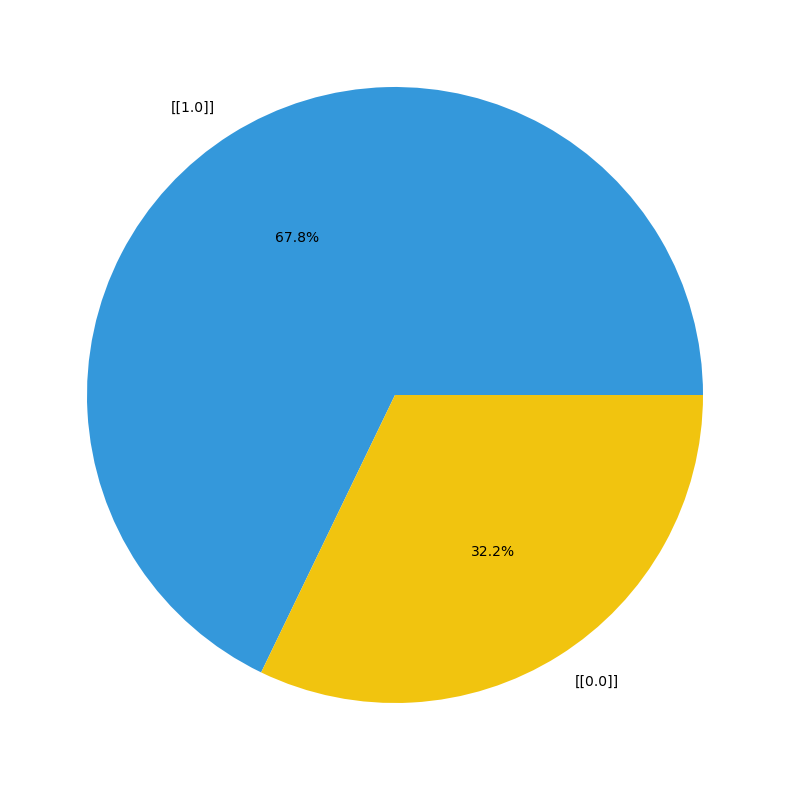

In [226]:
#creates a pie chart to visualize the distribution of the "Exited" column in the DataFrame 'df'
custom_colors = ['#3498DB', '#F1C40F']  # Replace these colors
prediction["Predicted"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=custom_colors)
plt.ylabel("")
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___